# Проект: Анализ оттока клиентов банка

[Описание проекта](#0)  
1. [Подготовка данных](#1) <br>
   [Вывод](#1_0)<br>
2. [Предобработка данных](#2) <br>
2.1. [Обработка пропусков](#2_1)<br>
2.2. [Изменение типов данных](#2_2)<br>
2.3. [Обработка дубликатов](#2_3)<br>
2.4. [Обработка аномальных значений](#2_4)<br>
     [Вывод](#2_0)
3. [Исследовательский анализ данных](#3)<br>
3.1 [Распределения параметров](#3_1)<br>
3.2 [Портреты клиентов](#3_2)<br>
3.3 [Корреляционный анализ](#3_3)<br>
4. [Статистический анализ данных](#4)<br>
4.1 [Гипотеза: различия дохода между теми клиентами, которые ушли и теми, которые остались](#4_1)<br>
4.2 [Гипотеза: различия уровня оттока клиентов в разных городах](#4_2)<br>
5. [Сегментация](#5)<br> 
   [Вывод](#5_0)
6. [Заключение](#6)<br>

## Описание проекта
<a id="0"></a>

**Цели и контекст**<br>
Заказчик - отдел маркетинга «Метанпромбанка». В банке повысился отток клиентов, что вызывает проблемы. Менеджеру, который занимается маркетинговыми кампаниями и работает с менеджерами продуктов, нужна информация по сегментам клиентов, которые склонны уходить из банка. <br>
**Цель:** максимально эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокооточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое действие на эти сегменты должно привести к уменьшению оттока.

**Задачи**<br>
- Провести исследовательский анализ, включающий исследование корреляций и портретов клиентов.
- Проверить статистические гипотезы.
- Сделать выводы о том, какие признаки стратегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком.
- Выделить не мелкие, но компактные высокоточные сегменты, приоритизировать их. Дать конкретные рекомендации по приоритетным сегментам.
- Подготовить презентацию со всеми ключевыми моментами.


**Входные данные**<br>
Данные находятся в файле bank_scrooge.csv. Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

**Колонки:**<br>
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента,
- `сhurn` — признак оттока.

**План выполнения проекта**<br>

1. Знакомство с данными:
    - Загрузить и исследовать датасет;
    - Исследовать общую информацию по датасету.
2. Предобработка данных:
    - Проверить корректность наименований колонок и переименовать при необходимости;
    - Исследовать и обработать пропущенные значения;
    - Исследовать соответствие типов и привести типы;
    - Исследовать и обработать дубликаты;
    - Исследовать и обработать аномалии.
3. Исследовательский анализ данных:
    - Построить распределения параметров, в том числе в разрезе оттока. Обработать выбросы там, где это необходимо.
    - Составить портреты клиентов, которые склонны и не склонны уходить из банка, и сравнить их.
    - Корреляционный анализ. Определить факторы, которые больше всего влияют на удержание и отток клиентов.
4. Статистический анализ данных:
    - Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
    - Проверить дополнительную гипотезу.
5. Оформление результатов:
    - Определить, какие показатели стратегически влияют на отток.
    - Объединить признаки отточности, сформировать сегменты.
    - Выделить не мелкие, но компактные высокоточные сегменты, приоритизировать их. Дать конкретные рекомендации по приоритетным сегментам.
6. Подготовка презентации:
    - Подготовить презентацию исследования для заказчика.

## 1. Подготовка данных
<a id="1"></a>

In [1]:
pip install -q missingno;

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импорт библиотек
import os
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import math
from itertools import combinations
# визуализация
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import missingno as msno
# предупреждения
import warnings
warnings.filterwarnings("ignore")

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
sns.set(style='whitegrid')

Загрузка и описание данных:

In [5]:
# Функция для загрузки датасета
def read_database(file_name):
    '''Function for uploading a dataset.
    
    :param file_name (str): file name.
    :return df (pd.DataFrame): dataset.
    '''
    path = os.path.join('https://code.s3.yandex.net/datasets/', file_name)
    try:
        df = pd.read_csv(path)
        return df
    except:
        raise ValueError('File is not found. Invalid file name.')

In [6]:
# Загрузка данных из csv-файла в датафрейм
df = read_database('bank_scrooge.csv')
# Выведем первые 5 строк датасета
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


**Выведем общую информацию:**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Пропущенные значения:**

In [8]:
# Выведем количество пропущенных значений и % для каждого столбца
df.isna().apply(['sum', 'mean']).T.style.format({'sum':'{:.0f}','mean':'{:.2%}'}).background_gradient(cmap='Blues', axis=0)

,sum,mean
USERID,0,0.00%
score,0,0.00%
city,0,0.00%
gender,0,0.00%
age,26,0.26%
equity,0,0.00%
balance,2295,22.95%
products,0,0.00%
credit_card,0,0.00%
last_activity,0,0.00%


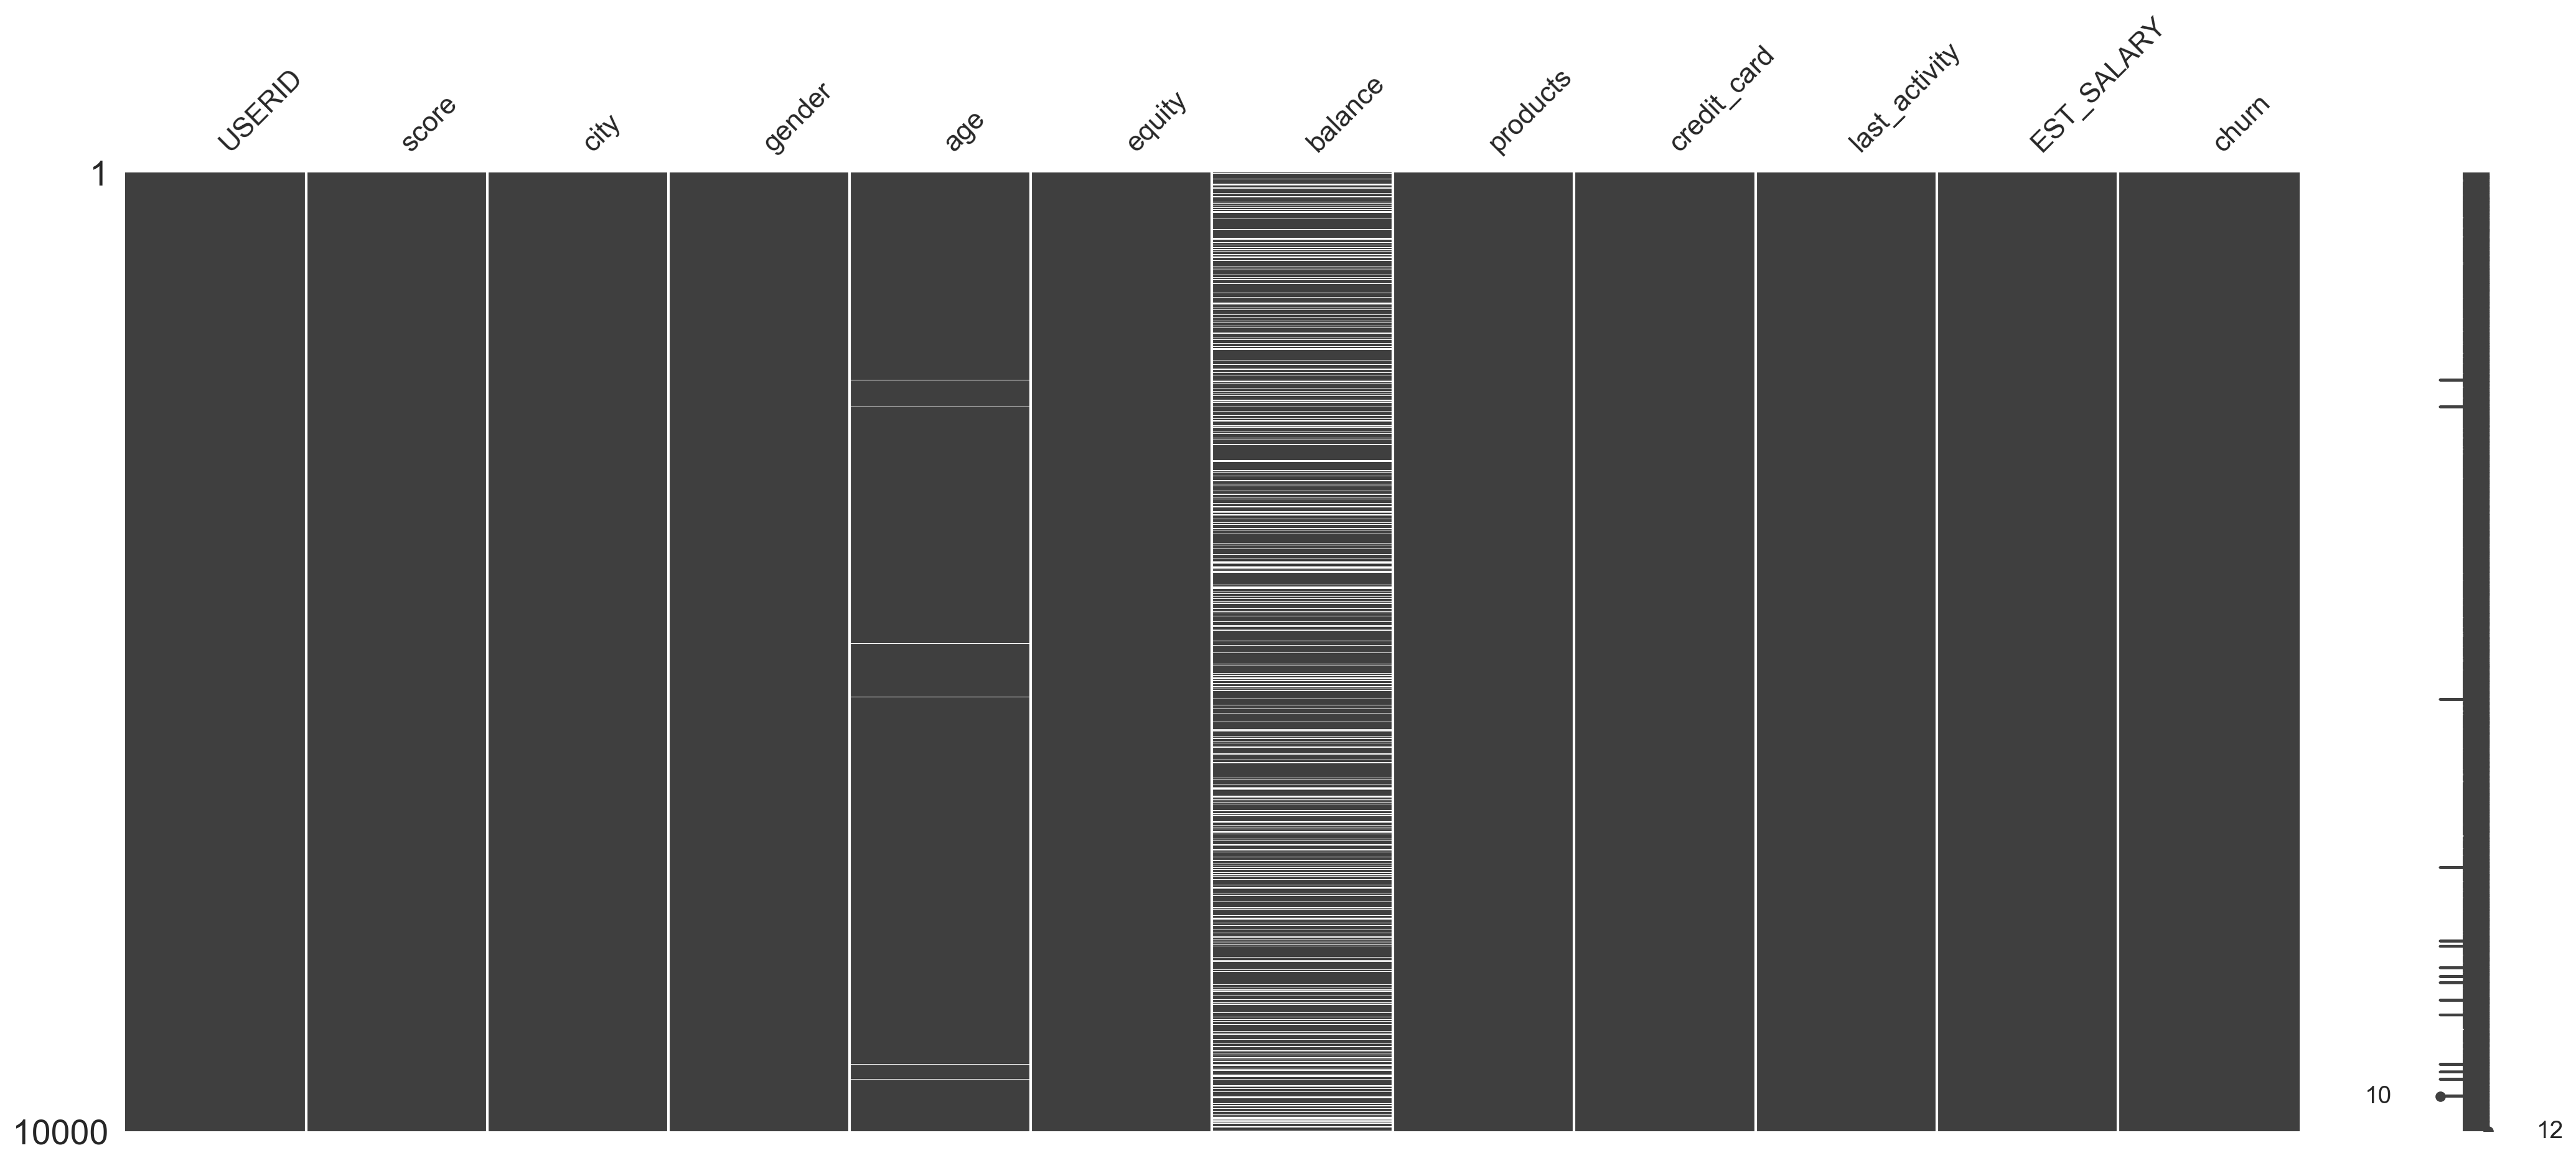

In [9]:
# Посмотрим где именно больше всего пропущенных значений и есть ли в пропусках какая-то закономерность или нет
msno.matrix(df);

В 2 столбцах есть пропущенные значения:
- **`balance`: 2295 пропусков (22.95%)** 
- **`age`: 26 пропусков (00.26%)** 

**Дубликаты:**

In [10]:
# Проверим датасет на явные дубликаты
df.duplicated().sum()

0

Явных дубликатов нет.

**Аномалии:**

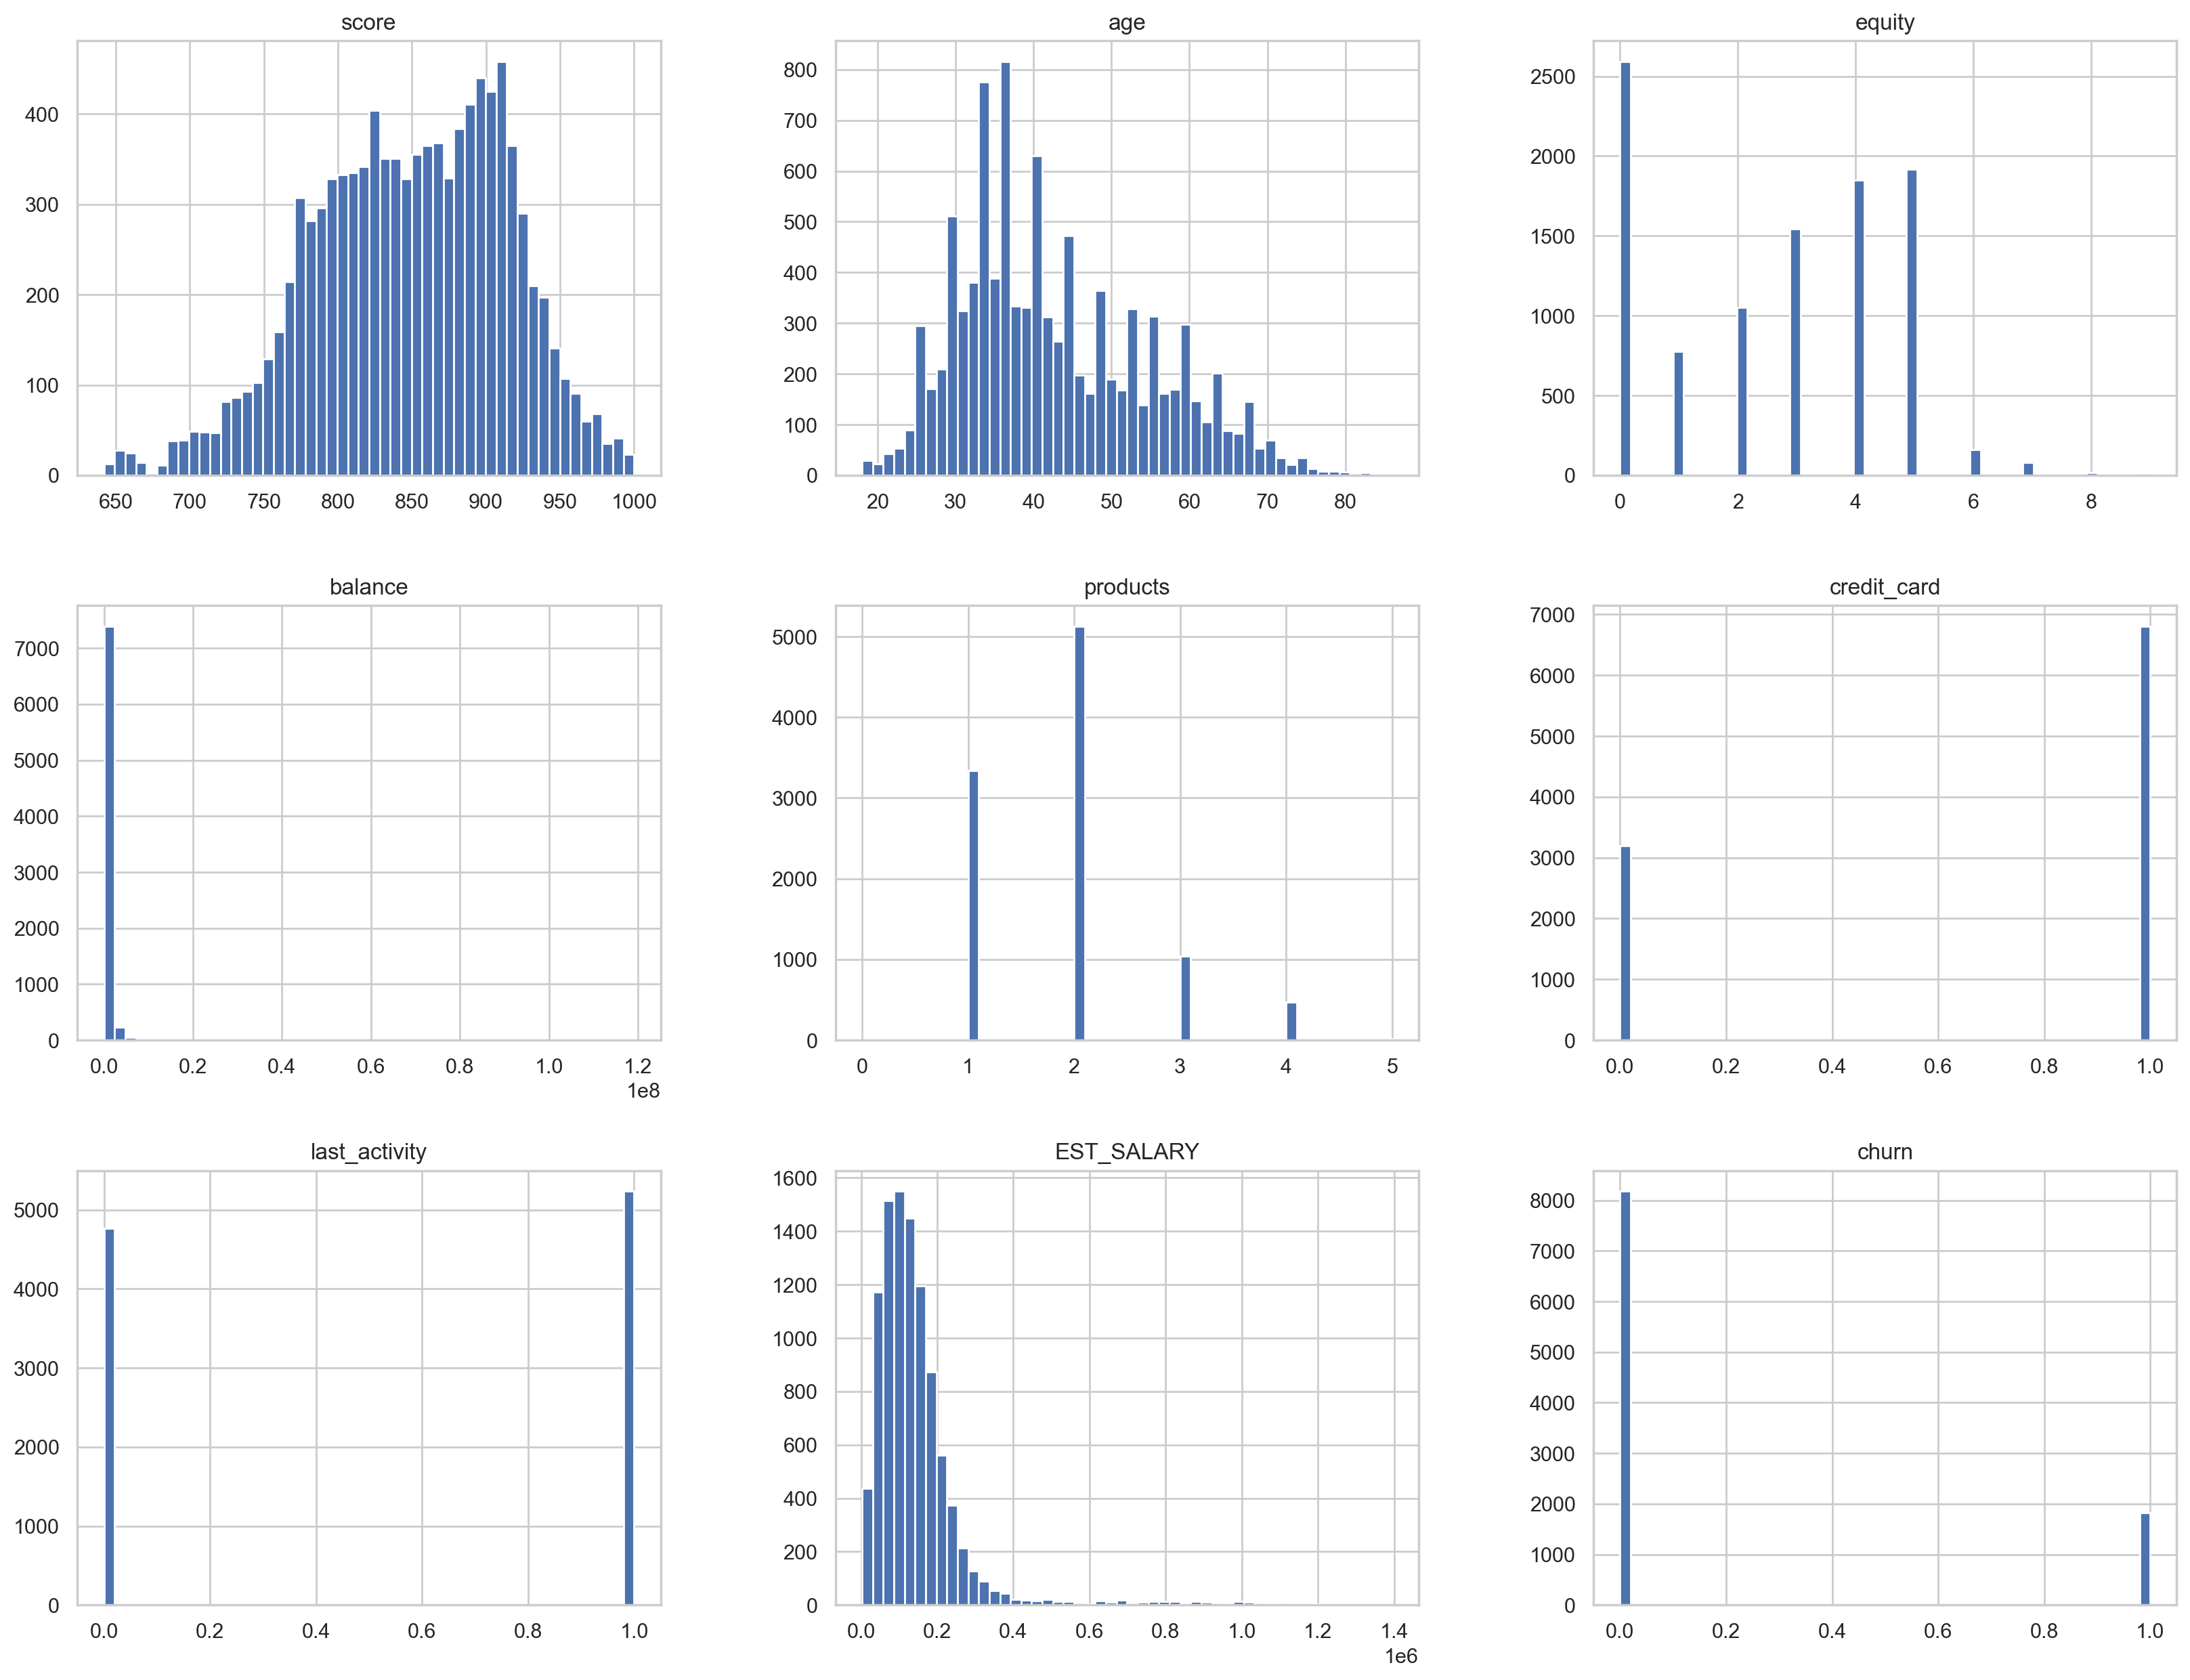

In [11]:
df.iloc[:, 1:].hist(bins = 50, figsize=(20, 15));

In [12]:
# Посмотрим описательные статистики
pd.options.display.float_format ='{:.2f}'.format
df.iloc[:, 1:].describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.00,848.70,65.45,642.00,802.00,853.00,900.00,1000.00
age,9974.00,42.73,12.18,18.00,33.00,40.00,51.00,86.00
equity,10000.00,2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,7705.00,827794.31,1980614.15,0.00,295554.16,524272.20,980705.85,119113552.01
products,10000.00,1.87,0.79,0.00,1.00,2.00,2.00,5.00
credit_card,10000.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EST_SALARY,10000.00,147866.89,139388.51,2546.30,75251.90,119658.10,174500.54,1395064.45
churn,10000.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00


In [13]:
# Посмотрим значения столбца city
df['city'].value_counts()

city
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: count, dtype: int64

In [14]:
# Посмотрим значения столбца gender
df['gender'].value_counts()

gender
М    5005
Ж    4995
Name: count, dtype: int64

Изучив данные пока можем сделать следующие выводы:
- кредитный рейтинг от 642 до 1000 - в пределах нормы; 
- города представлены также как в описании данных: Ярославль, Рыбинск, Ростов Великий;
- пол клиента мужской и женский - стандарт;
- возраст от 18 до 86 - в пределах нормы;
- количество баллов собственности от 0 до 9 - в пределах нормы;
- баланс на счету - в пределах нормы;
- количество продуктов банка от 0 до 5 - **у клиента не может не быть продуктов банка, необходимо исследовать**;
- есть ли кредитная карта значения 1 или 0 (да или нет);
- активный ли клиент значения 1 или 0 (да или нет);
- оценочный доход - в пределах нормы;
- признак оттока значения 1 или 0 (ушел или остался).

### Вывод
<a id="1_0"></a>
В датафрем `df` загружены данные из файла bank_scrooge.csv. С помощью метода `info()` получена общая информация по данным.<br>

Датасет содержит 10000 строк с данными о клиентах банка «Метанпром». 

В датасете 12 колонок:
- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — оценочный доход клиента (столбец заполнялся моделью),
- `сhurn` — признак оттока.

При первичном анализе данных выявлены следующие проблемы:
1. Неверные типы данных: 
    - столбец `age` должен иметь тип `int`.
2. Наличие пропусков в данных, в 2 столбцах есть пропущенные значения:
    - `balance` - 22.95%,
    - `age`	- 0.26%.
3. Явных дубликатов нет.
4. Аномальных значений нет, но есть интересные артефакты:
    - в данных клиент, которого значится 0 продуктов банка
5. Названия столбцов `USERID` и `EST_SALARY` не соответсвуют стилю snake_case.

## 2. Предобработка данных 
<a id="3"></a>

Переименуем столбцы в стиле *snake_case*.

In [15]:
df = df.rename(columns={'USERID':'user_id', 
                        'EST_SALARY': 'est_salary'})

### 2.1. Обработка пропусков.
<a id="2_1"></a>
В 2 столбцах есть пропущенные значения, проанализируем причины и методы обработки пропусков:

**`balance`: 2295 пропусков (22.95%)** Данные важны для исследования. Заполнить пропуски нечем, оставим.<br>
**`age`: 26 пропусков (00.26%)** Данные важны для исследования. Заполнить пропуски нечем, но так как доля пропусков небольшая, удалим пропущенные значения.<br>

Все пропуски скорее всего связаны с ошибкой при сборе или выгрузке данных. 

Возможно данные баланса некоторых клиентов являются конфиденциальной информацией. Данные клиентов незначительно отличаются в большинстве параметров, но оценка собственности в данных с пропусками значительно больше, это может говорить о состоятельности конфиденциальных клиентов. Четкой связи нет.

**Столбец `balance`** <br>
Четкой связи и закономерностей в пропусках нет. Заполнить нечем. Так как доля пропусков большая 22.95%, оставим пропуски.

In [16]:
# Выведем полностью строки с пропусками в столбце balance и посмосмотрим есть ли какие-либо закономерности
# pd.set_option('display.max_rows', None)
# df[df['balance'].isna()]

In [17]:
balance_na = df[df['balance'].isna()]
balance = df[~df['balance'].isna()]

In [18]:
# Посмотрим описательные статистики для данных с пропусками
pd.options.display.float_format ='{:.2f}'.format
balance_na.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2295.00,172069.45,33337.08,114182.00,143095.50,172659.00,201551.00,229145.00
score,2295.00,865.35,89.60,642.00,871.00,903.00,922.00,990.00
age,2279.00,42.09,11.94,18.00,33.00,40.00,49.00,86.00
equity,2295.00,0.05,0.23,0.00,0.00,0.00,0.00,3.00
balance,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
products,2295.00,1.16,0.40,0.00,1.00,1.00,1.00,3.00
credit_card,2295.00,0.82,0.39,0.00,1.00,1.00,1.00,1.00
last_activity,2295.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,2295.00,226310.21,199771.79,20274.03,120347.70,174160.68,240014.99,1333687.36
churn,2295.00,0.01,0.08,0.00,0.00,0.00,0.00,1.00


In [19]:
# Посмотрим описательные статистики для данных без пропусков
pd.options.display.float_format ='{:.2f}'.format
balance.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,7705.00,171738.84,33819.78,94561.00,142639.00,172740.00,201168.00,229136.00
score,7705.00,843.74,55.33,689.00,801.00,840.00,882.00,1000.00
age,7695.00,42.92,12.24,18.00,33.00,40.00,52.00,86.00
equity,7705.00,3.40,1.58,0.00,2.00,4.00,5.00,9.00
balance,7705.00,827794.31,1980614.15,0.00,295554.16,524272.20,980705.85,119113552.01
products,7705.00,2.08,0.76,1.00,2.00,2.00,2.00,5.00
credit_card,7705.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
last_activity,7705.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,7705.00,124501.87,104663.54,2546.30,67551.81,106222.20,155045.67,1395064.45
churn,7705.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00


Данные клиентов незначительно отличаются в большинстве параметров, но оценка собственности в данных с пропусками значительно больше, это может говорить о состоятельности конфиденциальных клиентов.

**Столбец `age`** <br>
Связи и закономерностей в пропусках нет. Заполнить нечем. Так как доля пропусков всего 0.26% от датасета, удалим пропуски. 

In [20]:
# Выведем полностью строки с пропусками в столбце age и посмосмотрим есть ли какие-либо закономерности
# pd.set_option('display.max_rows', None)
# df[df['age'].isna()]

In [21]:
df = df.dropna(subset=['age'])

### 2.2. Изменение типов данных.
<a id="2_2"></a>

Изменим тип данных в столбце возраст на целочисленный.

In [22]:
df['age'] = df['age'].astype('int32')

Применим one-hot кодирование, чтобы применять среднее и смотреть корреляции какого-то числового показателя с категориальным неупорядоченным.

In [23]:
# Cоздадим копии столбцов city и gender
df['city_dummy'] = df['city'].copy() 
df['gender_dummy'] = df['gender'].copy()
# Закодируем значения этих столбцов
df = pd.get_dummies(df, columns = ['city_dummy', 'gender_dummy'], dtype=int)
# Переименуем новые столбцы
df = df.rename(columns={'city_dummy_Ростов': 'city_Rostov', 
                       'city_dummy_Рыбинск': 'city_Rybinsk',
                       'city_dummy_Ярославль': 'city_Yaroslavl',
                       'gender_dummy_Ж': 'gender_female',
                       'gender_dummy_М': 'gender_male'})
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_female,gender_male
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


### 2.3. Обработка дубликатов.
<a id="2_3"></a>
Явных дубликатов в датасете нет. Исследуем на неявные дубликаты.

In [24]:
# Посмотрим на дубликаты в столбце user_id
df['user_id'].duplicated().sum()

50

In [25]:
# Выведем полностью дубликаты по столбцу user_id и посмосмотрим есть ли какие-либо закономерности
# pd.set_option('display.max_rows', None)
# df[df['user_id'].duplicated(False)].sort_values('user_id')

Так же проверим:

In [26]:
df[['user_id', 'gender', 'age', 'city']].duplicated().sum()

0

In [27]:
df[['user_id', 'gender', 'age']].duplicated().sum()

2

In [28]:
df[['user_id', 'city']].duplicated().sum()

0

Имеем 50 дубликатов индентификаторов пользователей, если попарно рассматривать дубликаты, то связи между ними нет. Под одним индентификатором скорее всего зашифрованы разные пользователи, что является ошибкой. Так как доля таких пользователей мала, удалим эти дубликаты.

In [29]:
'{:.2%}'.format(df['user_id'].duplicated().sum() / len(df))

'0.50%'

In [30]:
df = df[~df['user_id'].duplicated()]

### 2.4. Обработка аномалий.
<a id="2_4"></a> 
Обработаем аномалии в столбце `products`, так как если человек не пользуемся продуктами банка, он не может быть его клиентом.

In [31]:
df[df['products'] == 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_female,gender_male
8957,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,0,1,0,1,0


Всего один такой клиент, похоже на ошибку, изменим значение на 1.

In [32]:
df.loc[df['products'] == 0, 'products'] = 1

### Вывод
<a id="2_0"></a>
При предобработке данных выполнены следующие действия:
1. Переименованы столбцы `USERID` и `EST_SALARY` на `user_id` и `est_salary`.
2. Пропуски в датасете проанализированы и обработаны:
    - для столбца `balance` пропуски оставили,
    - для столбца `age` пропуски удалены.
3. В столбце `age` изменен тип данных на int. 
4. Явных дубликатов нет. Обнаружены и обработаны дубликаты в столбце `user_id`, так как их доля мала, пропуски удалили из датасета.
5. В столбце `products` обработана строка, где количество продуктов банка, которыми пользуется клиент, равно 0. Значение заменено на 1.
6. В датасет добавлены новые столбцы `city_Rostov`, `city_Rybinsk`, `city_Yaroslavl` и `gender_female`, `gender_male`, которые являются закодированными значениями категориальных переменных `city` и `gender`.

После предобратки данных датасет содержит 9924 строк (99.24% от исходного).

## 3. Исследовательский анализ данных
<a id="3"></a>

**Средний уровень оттока**

In [33]:
churn_level = df['churn'].mean()
churn_level

0.18329302700523983

### 3.1. Распределение параметров
<a id="3_1"></a>
Построим распределения параметров, в том числе в разрезе оттока. Обработаем выбросы перед построением графиков.

In [34]:
def IQR_limits(column):
    ''' Определяет нижнюю и верхнюю границу значений параметра, используя интерквартильный размах'''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return max(df[column].min(), lower), min(upper, df[column].max())

In [35]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'city_Rostov', 'city_Rybinsk', 'city_Yaroslavl', 'gender_female',
       'gender_male'],
      dtype='object')

In [36]:
# для русских подписей на графиках
titles = {'score': 'кредитный скоринг', 'city': 'город', 'gender': 'пол', 'age': 'возраст', 'equity': 'баллы собственности', 
          'balance': 'средства на счете','products': 'продукты банка', 'credit_card': 'есть ли кредитная карта', 
          'last_activity': 'активный ли клиент', 'est_salary': 'оценочный доход', 'age_cat': 'возраст'}

In [37]:
def category_param_plot(column):
    '''Функция отрисовывает распределение параметра c категориями'''   
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column])
    ax = sns.countplot(data=df, x=column, color='blue', alpha=.3)
    plt.ylabel('')
    plt.xlabel(titles[column])
    # нужна версия mathplotlib 3.4.0 и выше
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()
    
def category_param_plot_churn(column):
    '''Функция отрисовывает распределение параметра c категориями в разрезе оттока'''   
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column] + ' в разрезе оттока')
    ax = sns.countplot(data=df, x=column, hue='churn', hue_order=[0, 1],  palette=['#00C957',"red"], alpha=.5)
    plt.legend(['Не отточные  клиенты', 'Отточные клиенты'])
    plt.ylabel('')
    plt.xlabel(titles[column])
    # нужна версия mathplotlib 3.4.0 и выше
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

def levels_plot(column):
    '''Функция отрисовывает уровни оттока по категориям''' 
    plt.figure(figsize=(15,5))
    plt.title('Уровни оттока по параметру ' + titles[column])
    levels = df.groupby(column).agg({'churn': 'mean'}).reset_index()
    ax = sns.barplot(data=levels, x=column, y='churn', color='blue', alpha=.3)
    plt.axhline(churn_level)
    plt.ylabel('уровень оттока')
    plt.xlabel(titles[column])
    # нужна версия mathplotlib 3.4.0 и выше
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

In [38]:
def continuous_param_plot(column): 
    '''Функция отрисовывает распределение непрерывного параметра'''
    lower, upper = IQR_limits(column)
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column])
    sns.kdeplot(df[column], clip=(lower, upper), color='blue', fill= True , alpha= .3)
    plt.ylabel('')
    plt.xlabel(titles[column])
    plt.show()
    
def discrete_param_plot(column):
    '''Функция отрисовывает распределение дискретного параметра'''
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column])
    sns.histplot(df[column], discrete=True, stat='density', color='blue', alpha= .3, linewidth=5.0)
    plt.ylabel('')
    plt.xlabel(titles[column])
    plt.show()

In [39]:
def continuous_param_plot_churn(column):
    '''Функция отрисовывает распределение непрерывного параметра в разрезе оттока'''
    lower, upper = IQR_limits(column)
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column] + ' в разрезе оттока')
    sns.kdeplot(df[df['churn'] == 0][column], clip=(lower, upper), common_norm=False, color='green', fill= True , alpha= .3)
    sns.kdeplot(df[df['churn'] == 1][column], clip=(lower, upper), common_norm=False, color='red', fill= True , alpha= .3)
    plt.legend(['Не отточные  клиенты', 'Отточные  клиенты'])
    plt.ylabel('')
    plt.xlabel(titles[column])
    
def discrete_param_plot_churn(column):
    '''Функция отрисовывает распределение дискретного параметра в разрезе оттока'''
    plt.figure(figsize=(15,5))
    plt.title('Распределение параметра ' + titles[column] + ' в разрезе оттока')
    sns.histplot(df[df['churn'] == 0][column], discrete=True, stat='density', common_norm=False, color='green', alpha= .3, linewidth=5.0)
    sns.histplot(df[df['churn'] == 1][column], discrete=True, stat='density', common_norm=False, color='red', alpha= .3, linewidth=5.0)
    plt.legend(['Не отточные  клиенты', 'Отточные клиенты'])
    plt.ylabel('')
    plt.xlabel(titles[column])

#### Распределение кредитного скоринга

In [40]:
df['score'].describe()

count   9924.00
mean     848.73
std       65.40
min      642.00
25%      802.00
50%      853.00
75%      900.00
max     1000.00
Name: score, dtype: float64

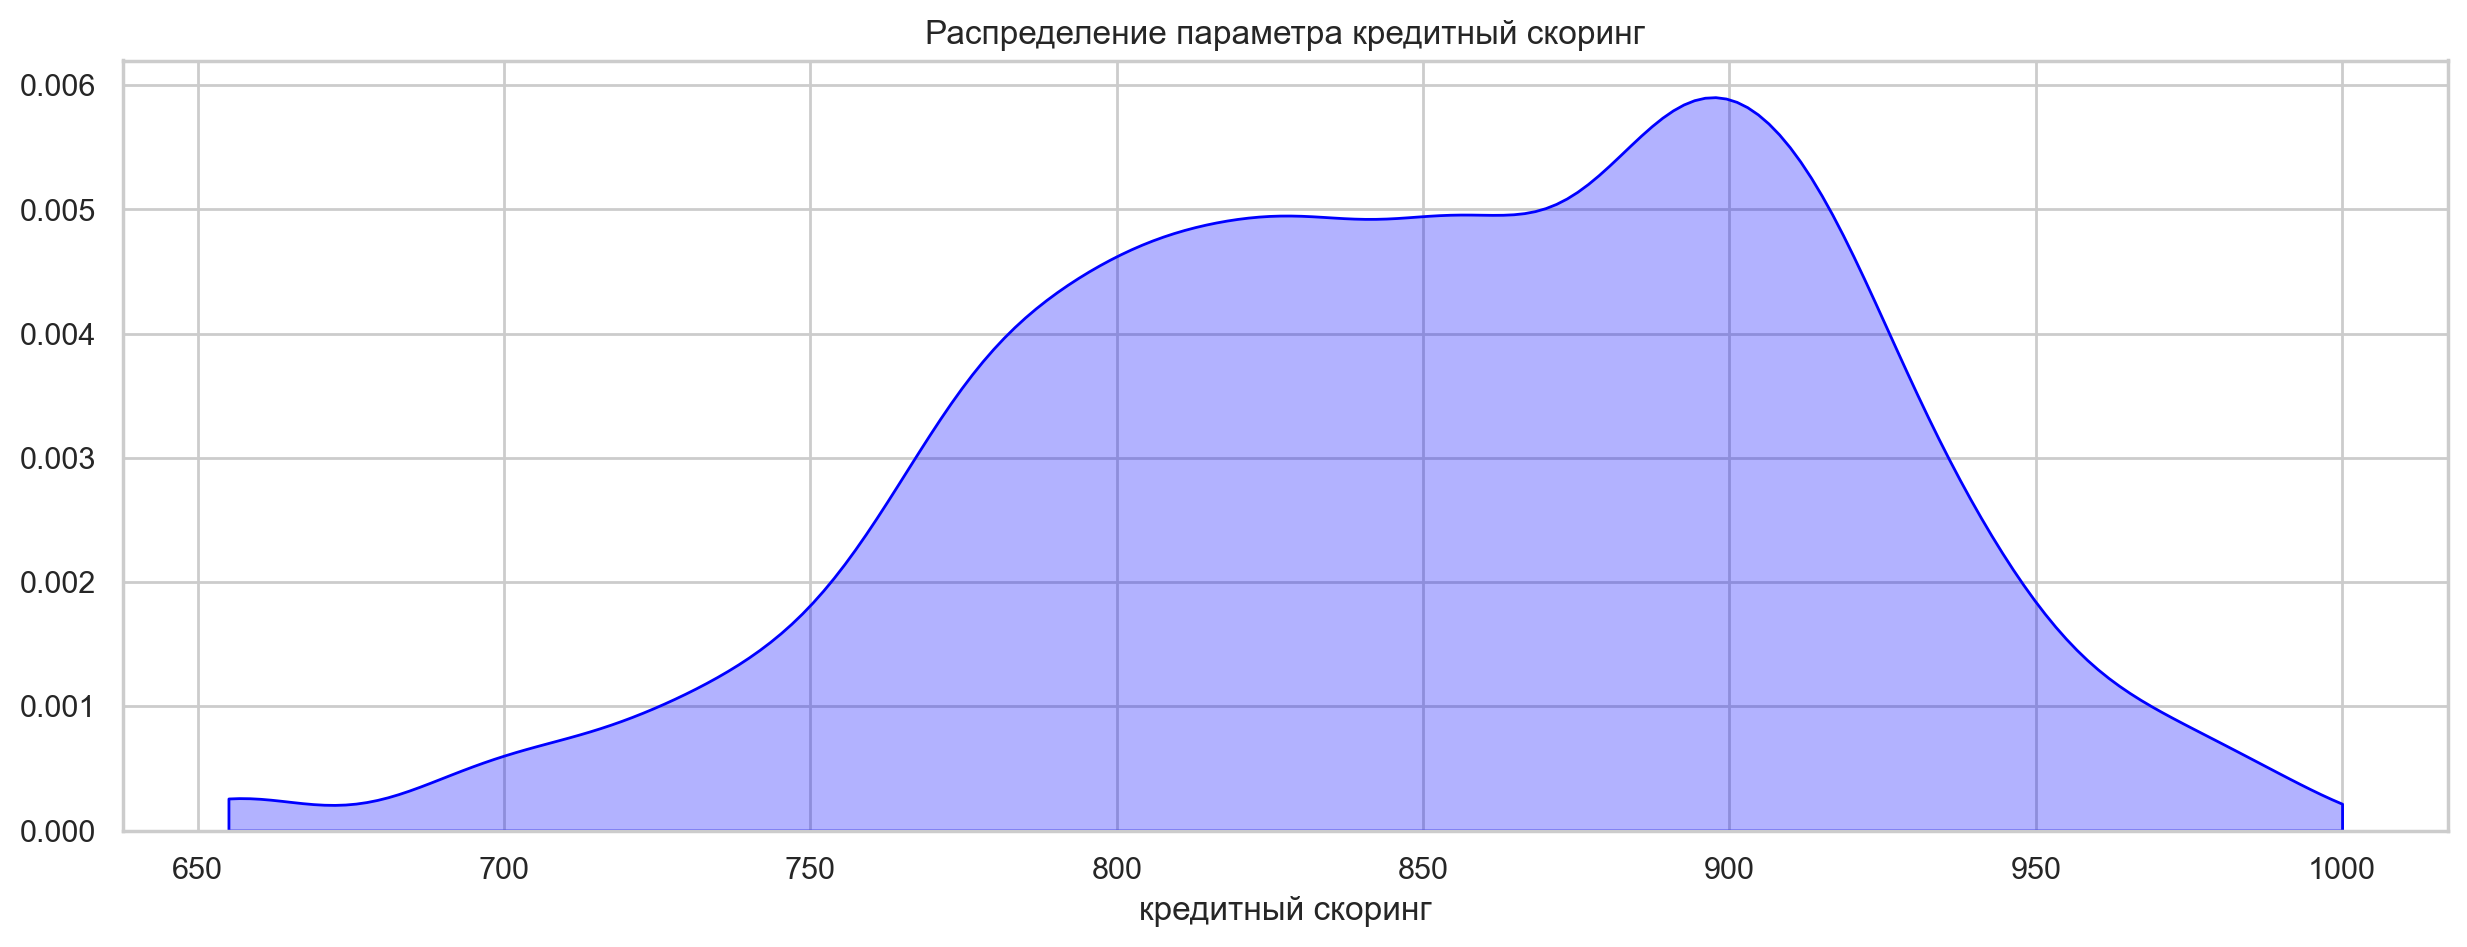

In [41]:
continuous_param_plot('score')

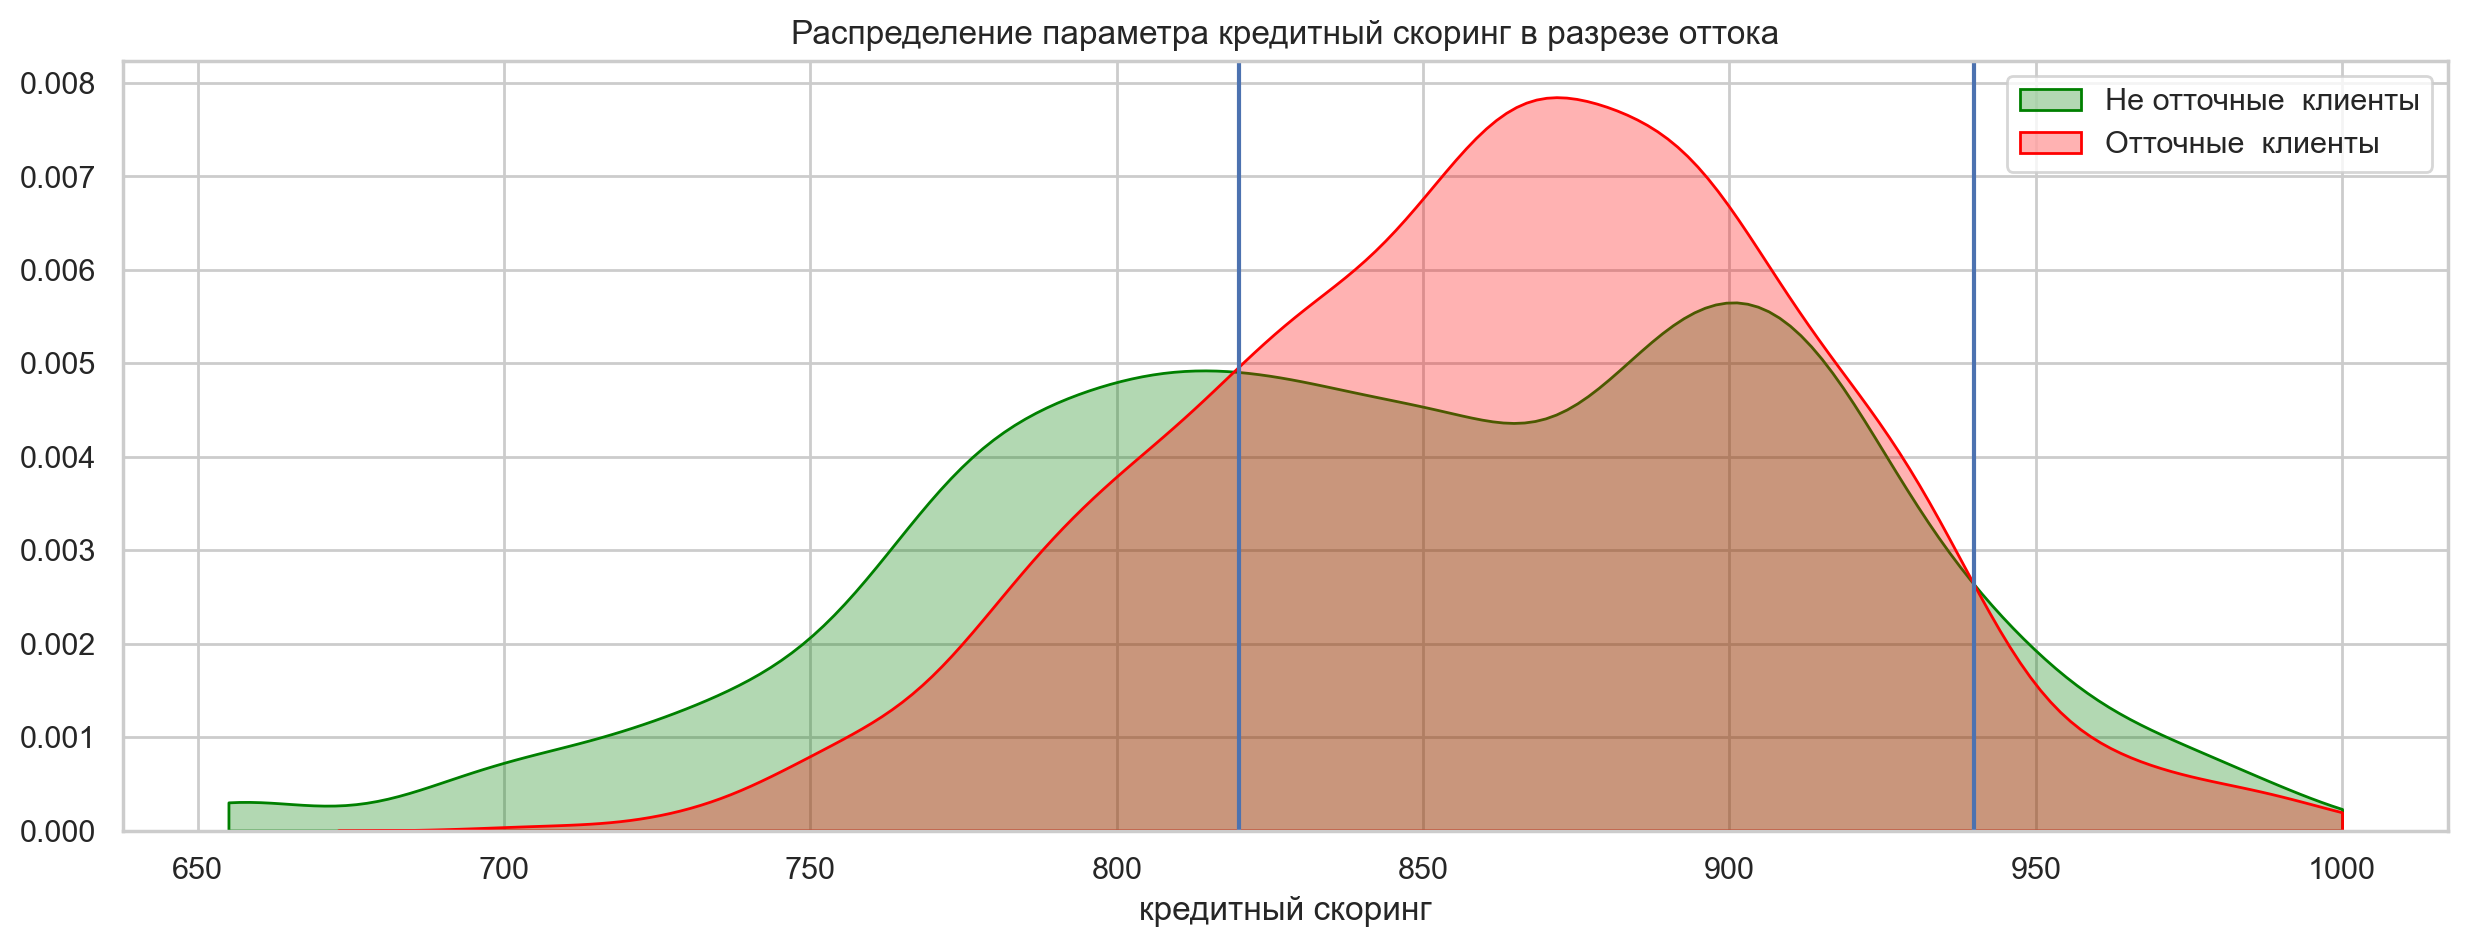

In [42]:
continuous_param_plot_churn('score')
plt.axvline(820)
plt.axvline(940);

В датасете баллы кредитного скоринга находятся от 642 до 1000. У большей части клиентов рейтинг находится от 750 до 950. Среднее значение сдвинуто в большую сторону и равно 850.

Если рассматривать клиентов в разрезе оттока, то у большинства отточных клиентов баллы кредитного скоринга находятся от 820 до 940.

#### Город

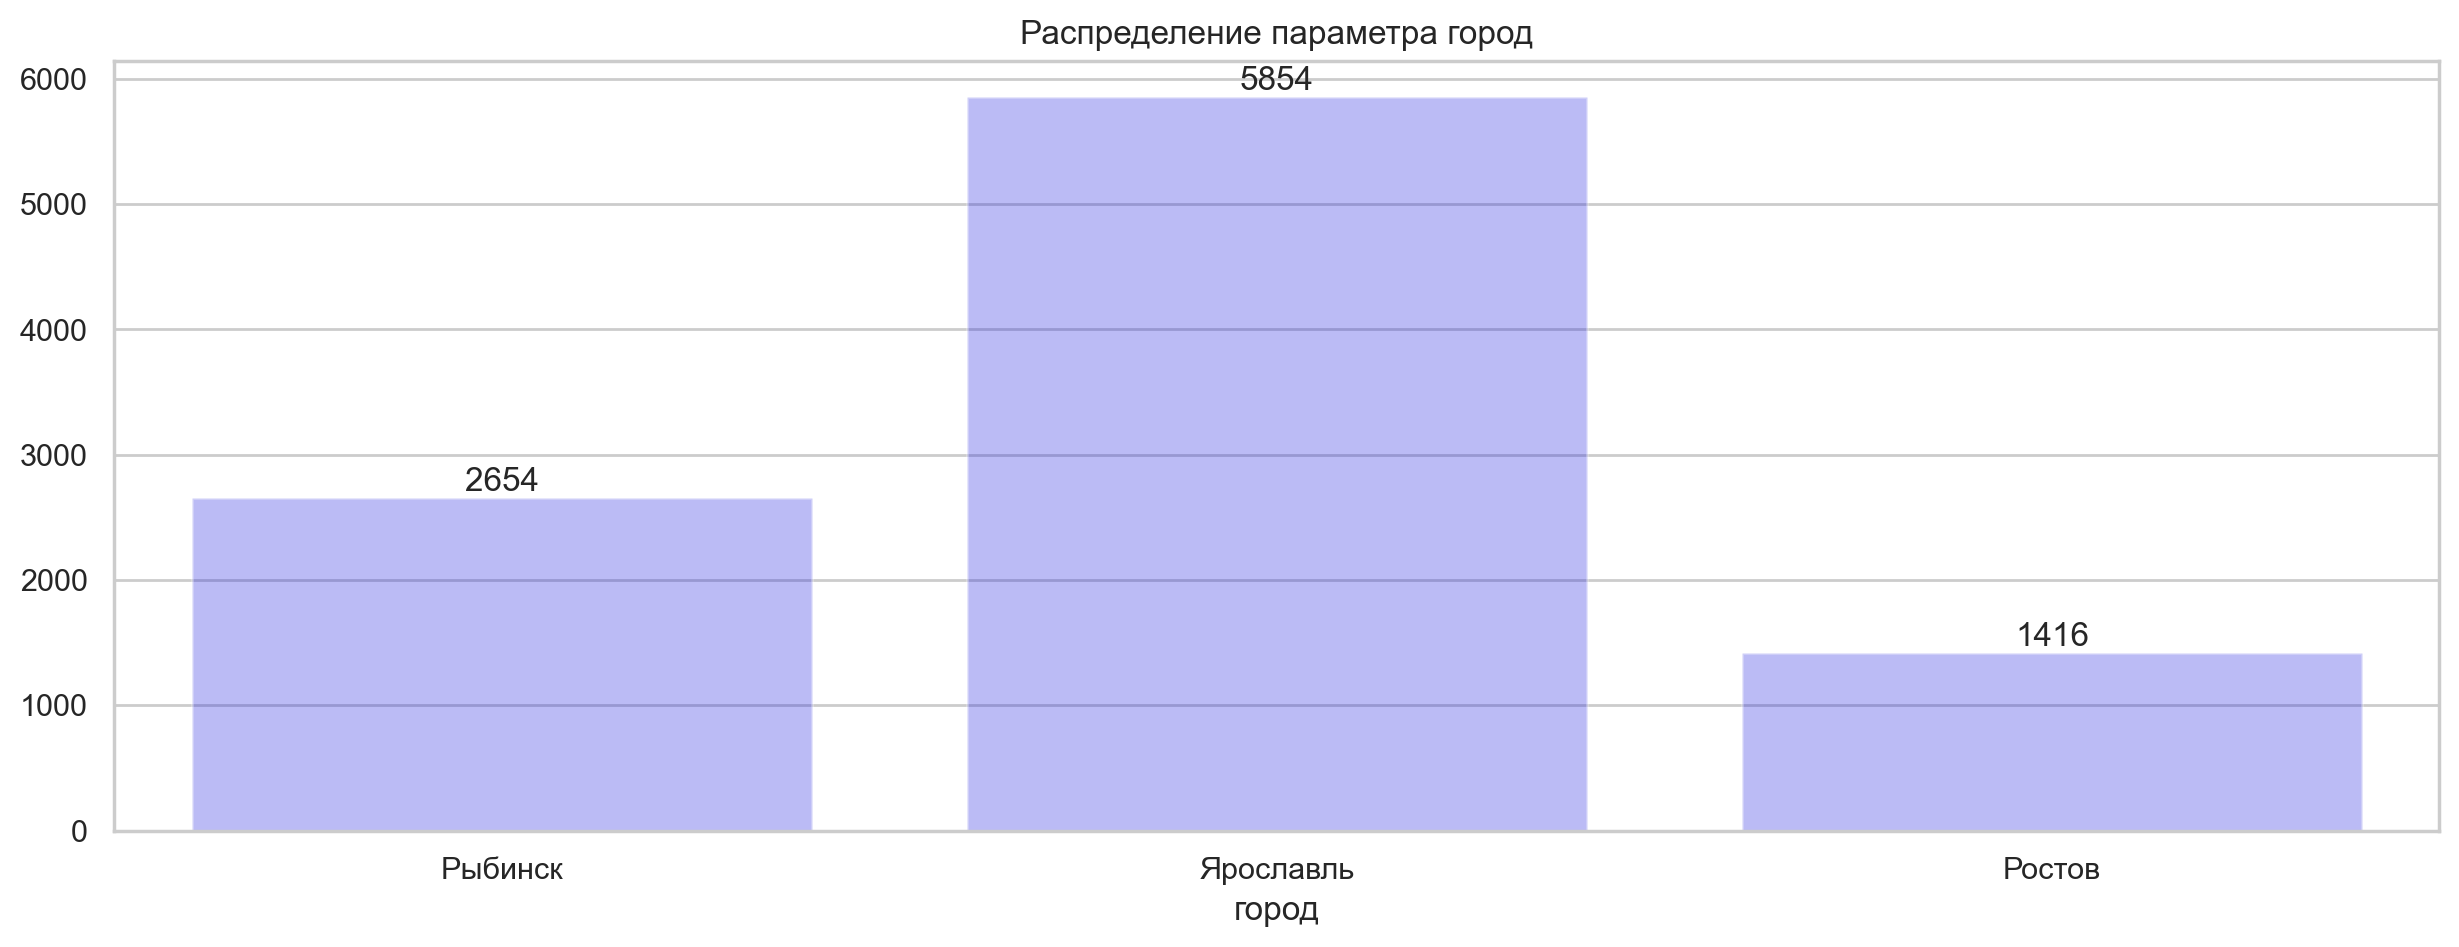

In [43]:
category_param_plot('city')

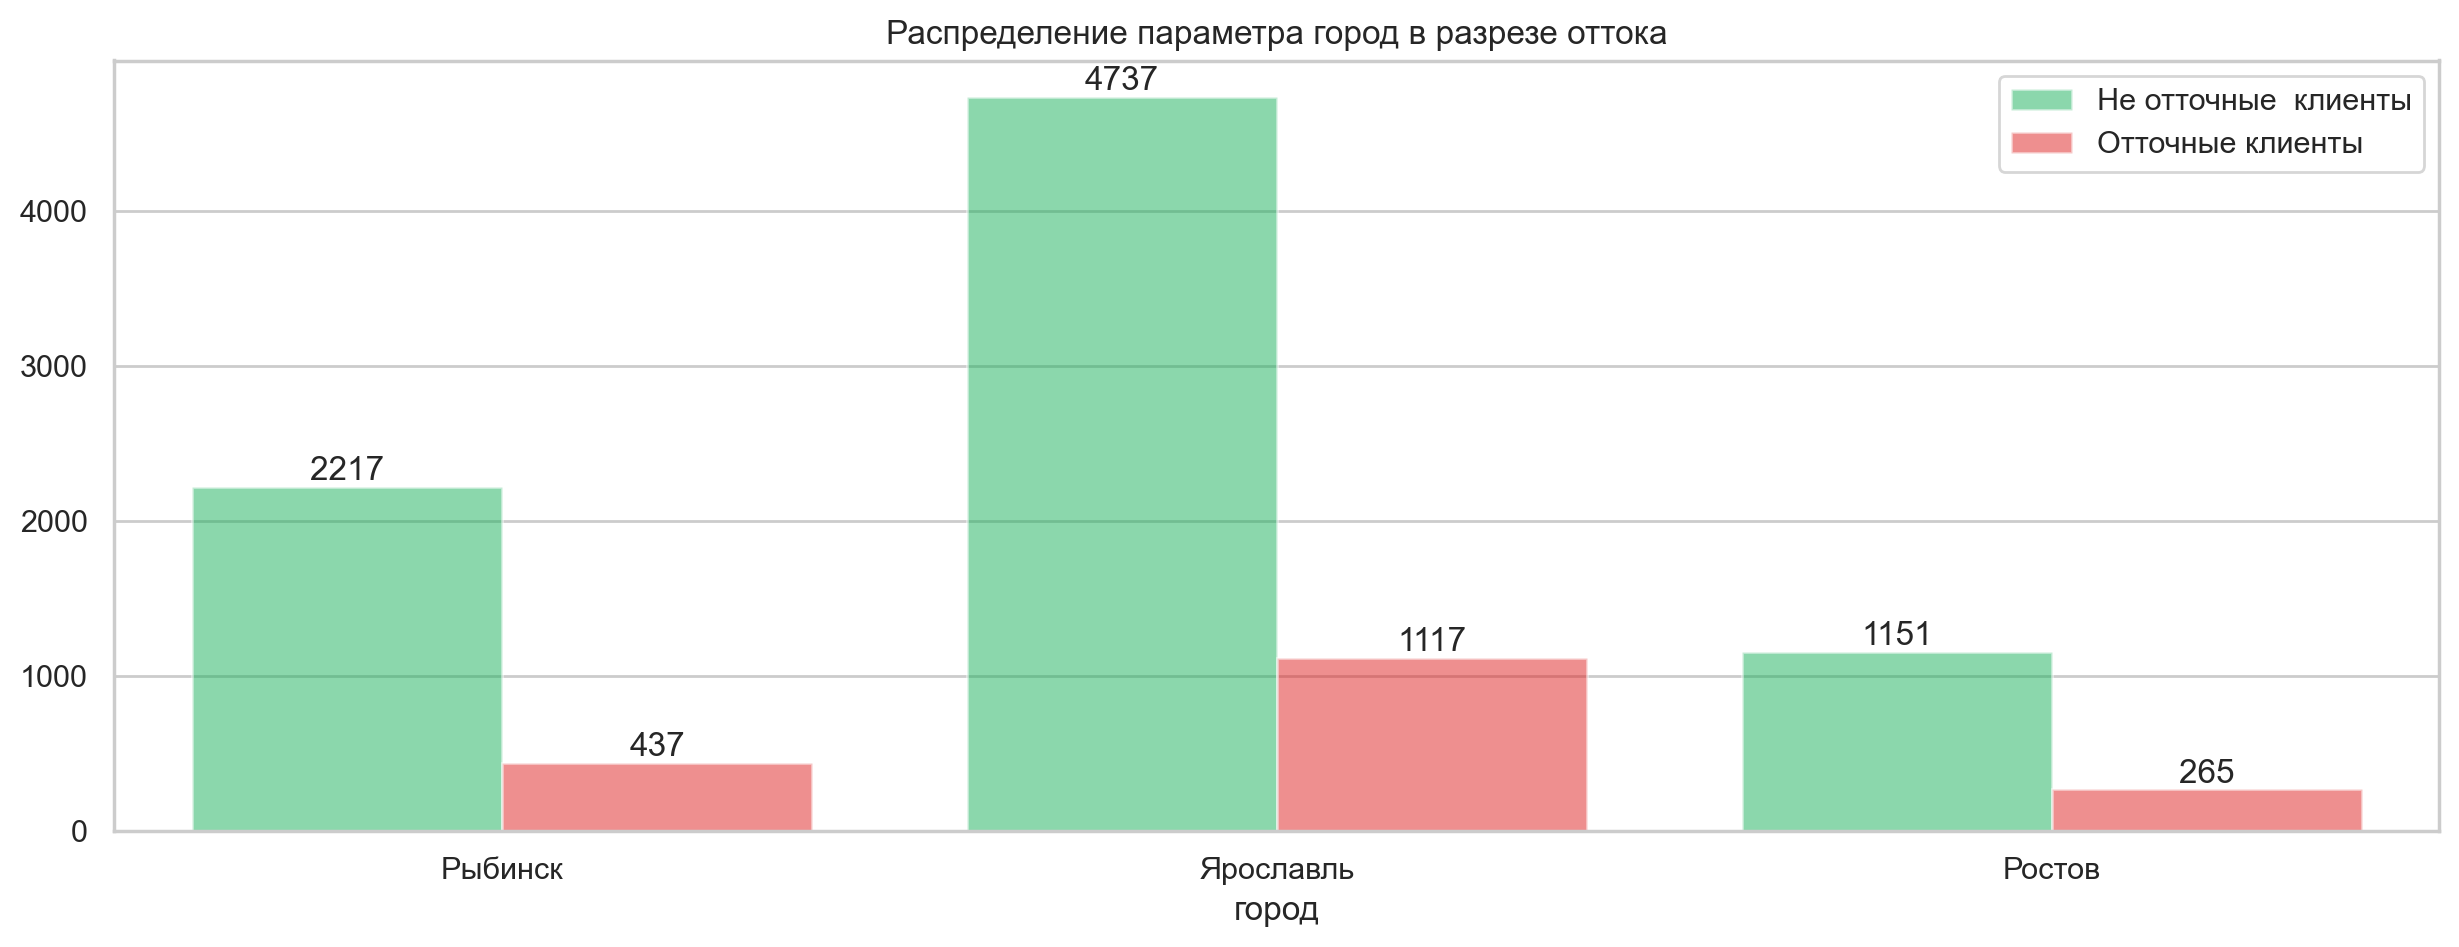

In [44]:
category_param_plot_churn('city')

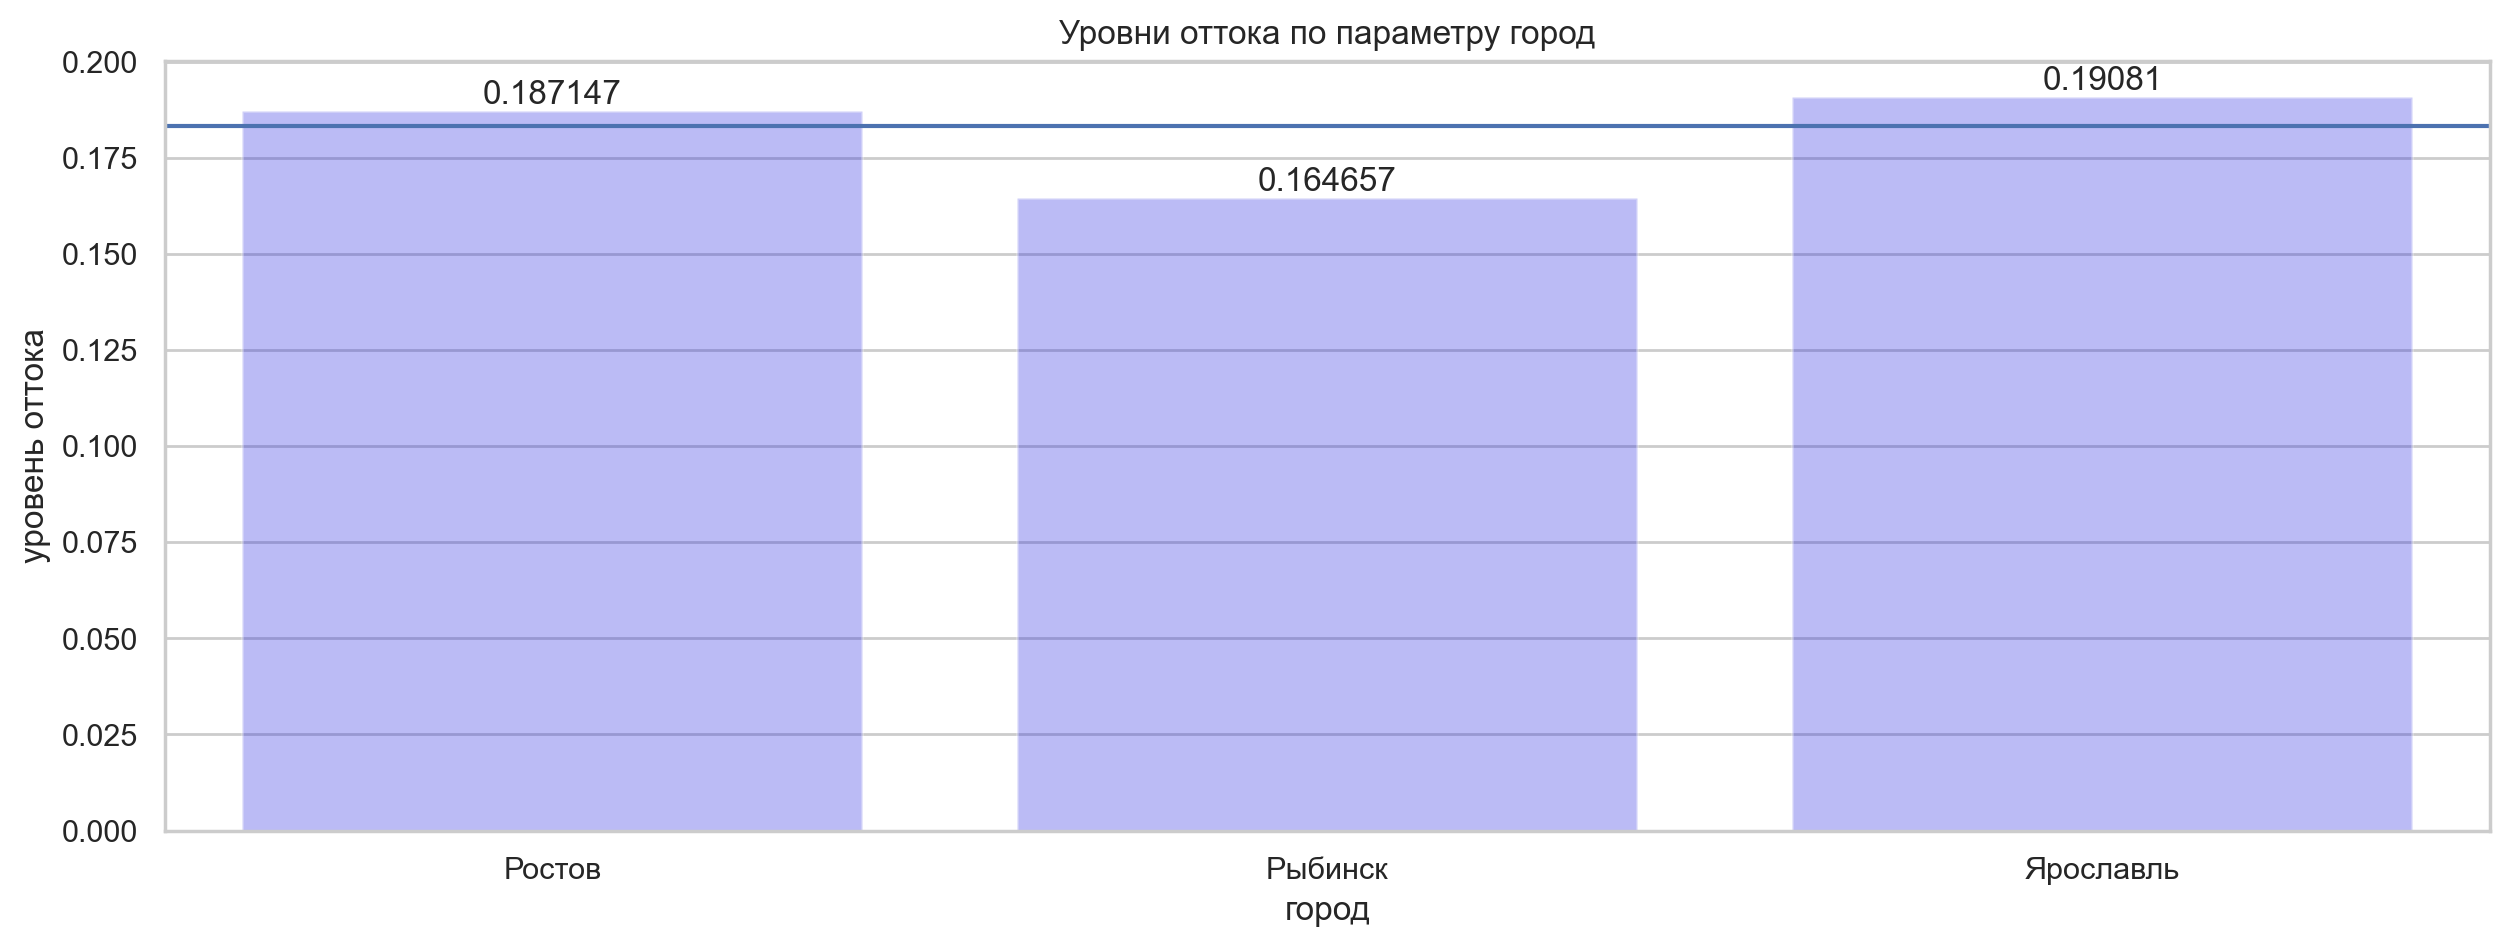

In [45]:
levels_plot('city')

Больше всего клиентов находится в Ярославле, что очевидно, так как этот город больше Рыбинска и Ростова Великого. 

В Ярославле и Ростове Великом уровень оттока превышает средний, большинство отточных клиентов из Ярославля, но превышение среднего уровня оттока выглядит незначительно.

Предлагается проверить гипотезу: змачимо ли отличается уровень оттока в разных городах от среднего оттока по банку.

#### Пол

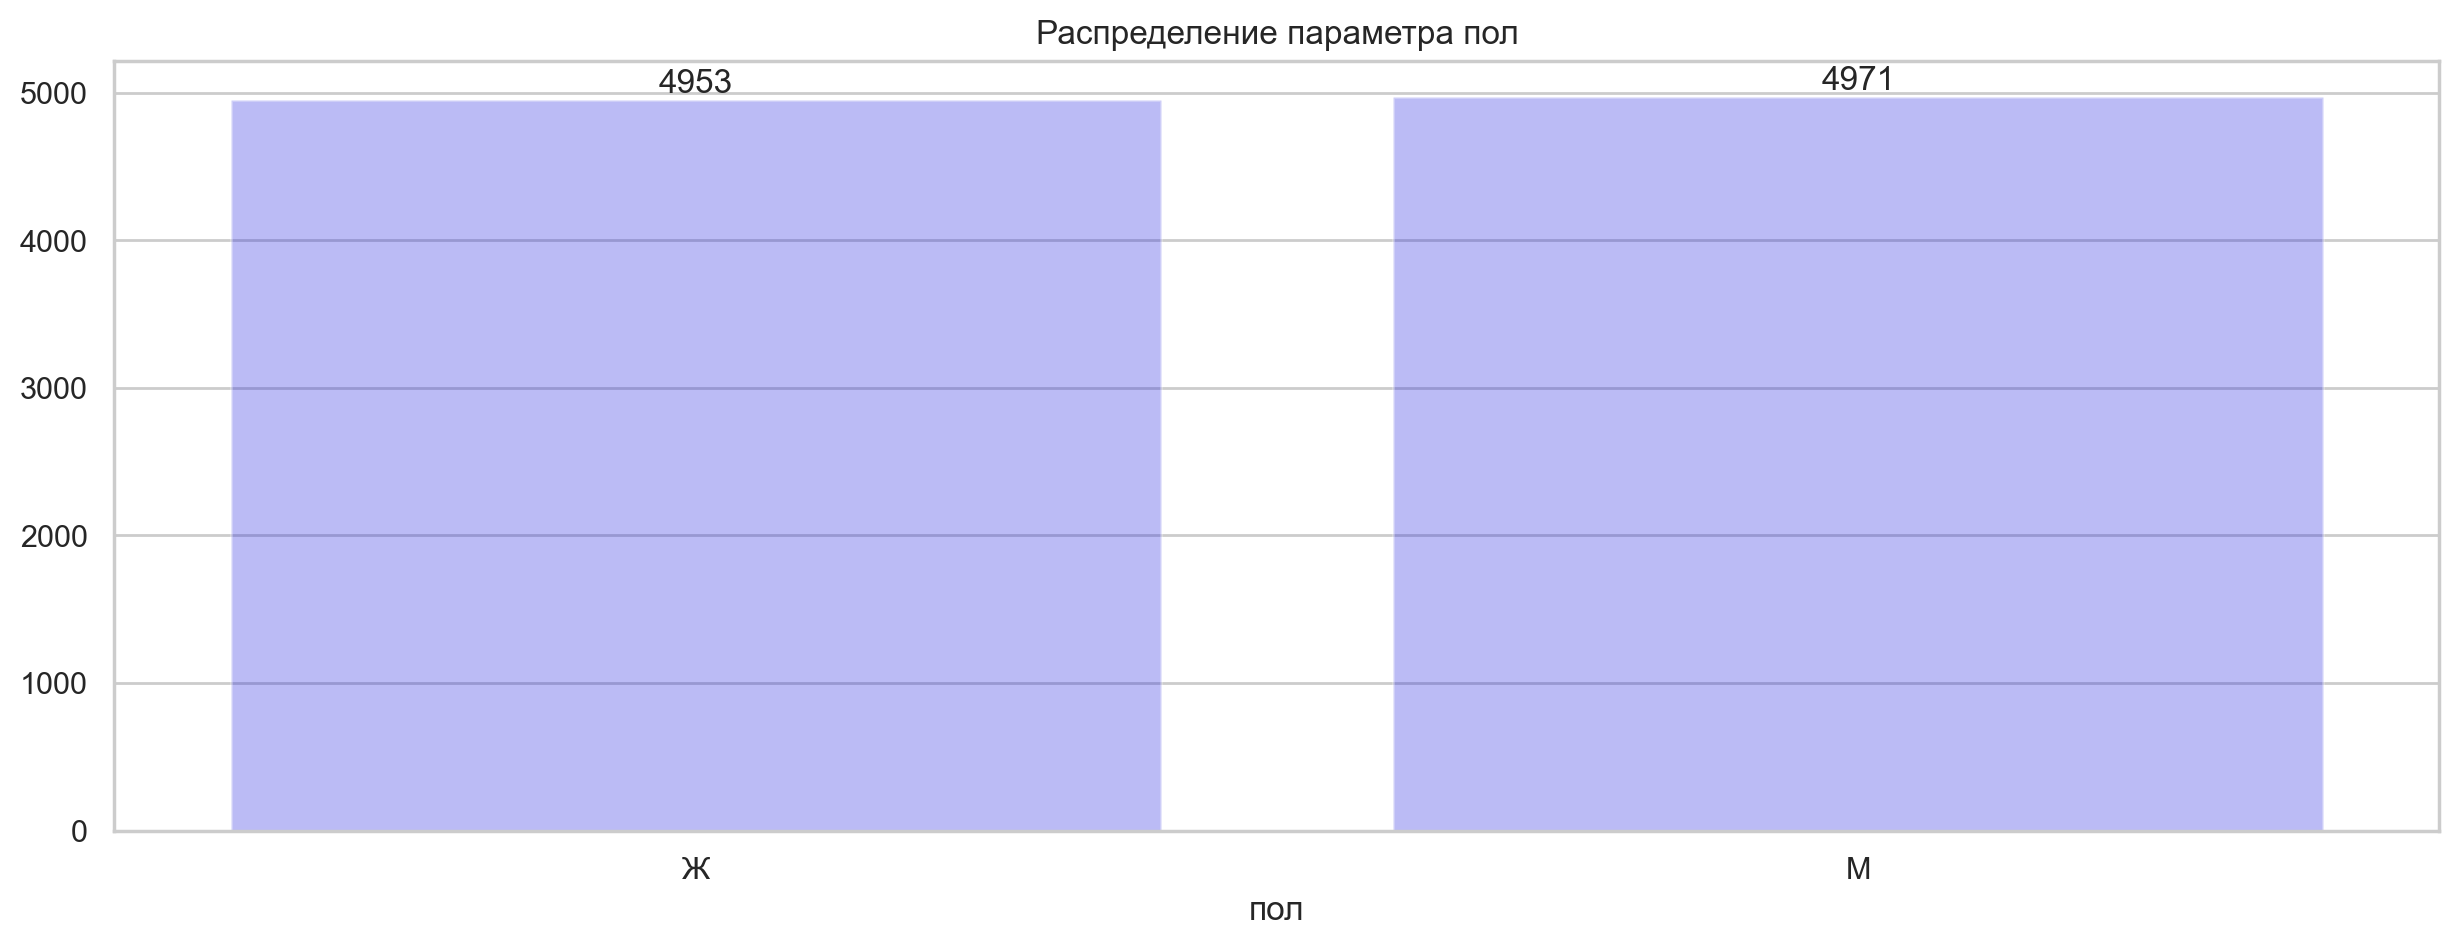

In [46]:
category_param_plot('gender')

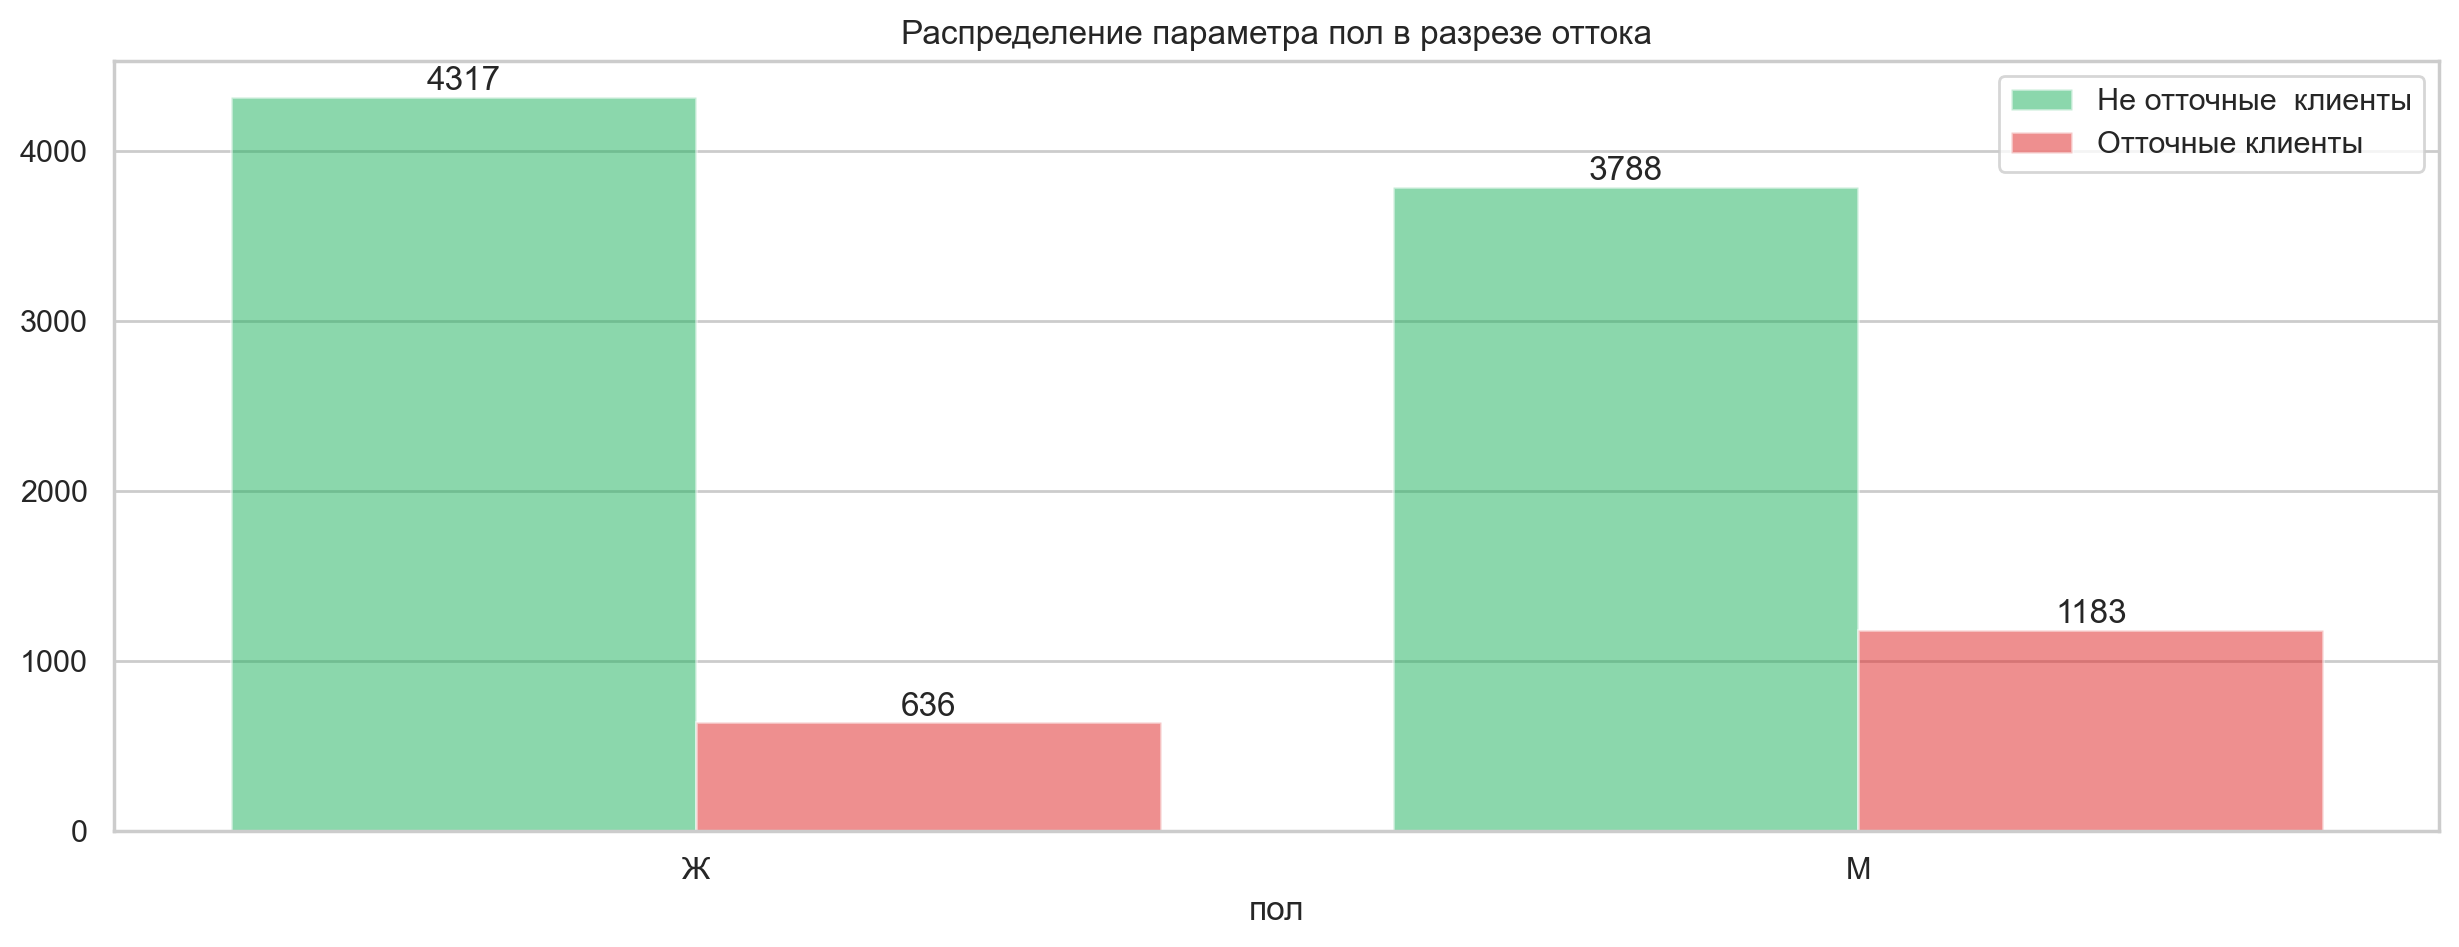

In [47]:
category_param_plot_churn('gender')

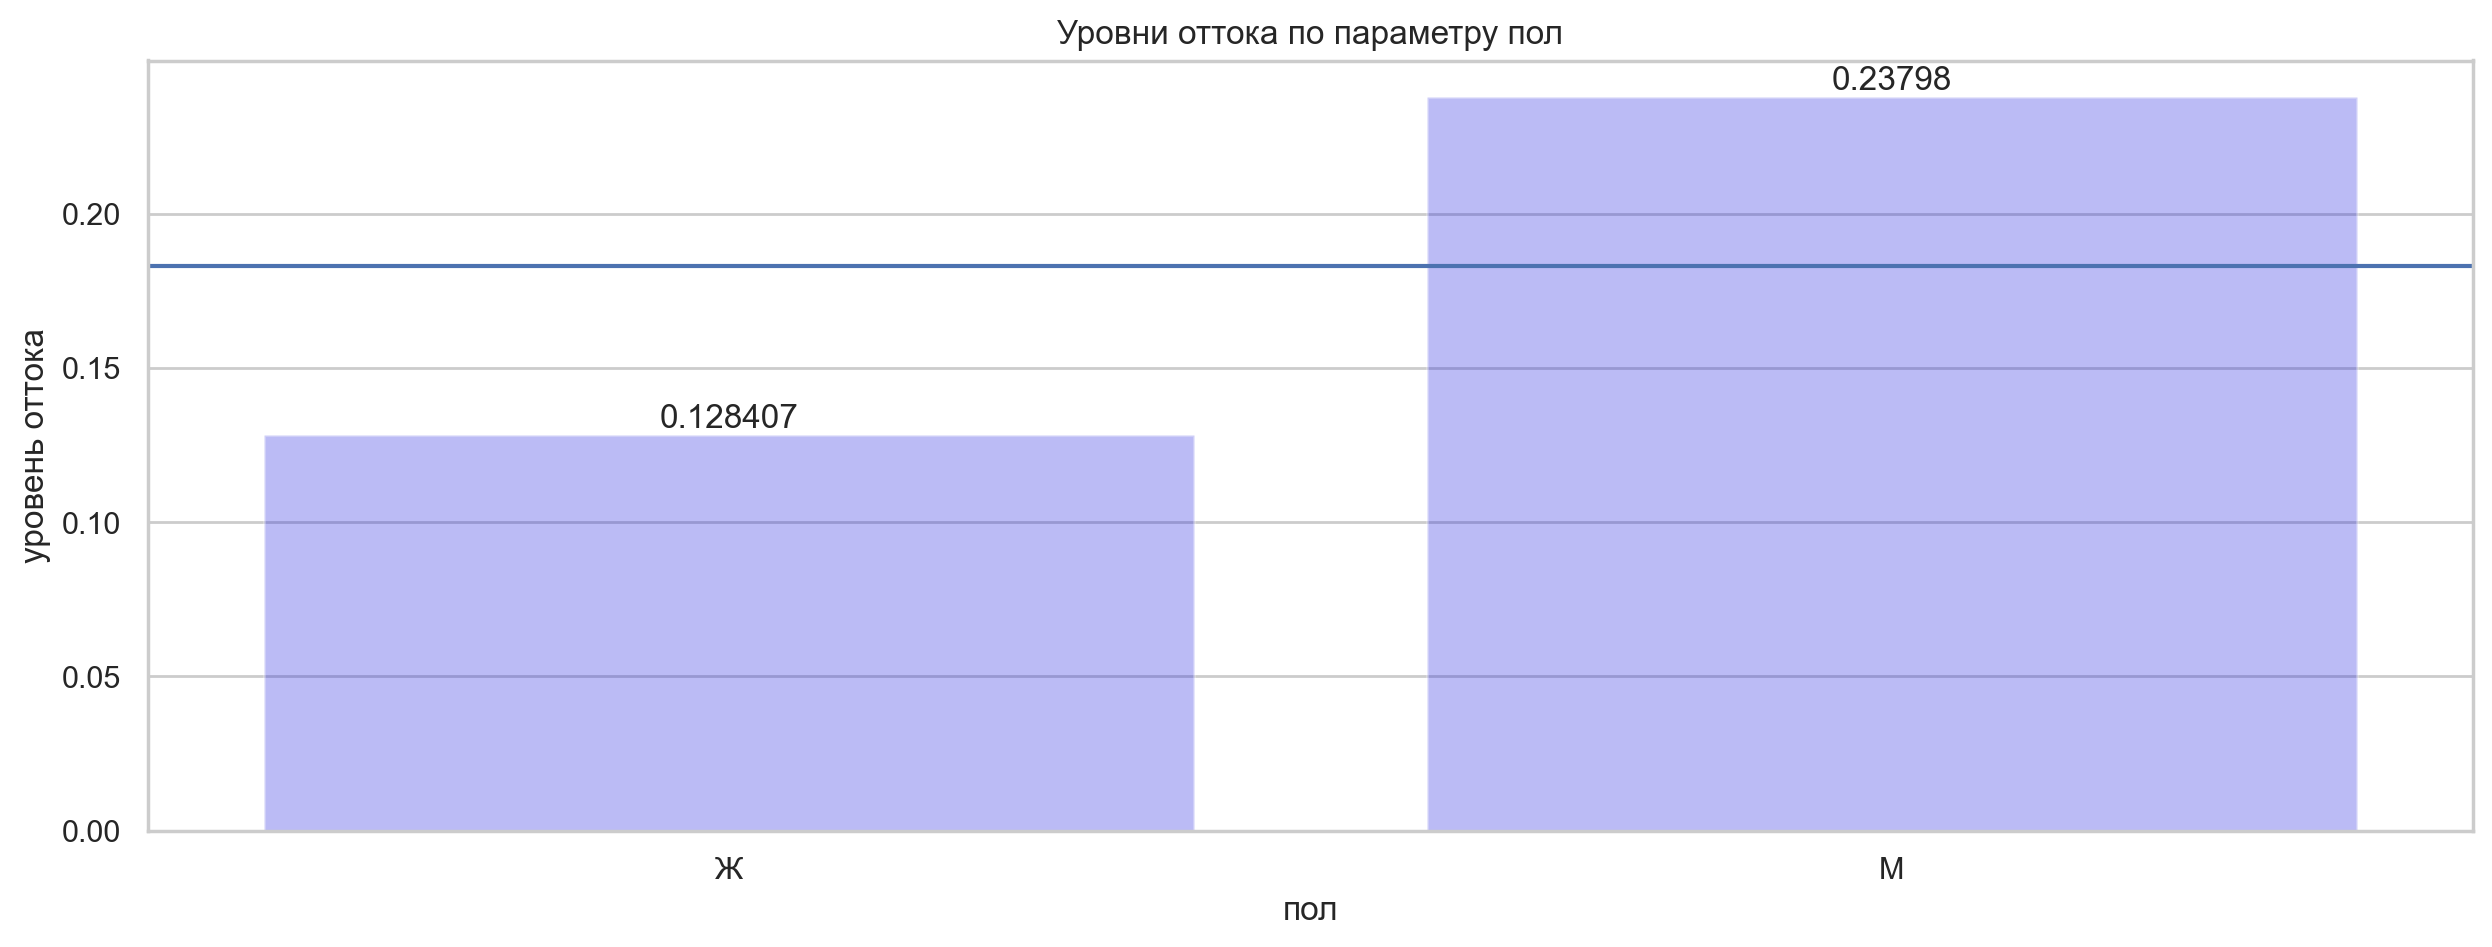

In [48]:
levels_plot('gender')

В данных число мужчин и женщин одинаково.

Если рассматривать данные в разрезе оттока, мужчины намного более часто уходят - 23.7% процент оттока.

####  Возраст

In [49]:
df['age'].describe()

count   9924.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

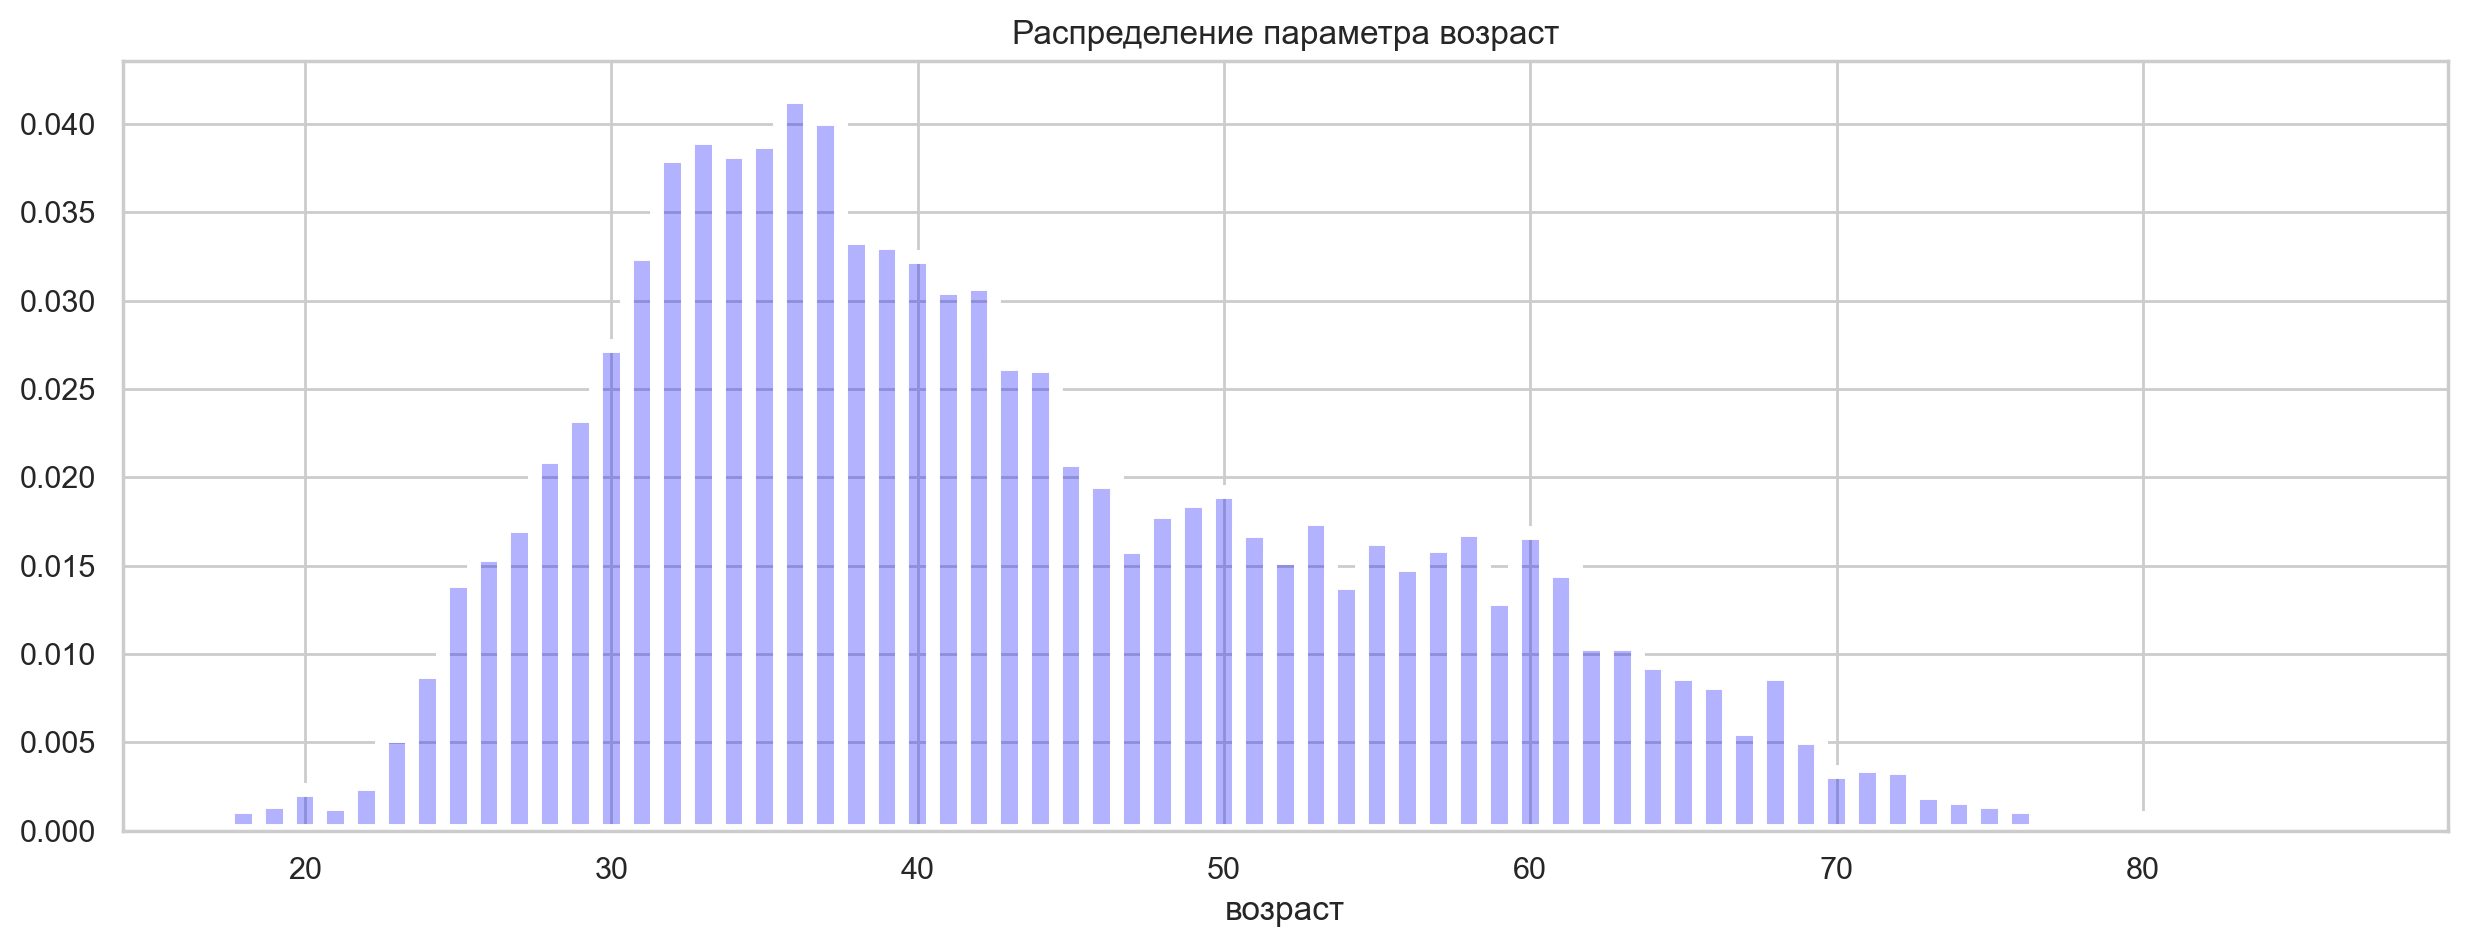

In [50]:
discrete_param_plot('age')

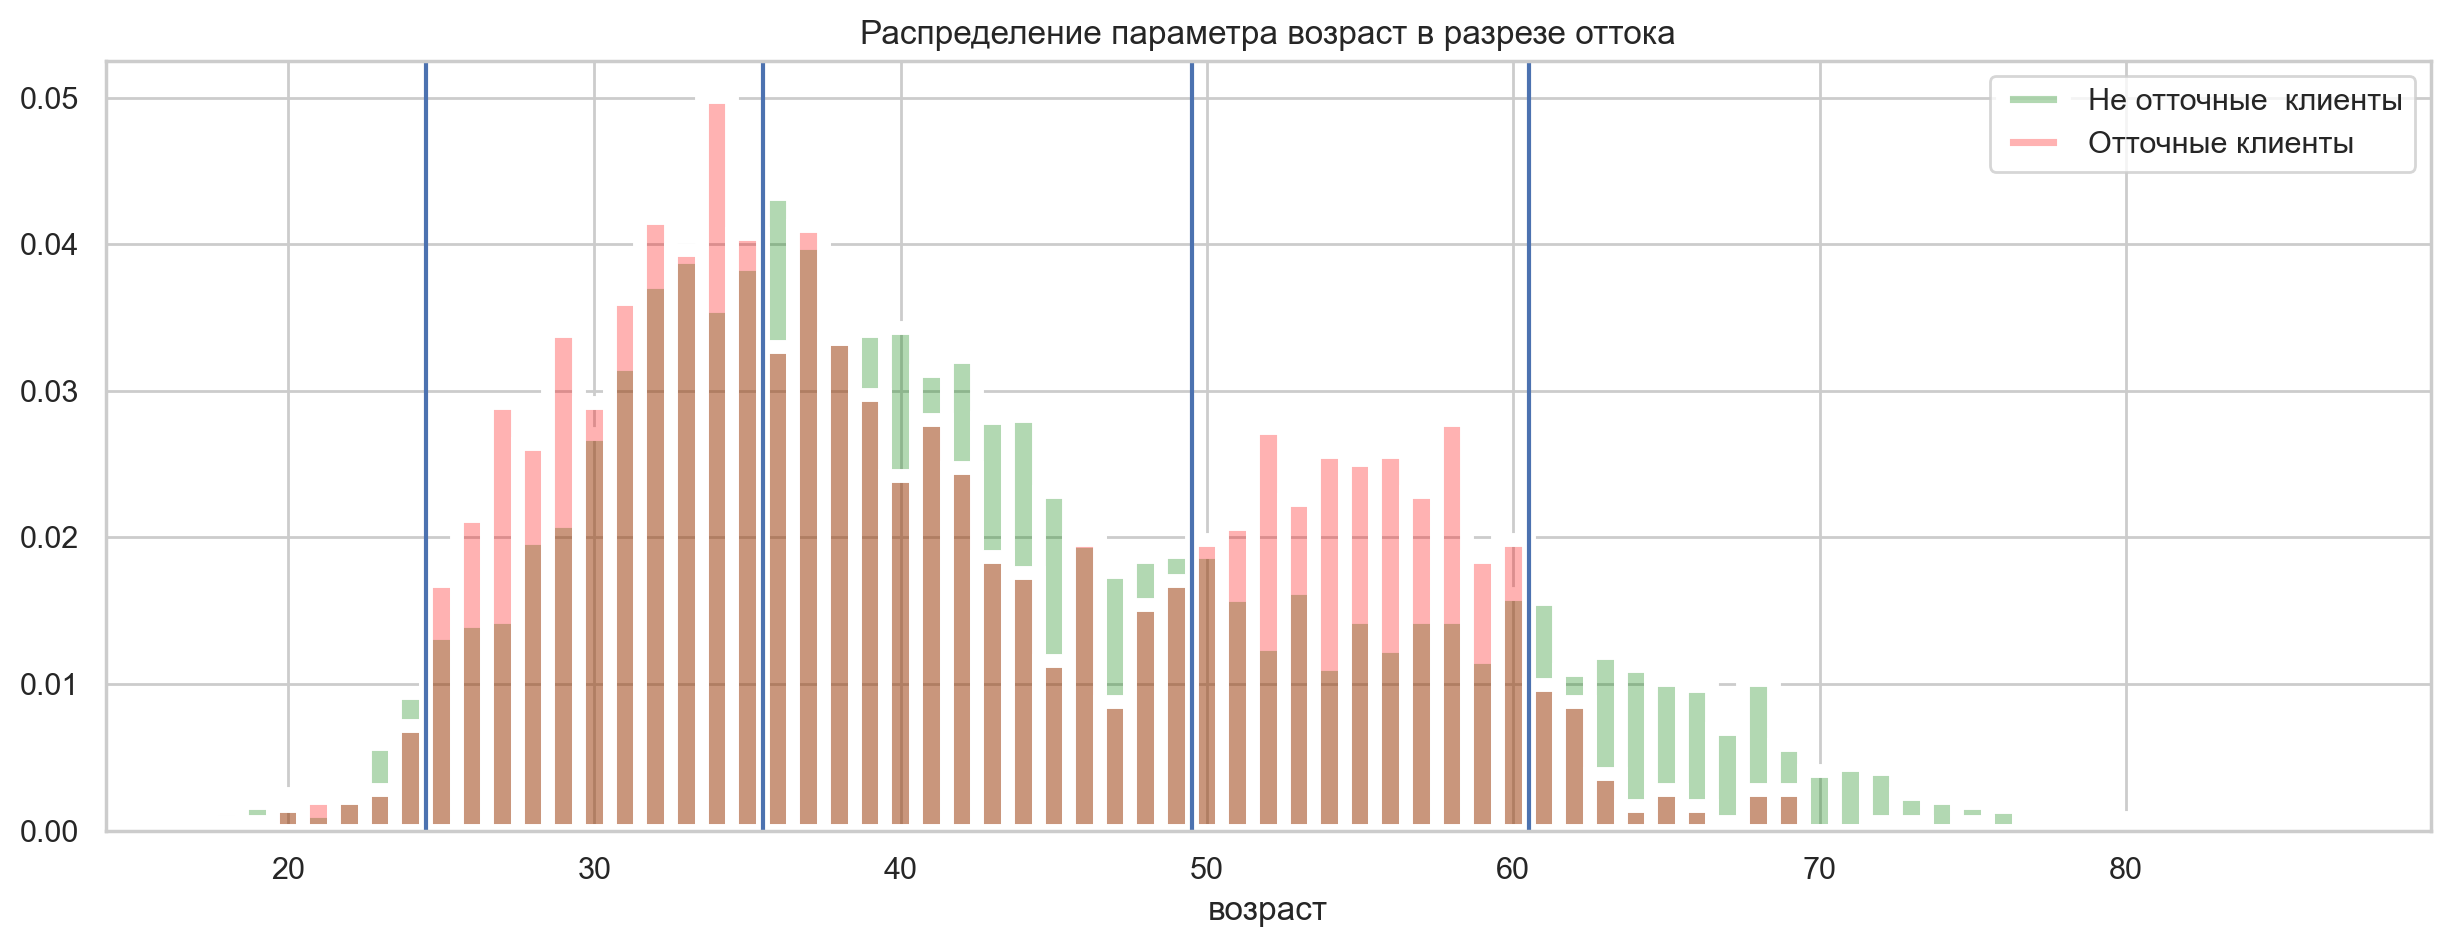

In [51]:
discrete_param_plot_churn('age')
plt.axvline(60.5)
plt.axvline(49.5)
plt.axvline(35.5)
plt.axvline(24.5);

In [52]:
def age_category(age):
    if 18 <= age < 25:
        return '18-24 лет'
    elif 25 <= age < 36:
        return '25-35 лет'
    elif 36 <= age < 50:
        return '36-49 лет'
    elif 50 <= age < 61:
        return '50-60 лет'
    elif 61 <= age:
        return '60+ лет'

df['age_cat'] = df['age'].apply(age_category)

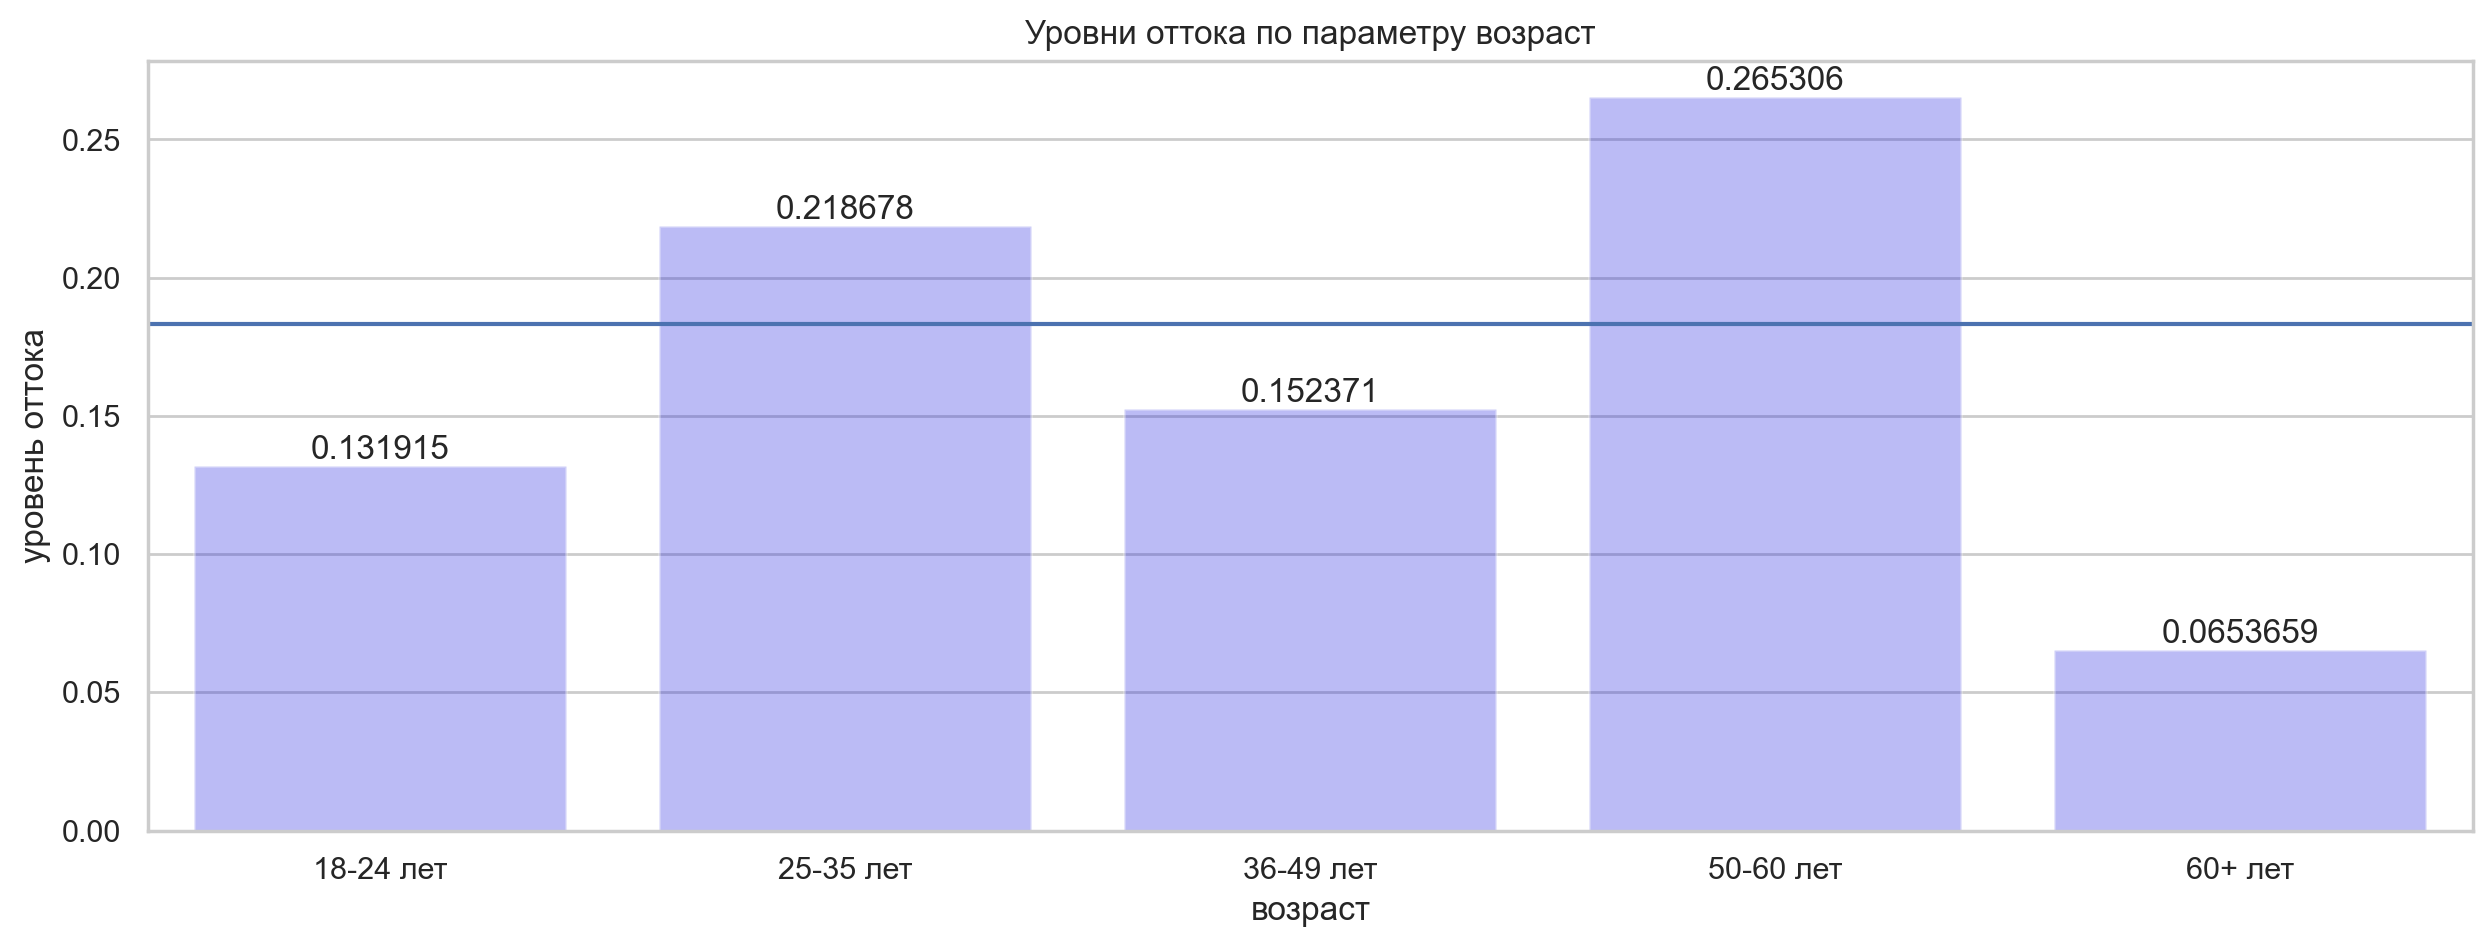

In [53]:
levels_plot('age_cat')

Возраст большинства клиентов банка в диапозоне от 18 лет до 76 лет. Клиенты старше 76 лет редкость. Среднее значение 40 лет. Распределение имеет хвост в сторону больших значений.

Если рассматривать клиентов в разрезе оттока, то клиентов можно разделить на несколько групп:
- 18-24 лет
- 25-35 лет
- 36-49 лет
- 50-60 лет
- 60+ лет

Больший процент отточных клиентов находится в возрастной группе 50-60 лет - 26.5%.

#### Количество баллов собственности

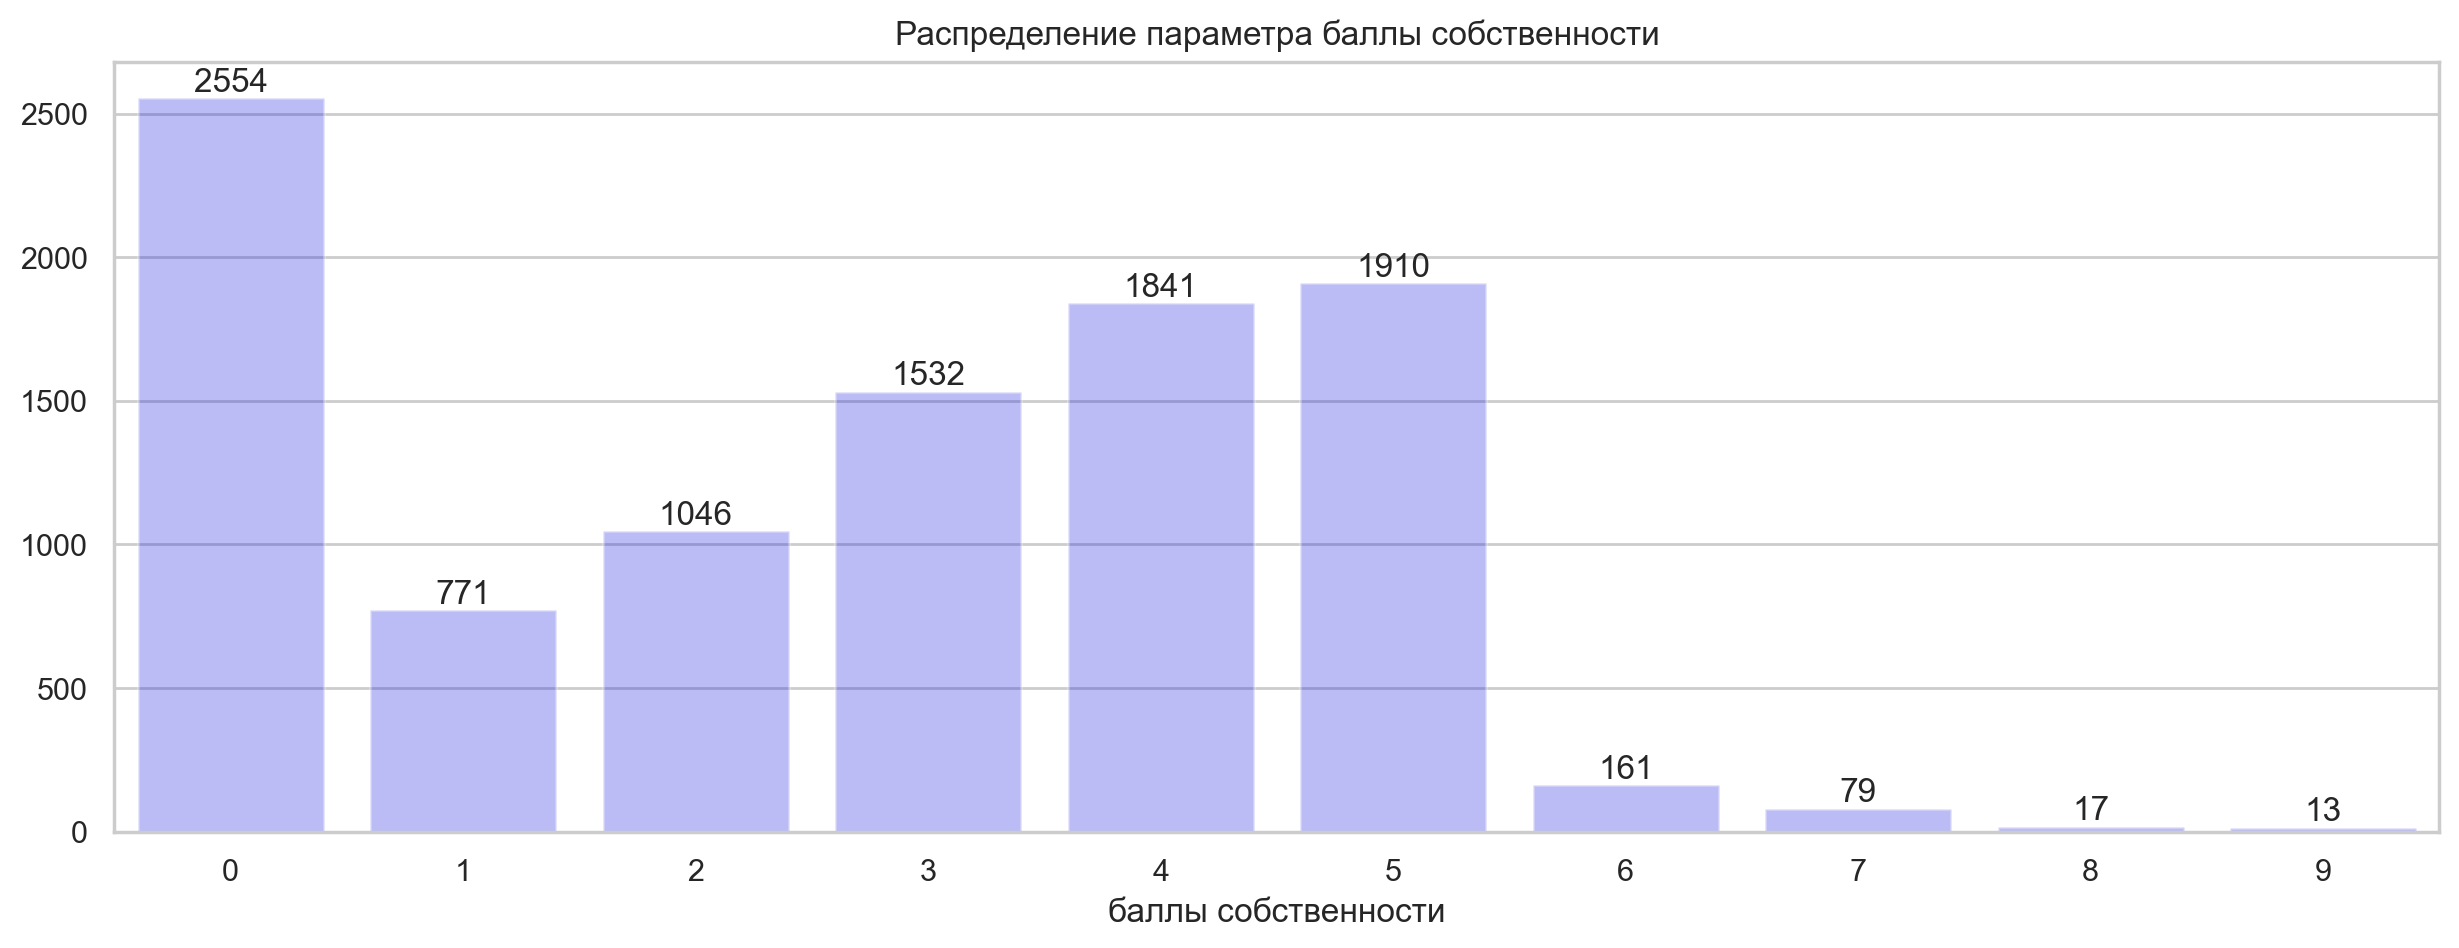

In [54]:
category_param_plot('equity')

In [55]:
df['equity'].describe()

count   9924.00
mean       2.63
std        1.98
min        0.00
25%        0.00
50%        3.00
75%        4.00
max        9.00
Name: equity, dtype: float64

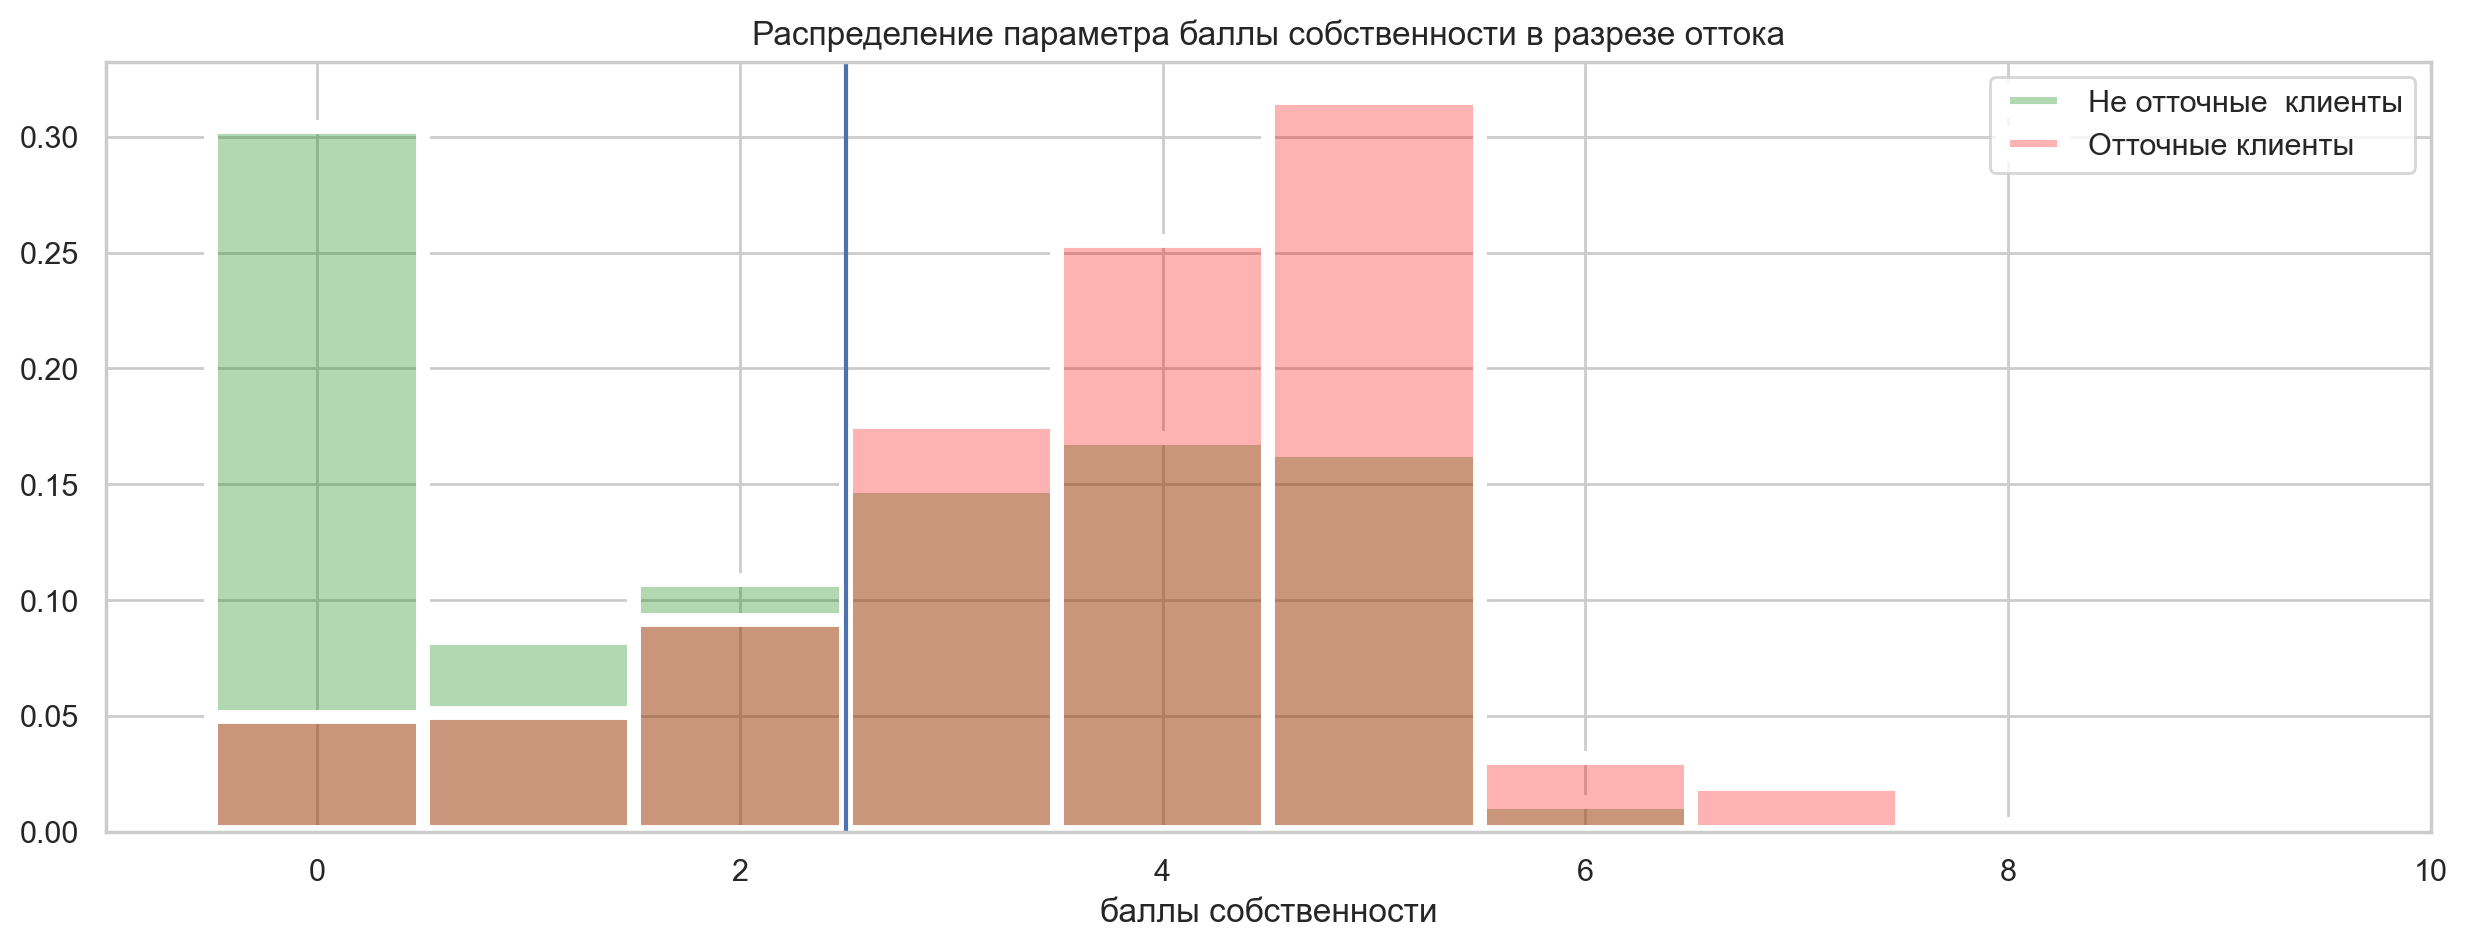

In [56]:
discrete_param_plot_churn('equity')
plt.axvline(2.5);

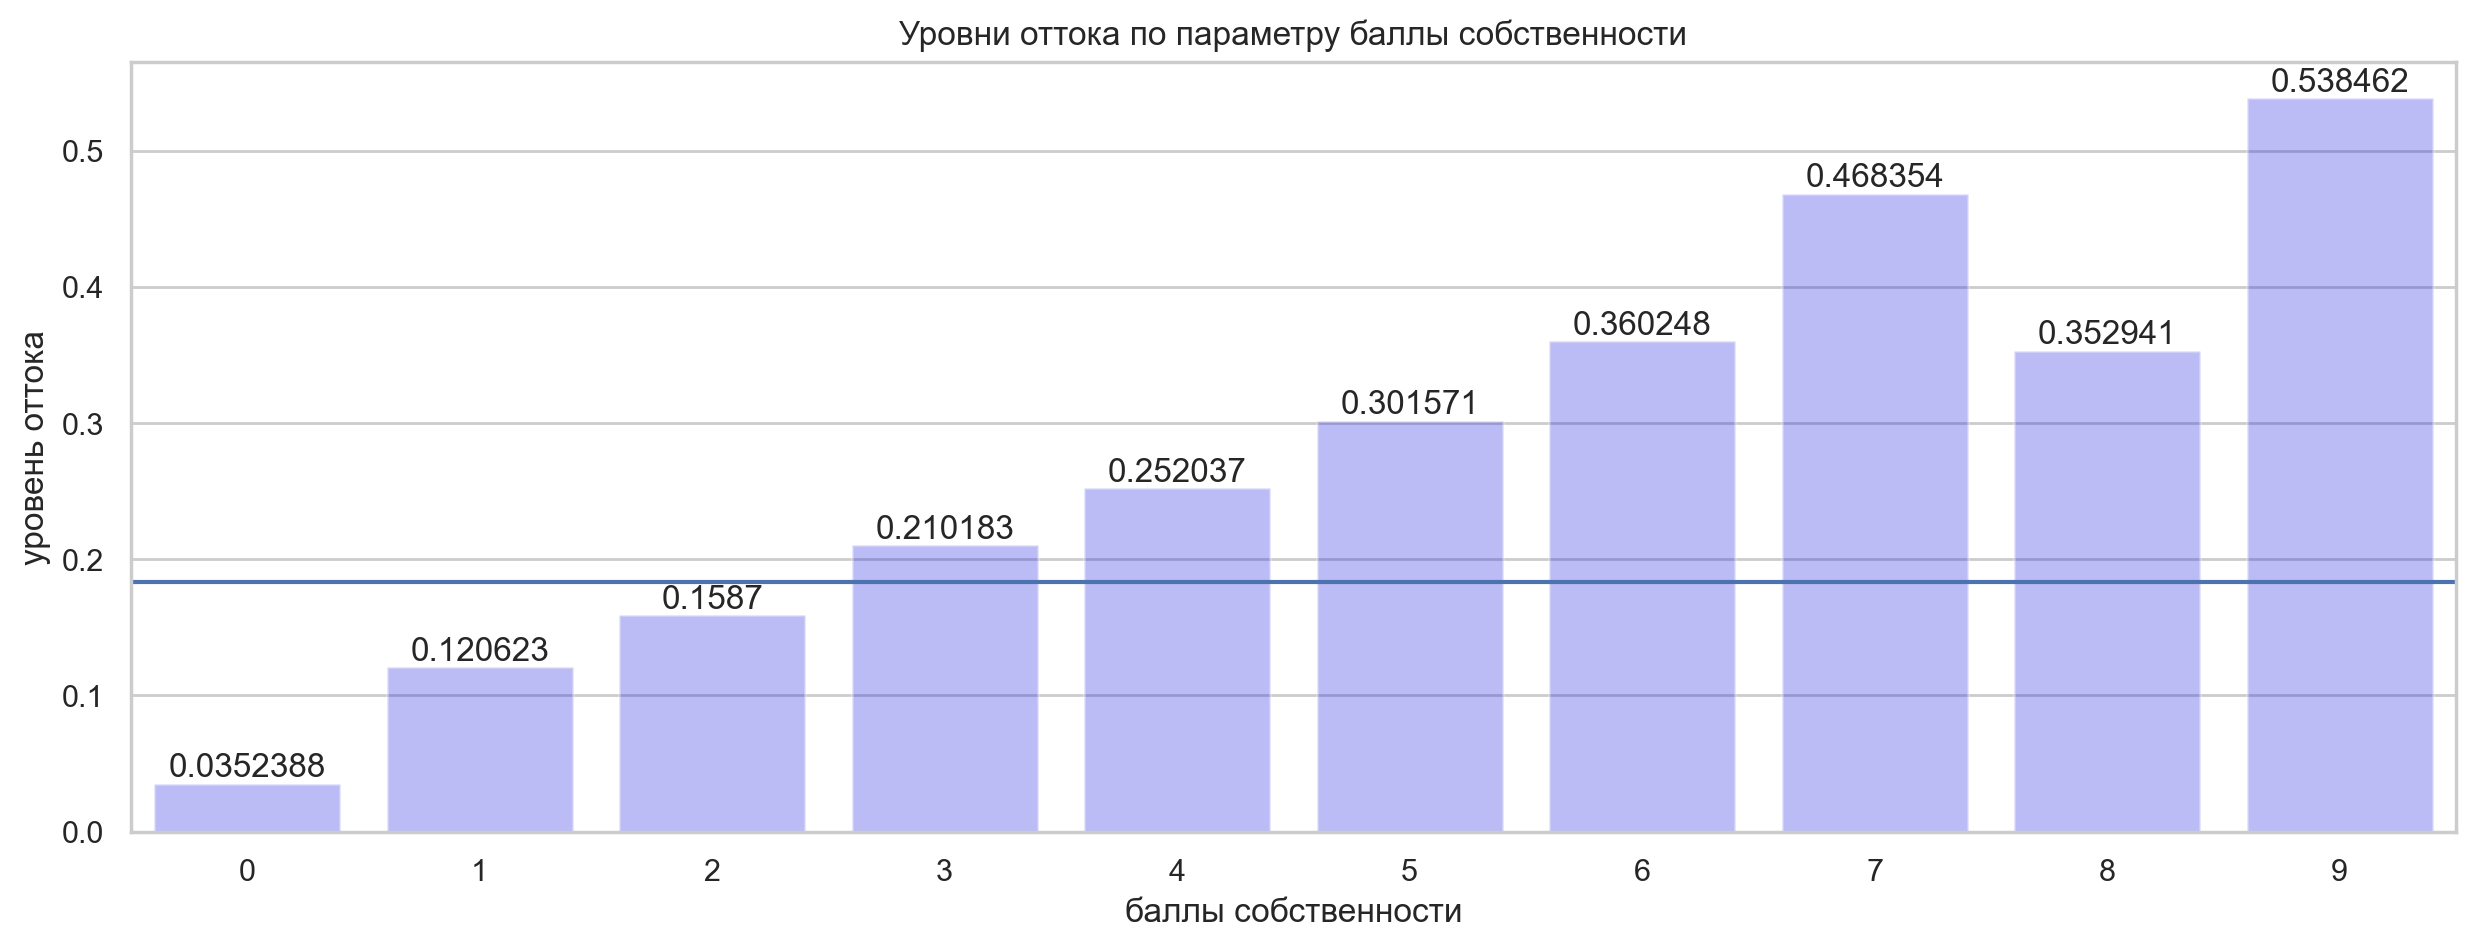

In [57]:
levels_plot('equity')

Количество баллов собственности варьируется от 0 до 9. Большинство клиентов имеет 0 баллов собственности. Из-за этого среднее больше смещено к нулю, в среднем у клиента 3 балла собственности.

В разрезе оттока клиенты, у которых баллы собственности выше 3 чаще уходят, в основном чем больше балл, тем больше процент ухода от 21% до 53.8%.

####  Количество средств на счёте

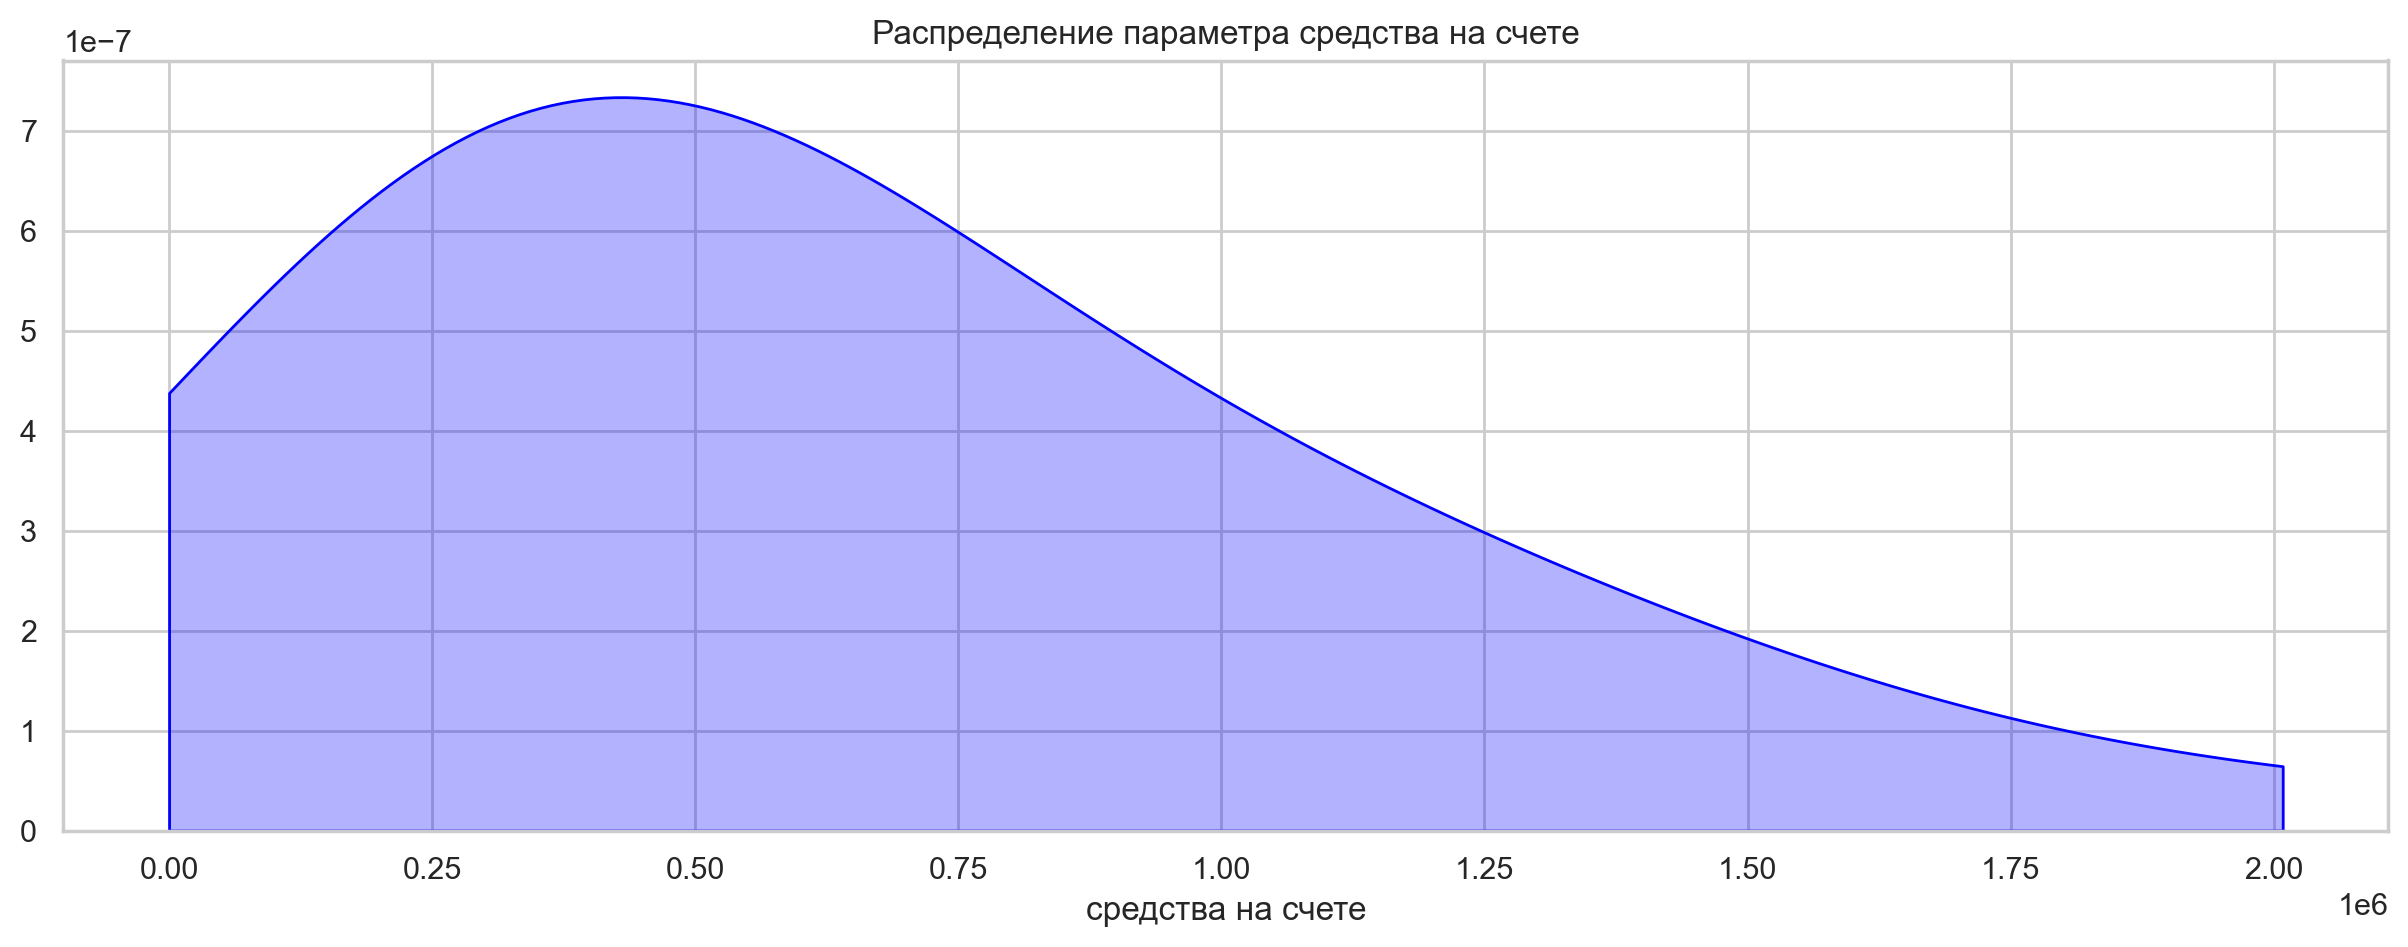

In [58]:
continuous_param_plot('balance')

In [59]:
df['balance'].describe()

count        7664.00
mean       828206.27
std       1984121.61
min             0.00
25%        295526.57
50%        524927.74
75%        980753.67
max     119113552.01
Name: balance, dtype: float64

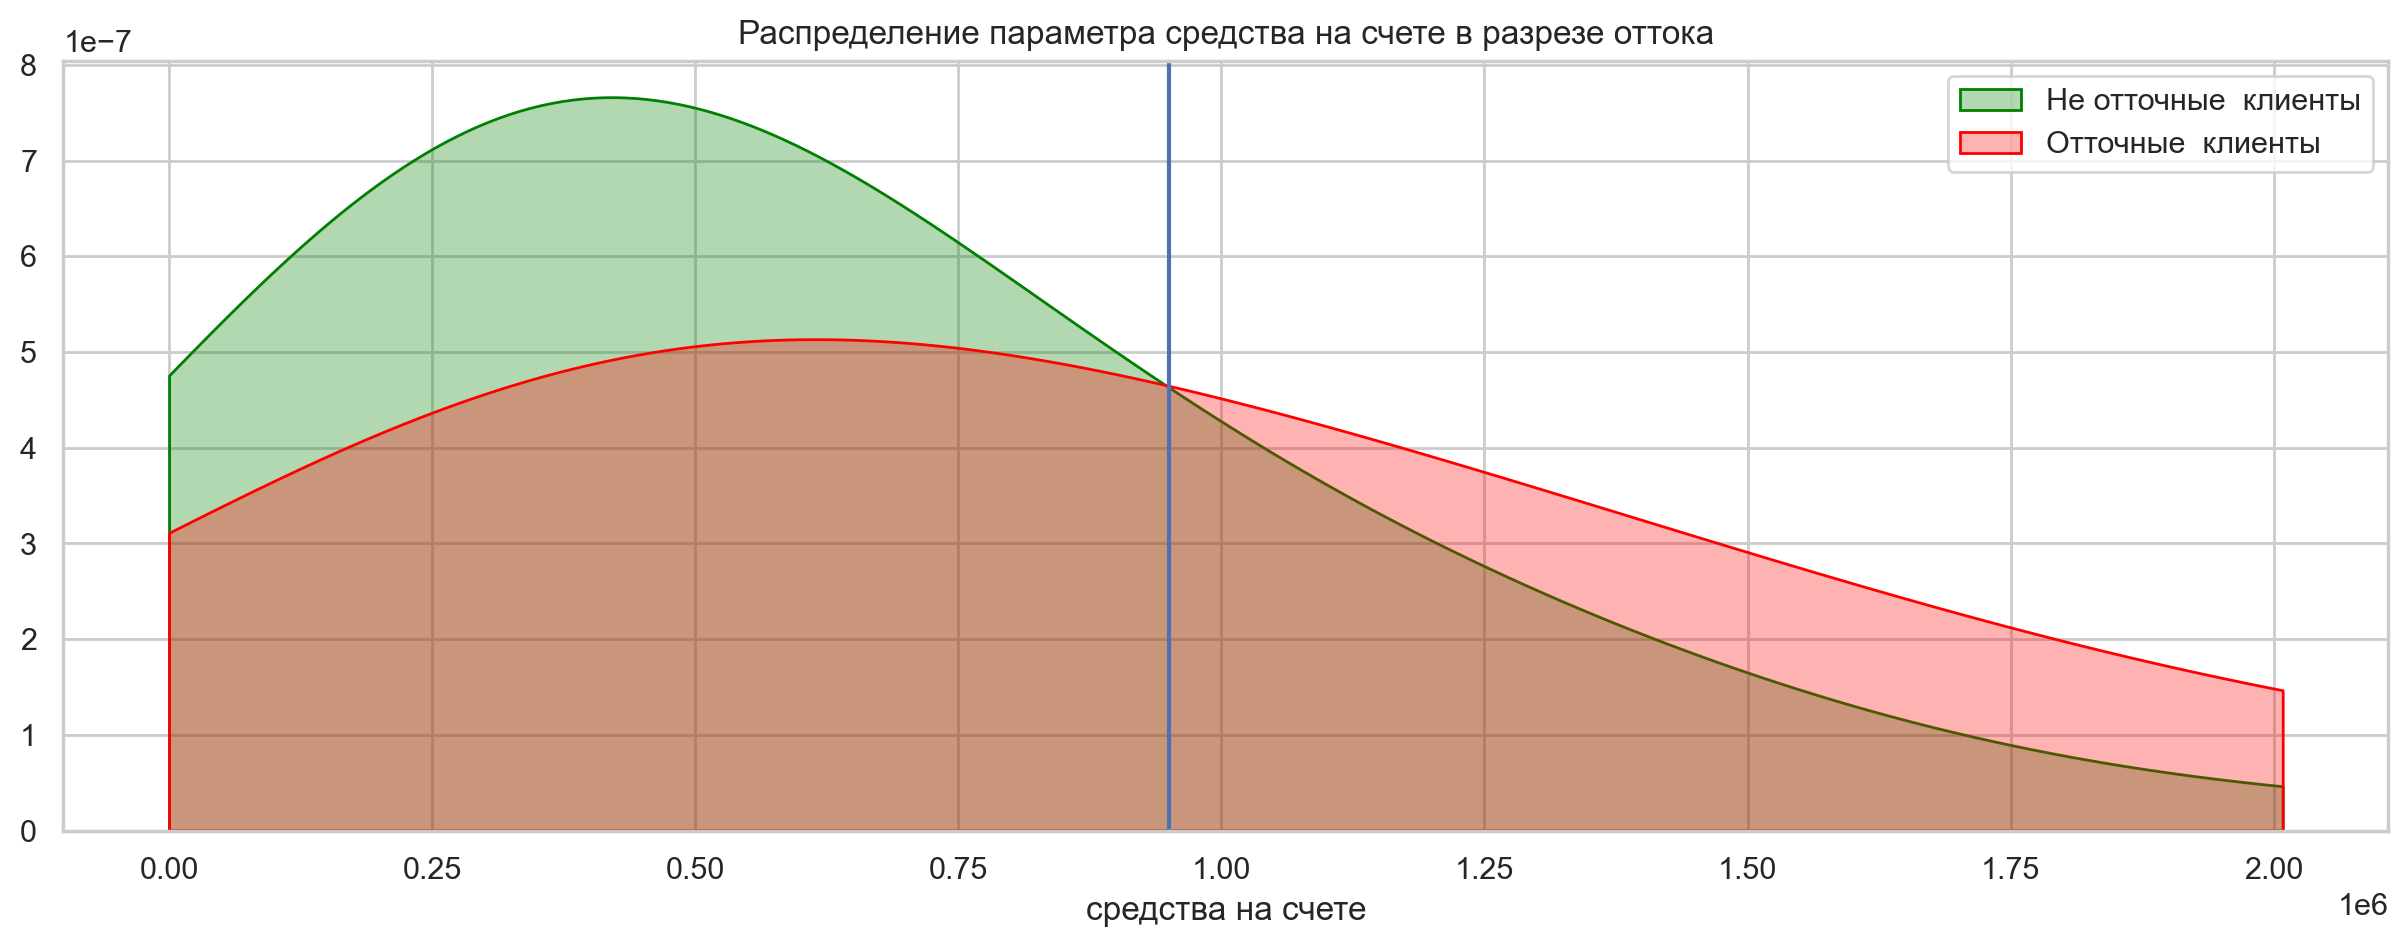

In [60]:
continuous_param_plot_churn('balance')
plt.axvline(0.95*10**6);

Большинство клиентов имеет на счете не более 2 000 000, больше - редкость. В среднем на счету клиентов лежит около 500 000. Распределение имеет длинный хвост в сторону больших значений.

В разрезе оттока клиенты клиенты, на счету которых более 950 000 уходят чаще.

#### Количество продуктов банка, которыми пользуется клиент

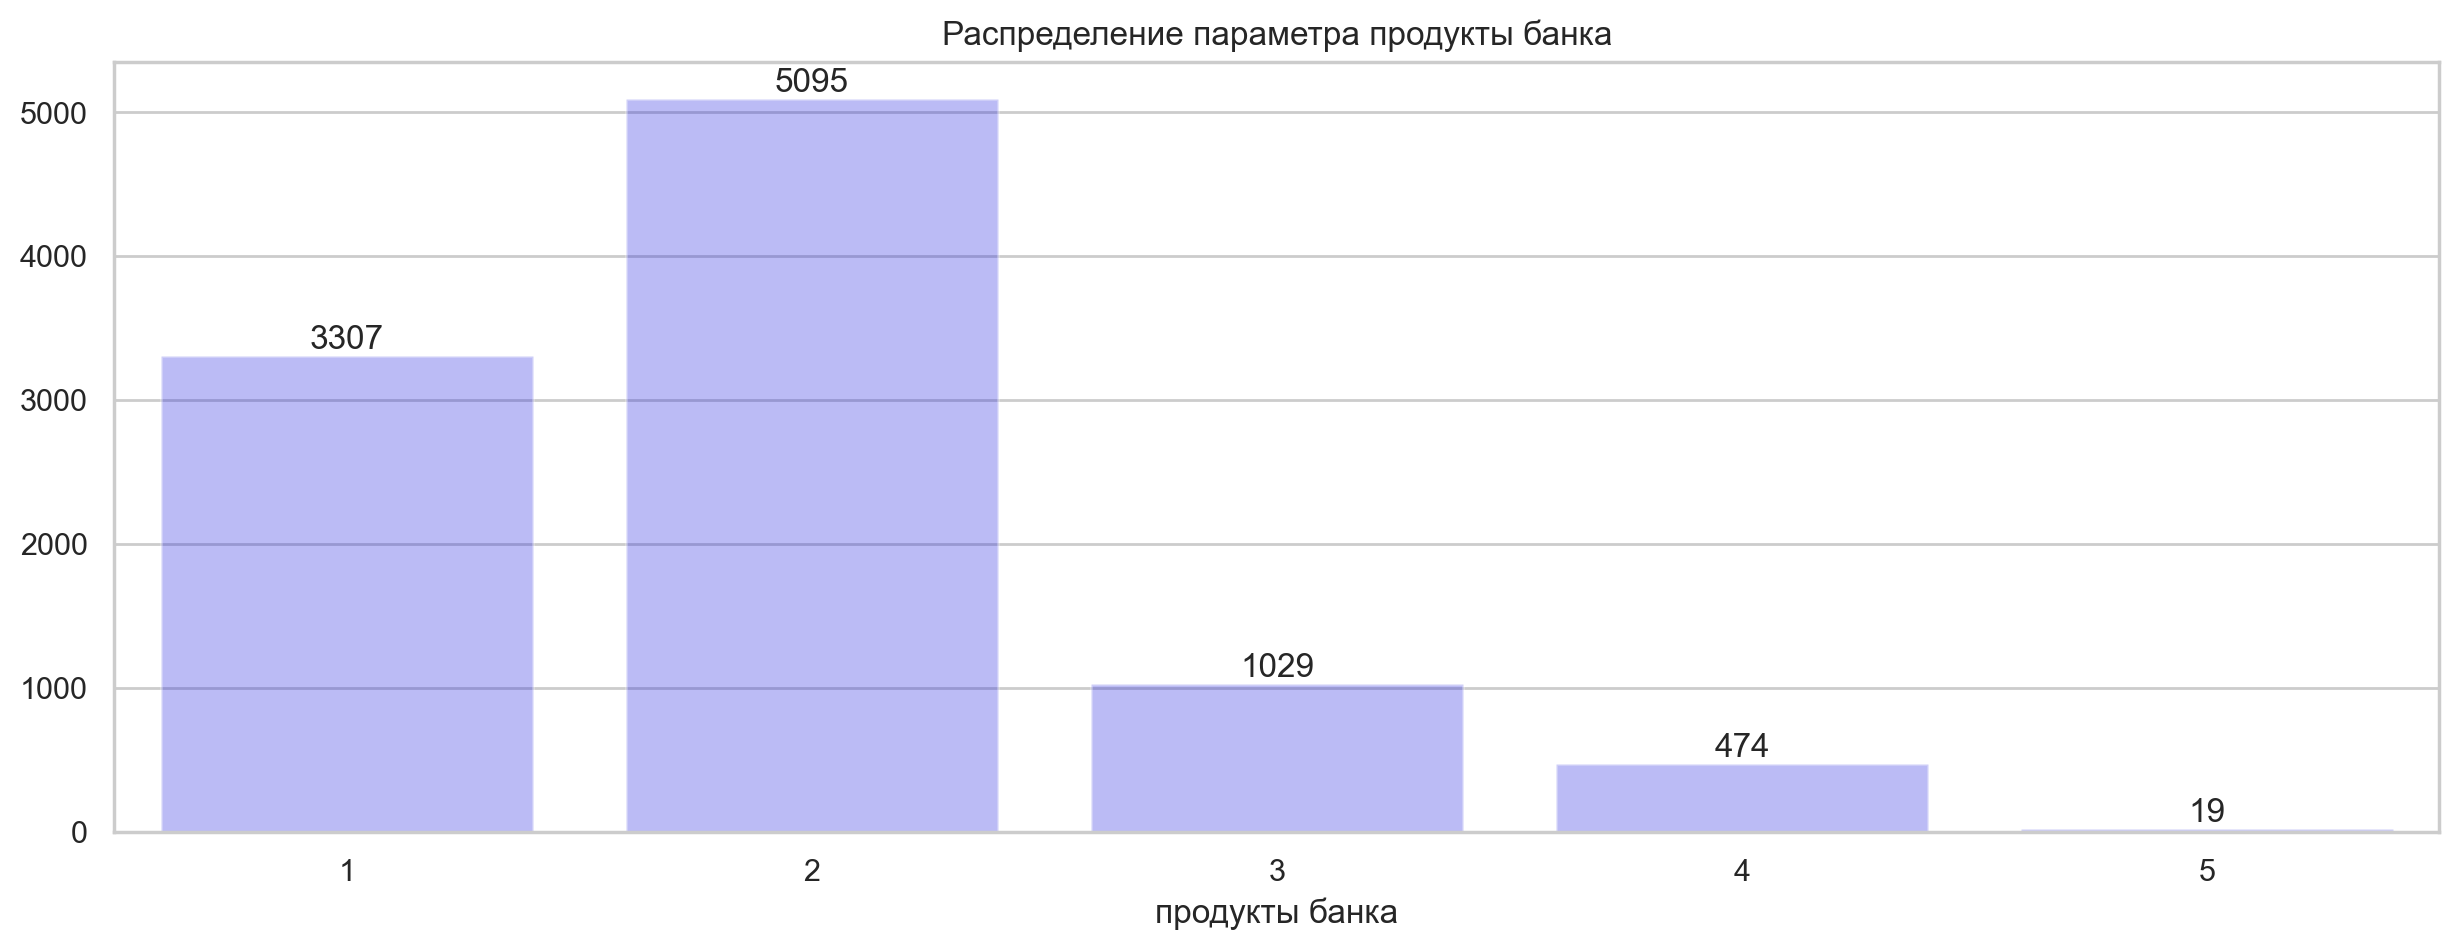

In [61]:
category_param_plot('products')

In [62]:
df['products'].describe()

count   9924.00
mean       1.87
std        0.79
min        1.00
25%        1.00
50%        2.00
75%        2.00
max        5.00
Name: products, dtype: float64

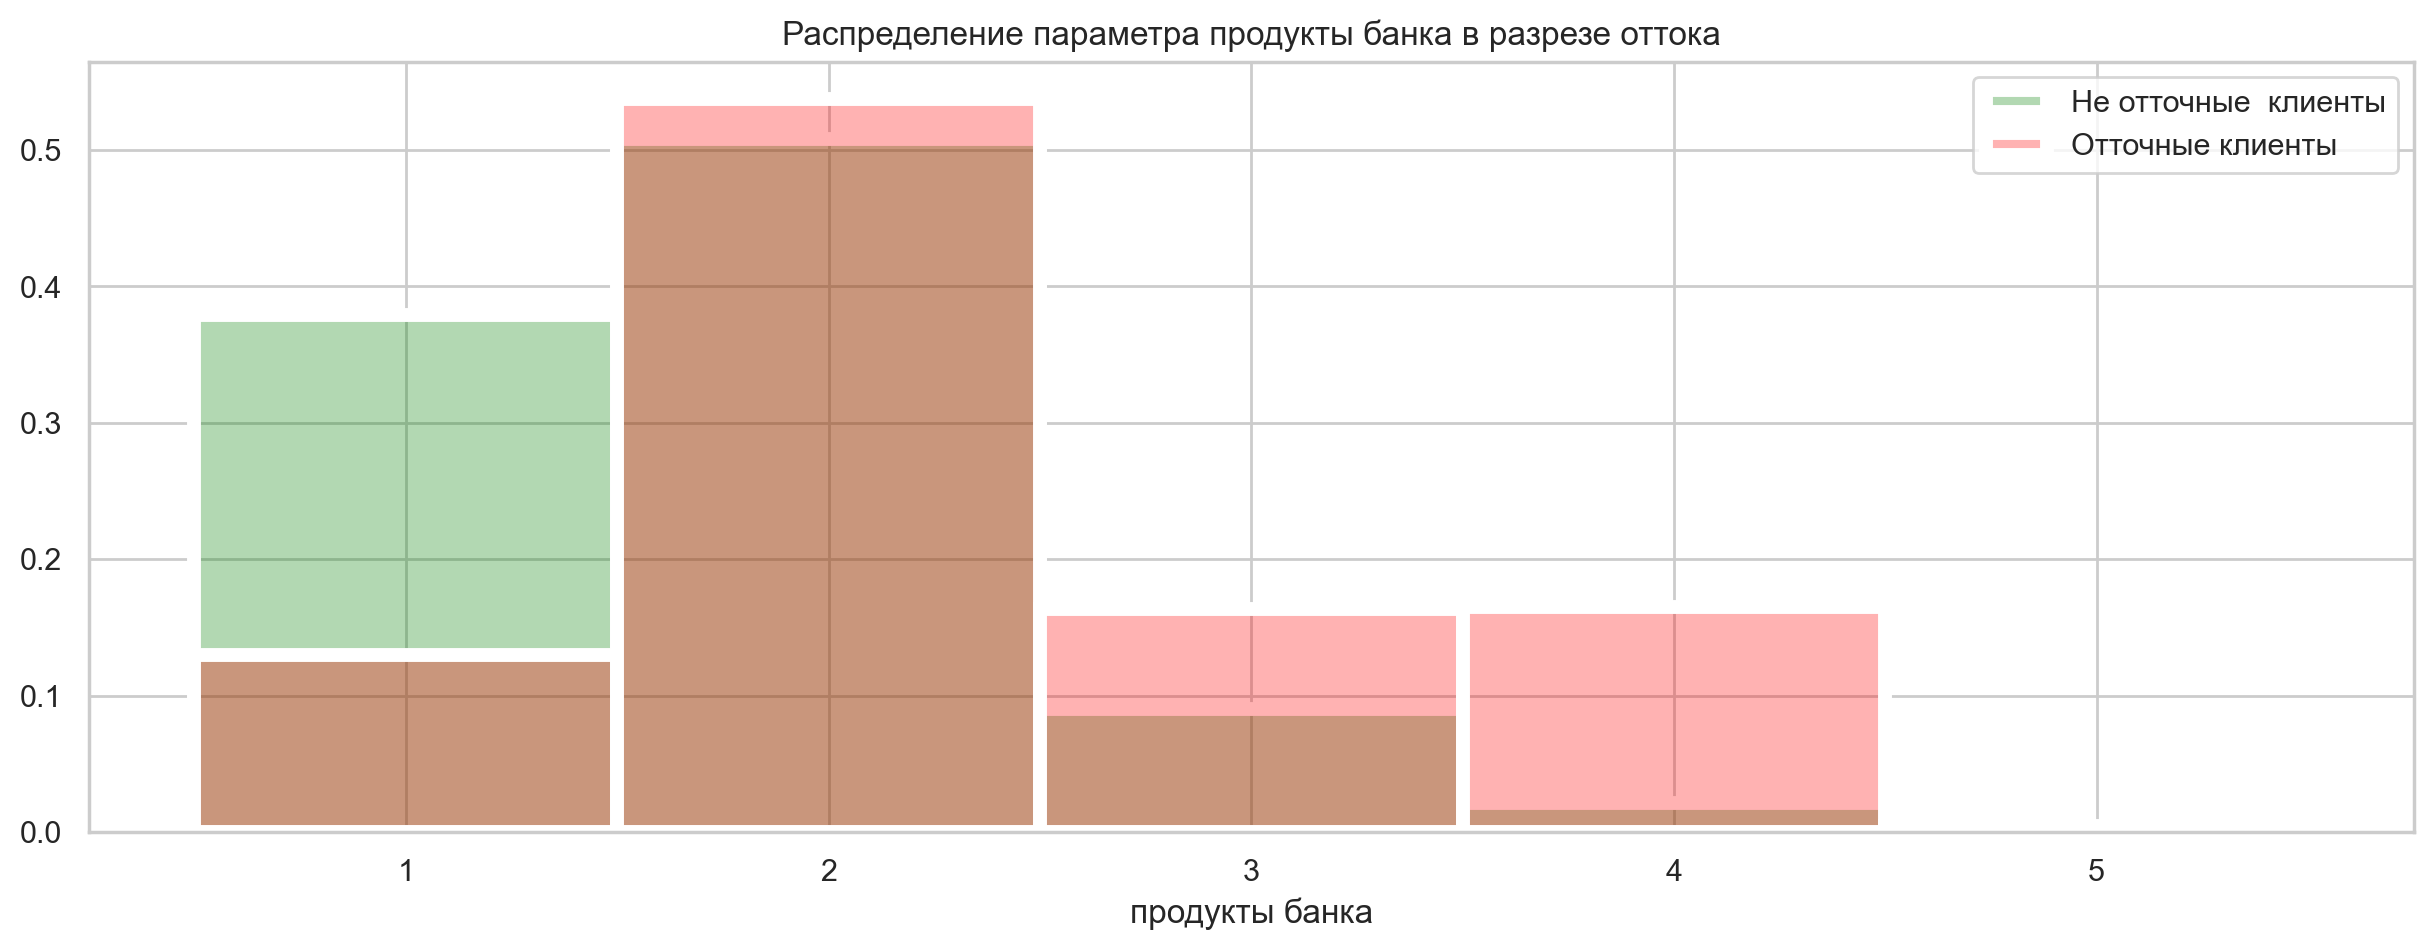

In [63]:
discrete_param_plot_churn('products')

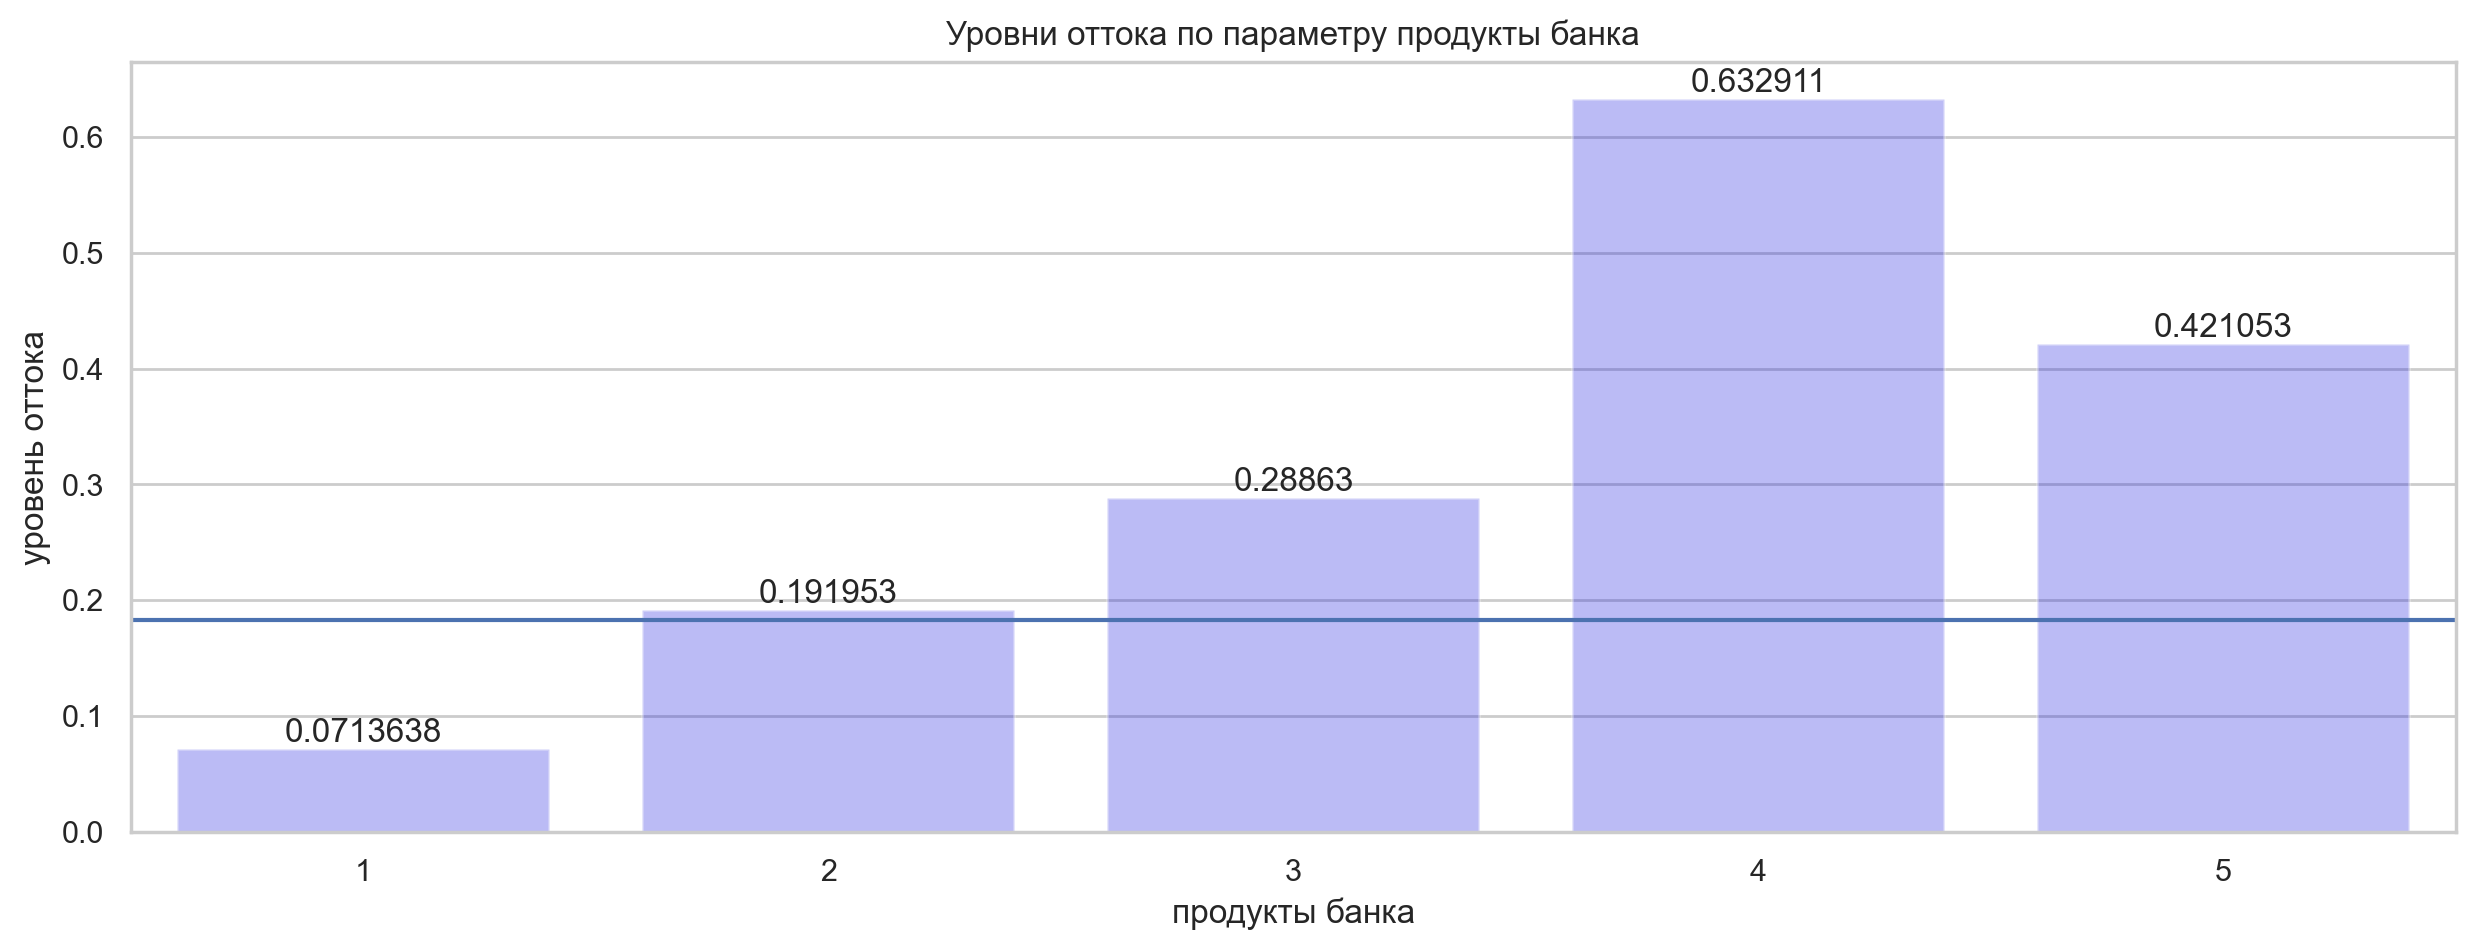

In [64]:
levels_plot('products')

Количество продуктов банка от 0 до 9. Большинство клиентов пользуется 1-2 продуктами. Из-за этого среднее больше смещено к нулю, в среднем у клиента 2 балла собственности.

В разрезе оттока клиенты, у которых количество продуктов банка 3 и более чаще уходят, в основном чем больше балл, тем больше процент ухода, максимальный процент ухода у тех, кто пользуется 4-мя продуктами - 63%.

#### Кредитная карта

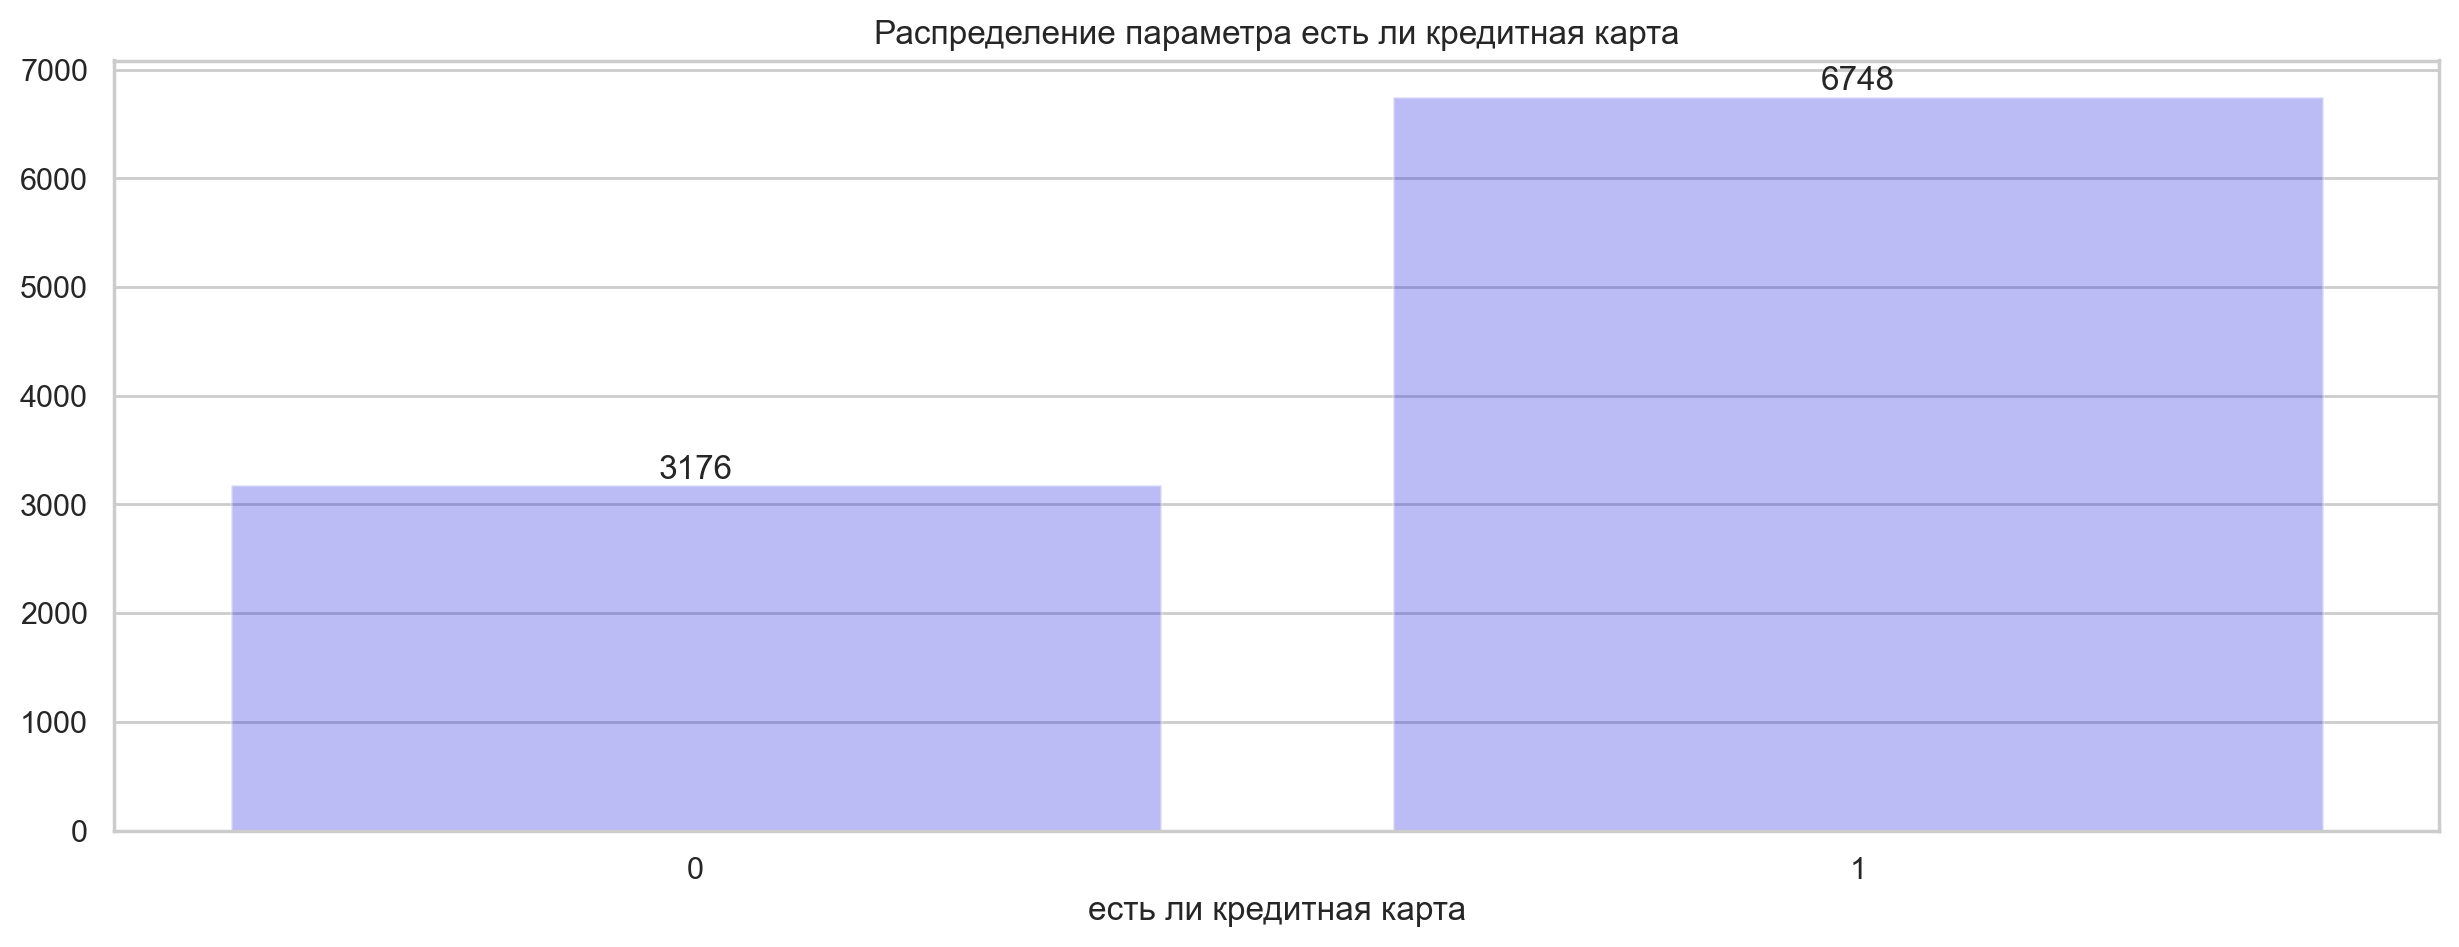

In [65]:
category_param_plot('credit_card')

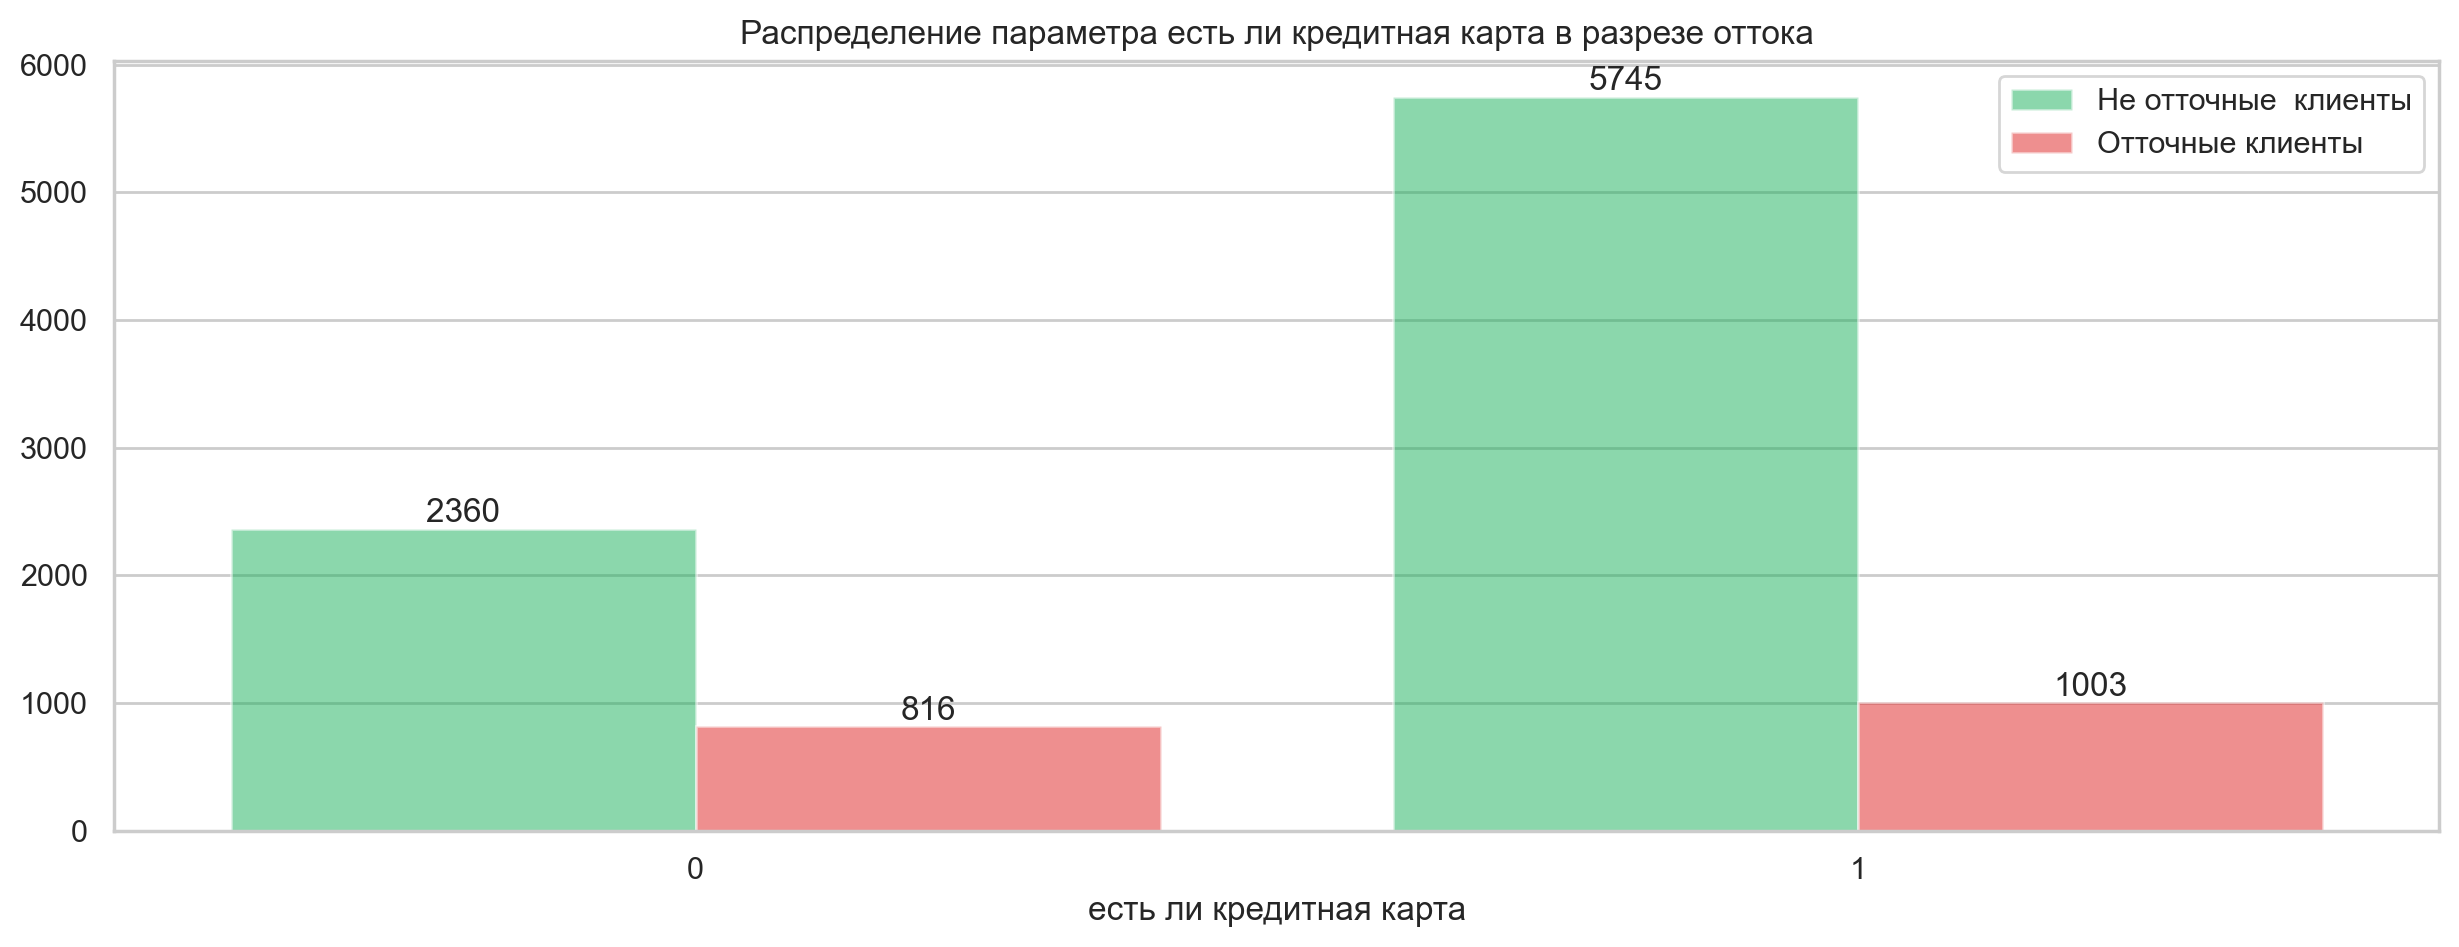

In [66]:
category_param_plot_churn('credit_card')

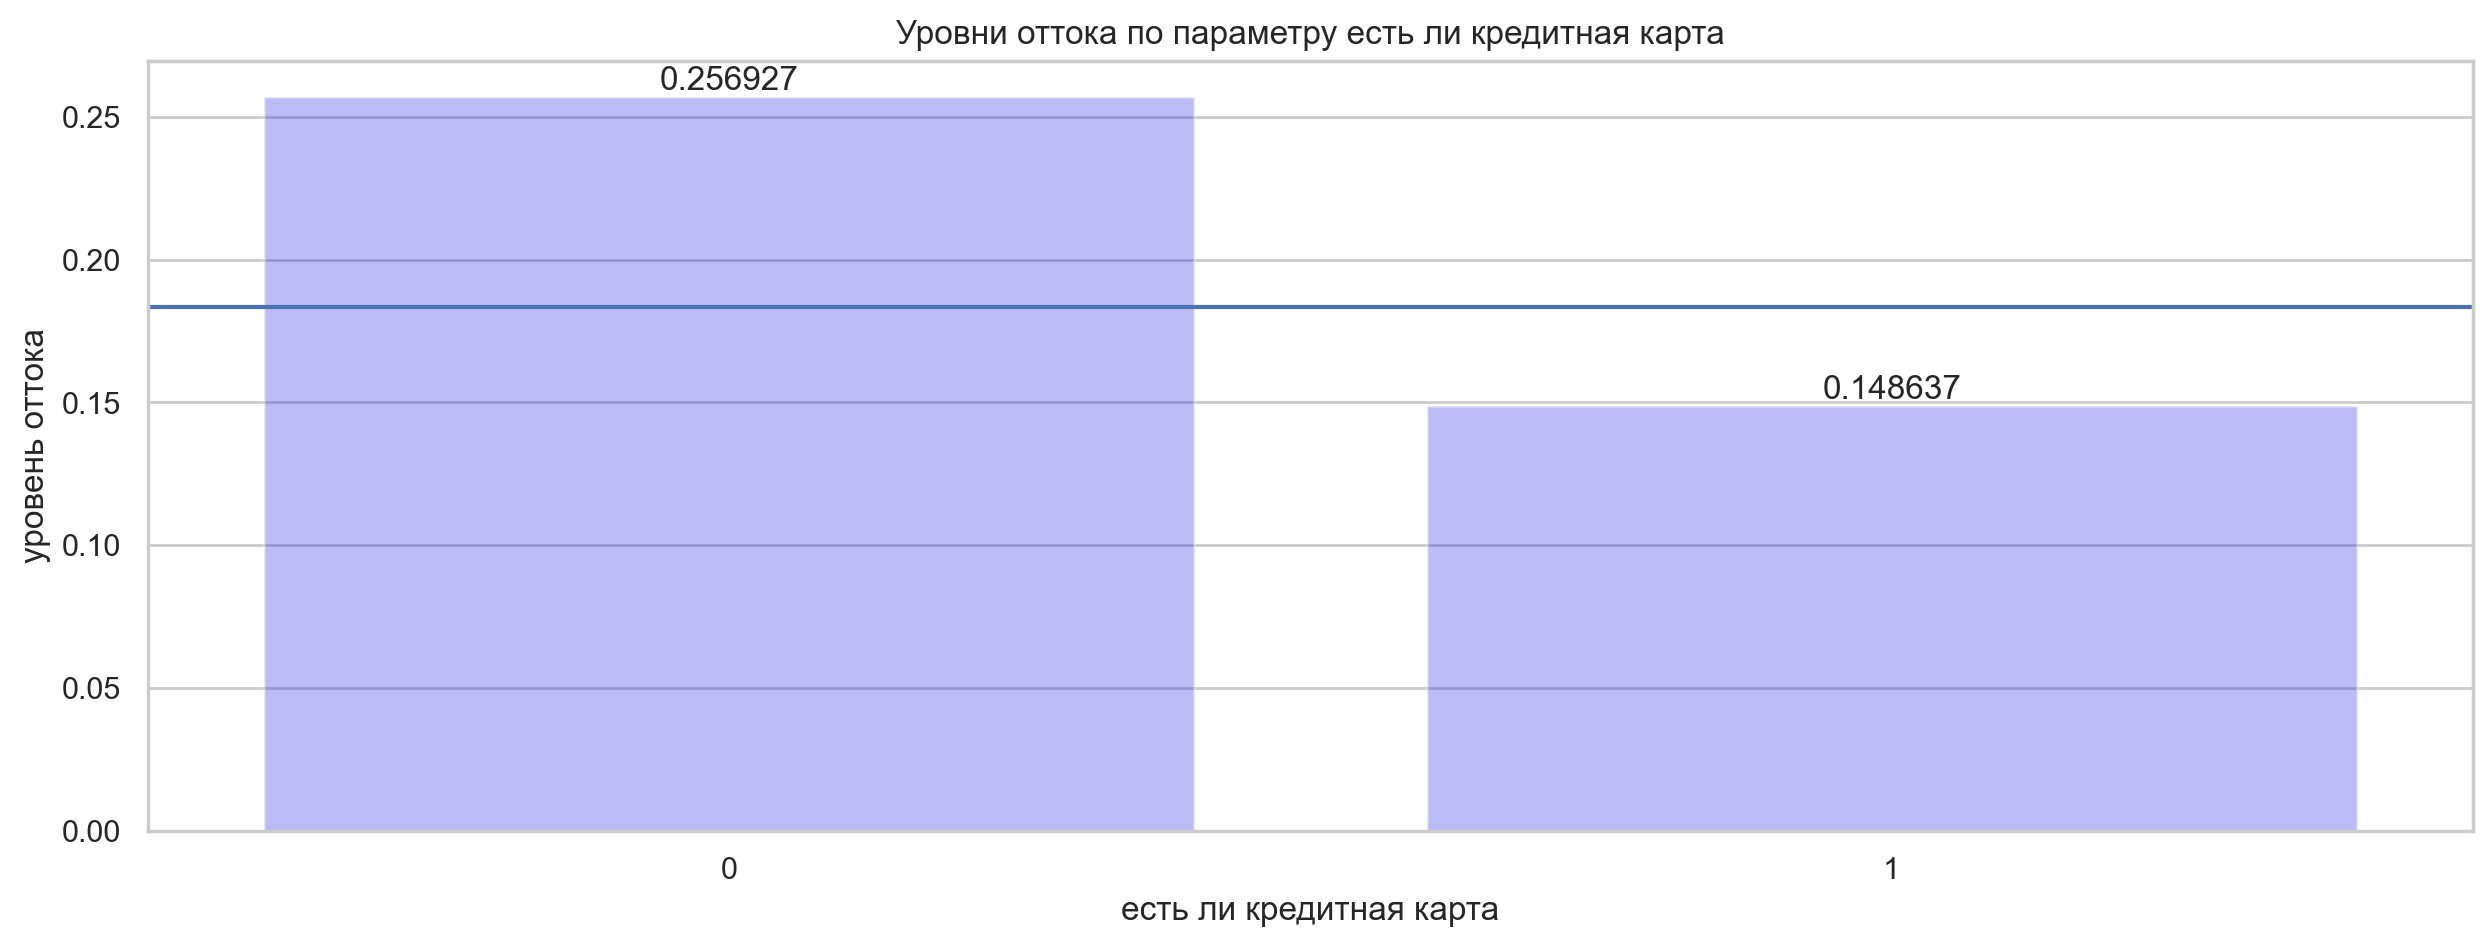

In [67]:
levels_plot('credit_card')

Большинство клиентов имеет кредитную карту.

При этом процент оттока больше среди клиентов не имеющих кредитную карту - 25.6%, это выше среднего значения оттока.

#### Активный клиент

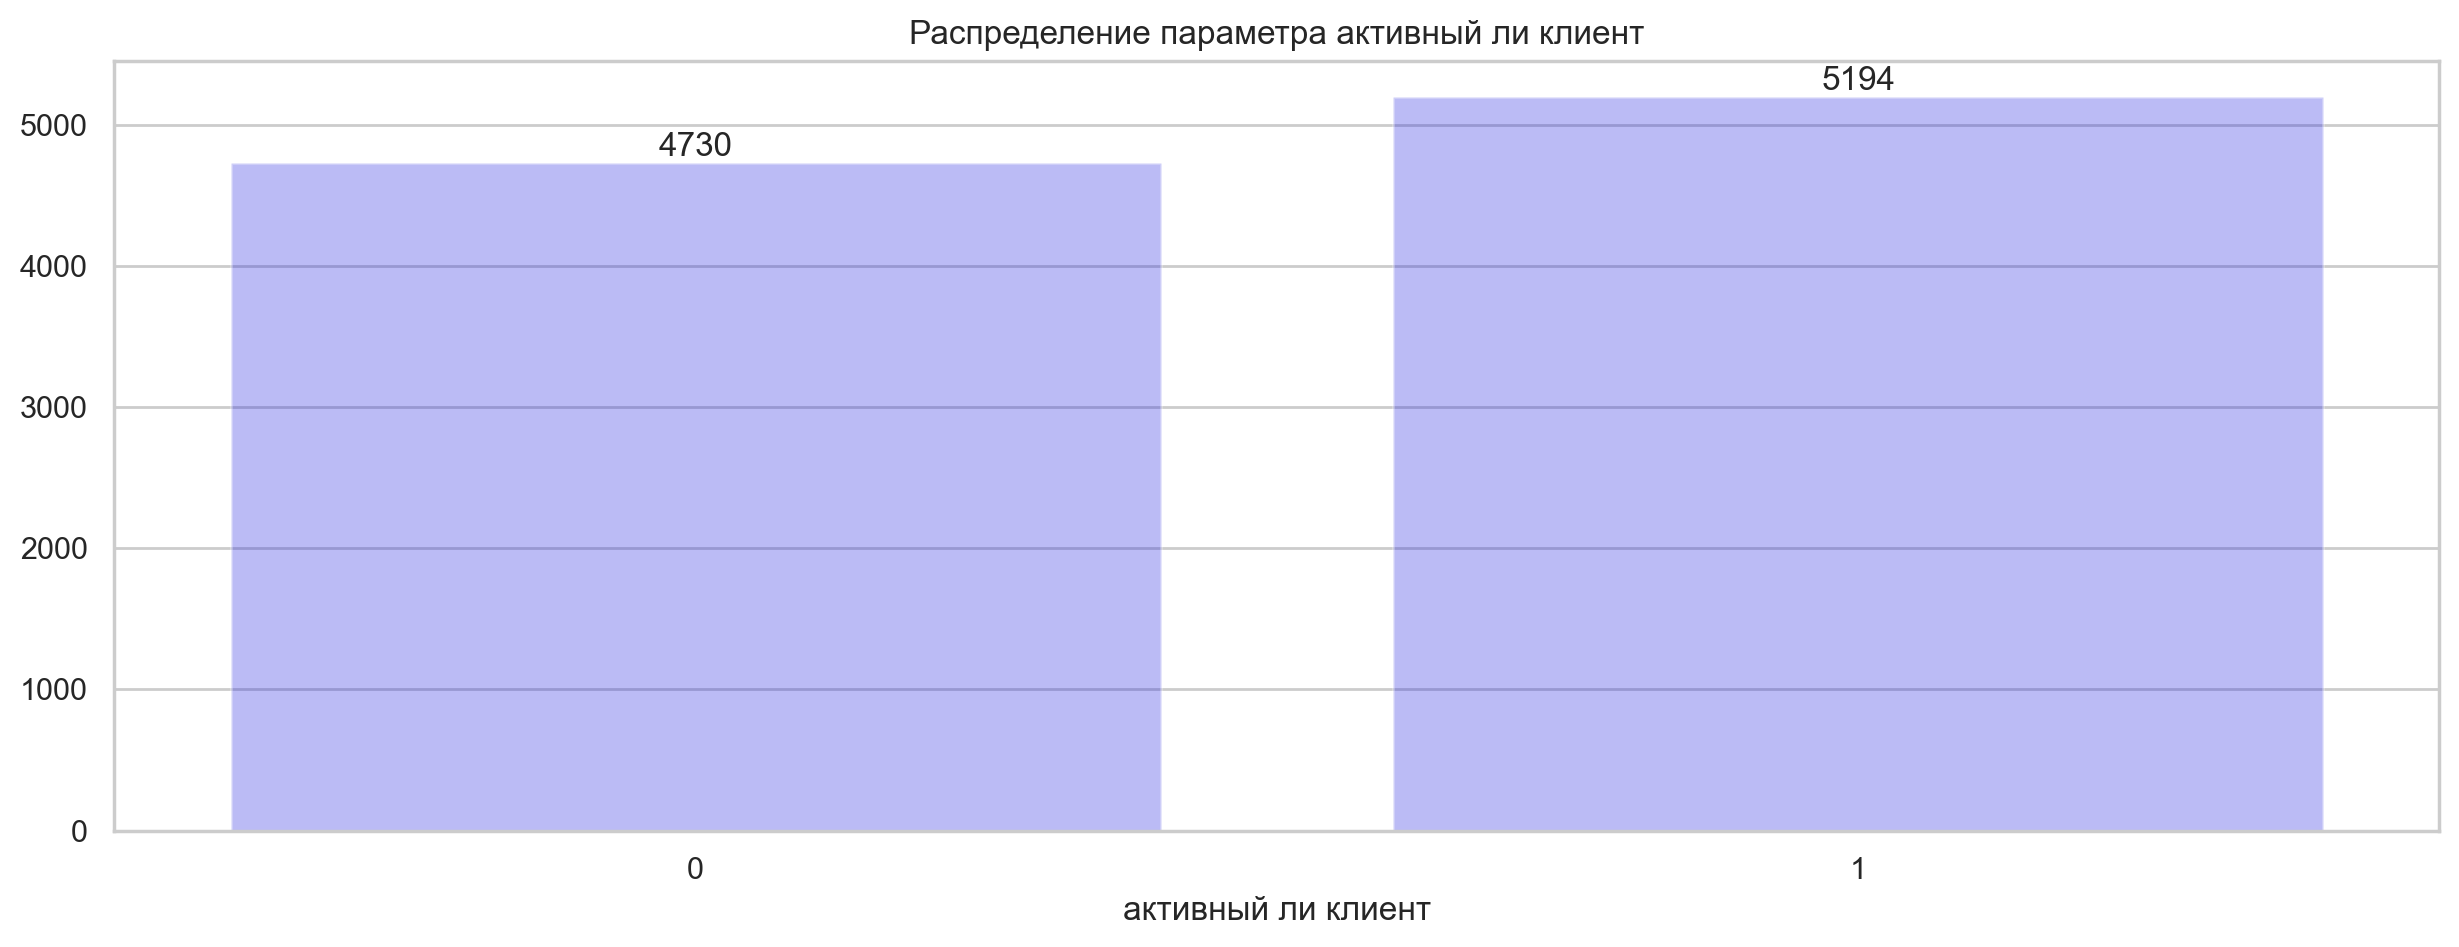

In [68]:
category_param_plot('last_activity')

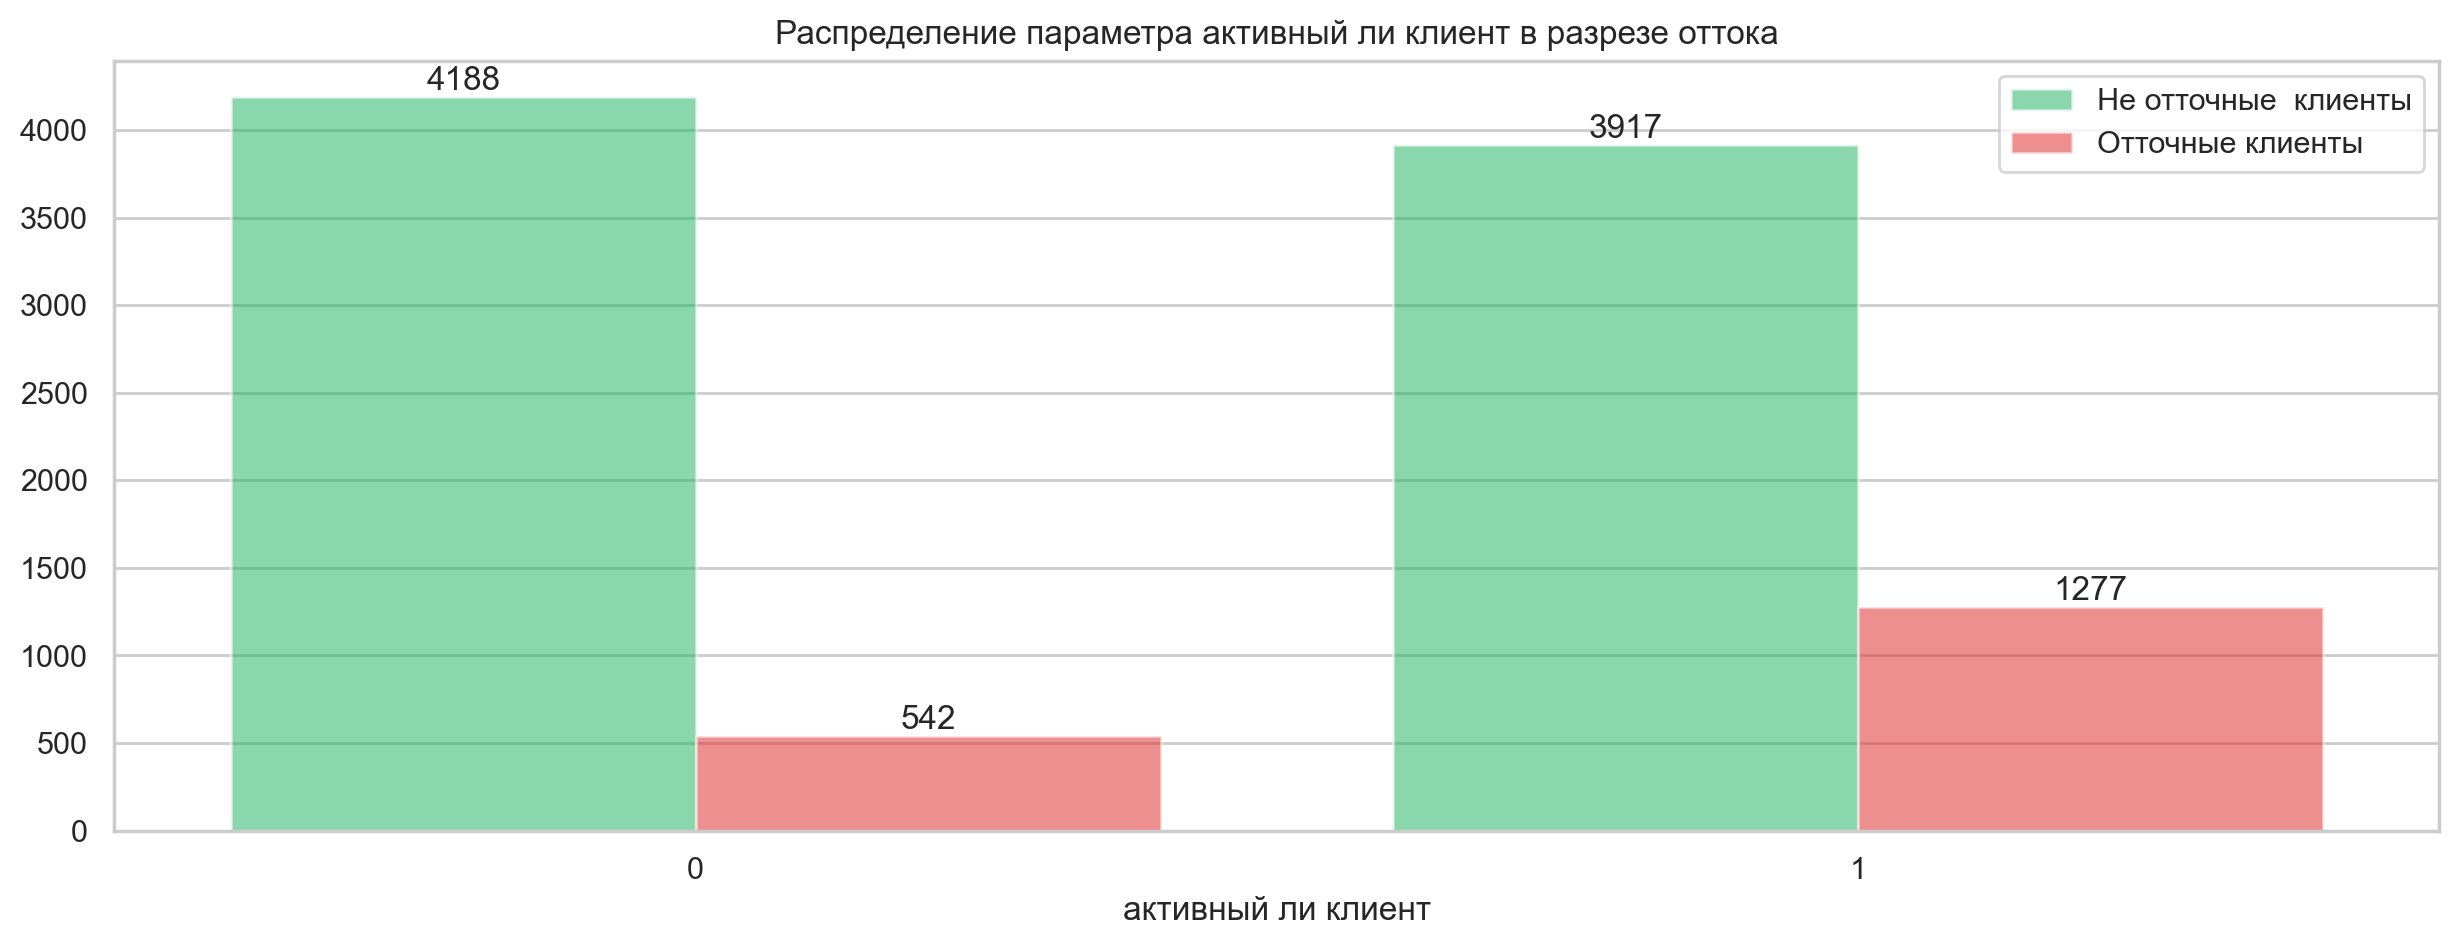

In [69]:
category_param_plot_churn('last_activity')

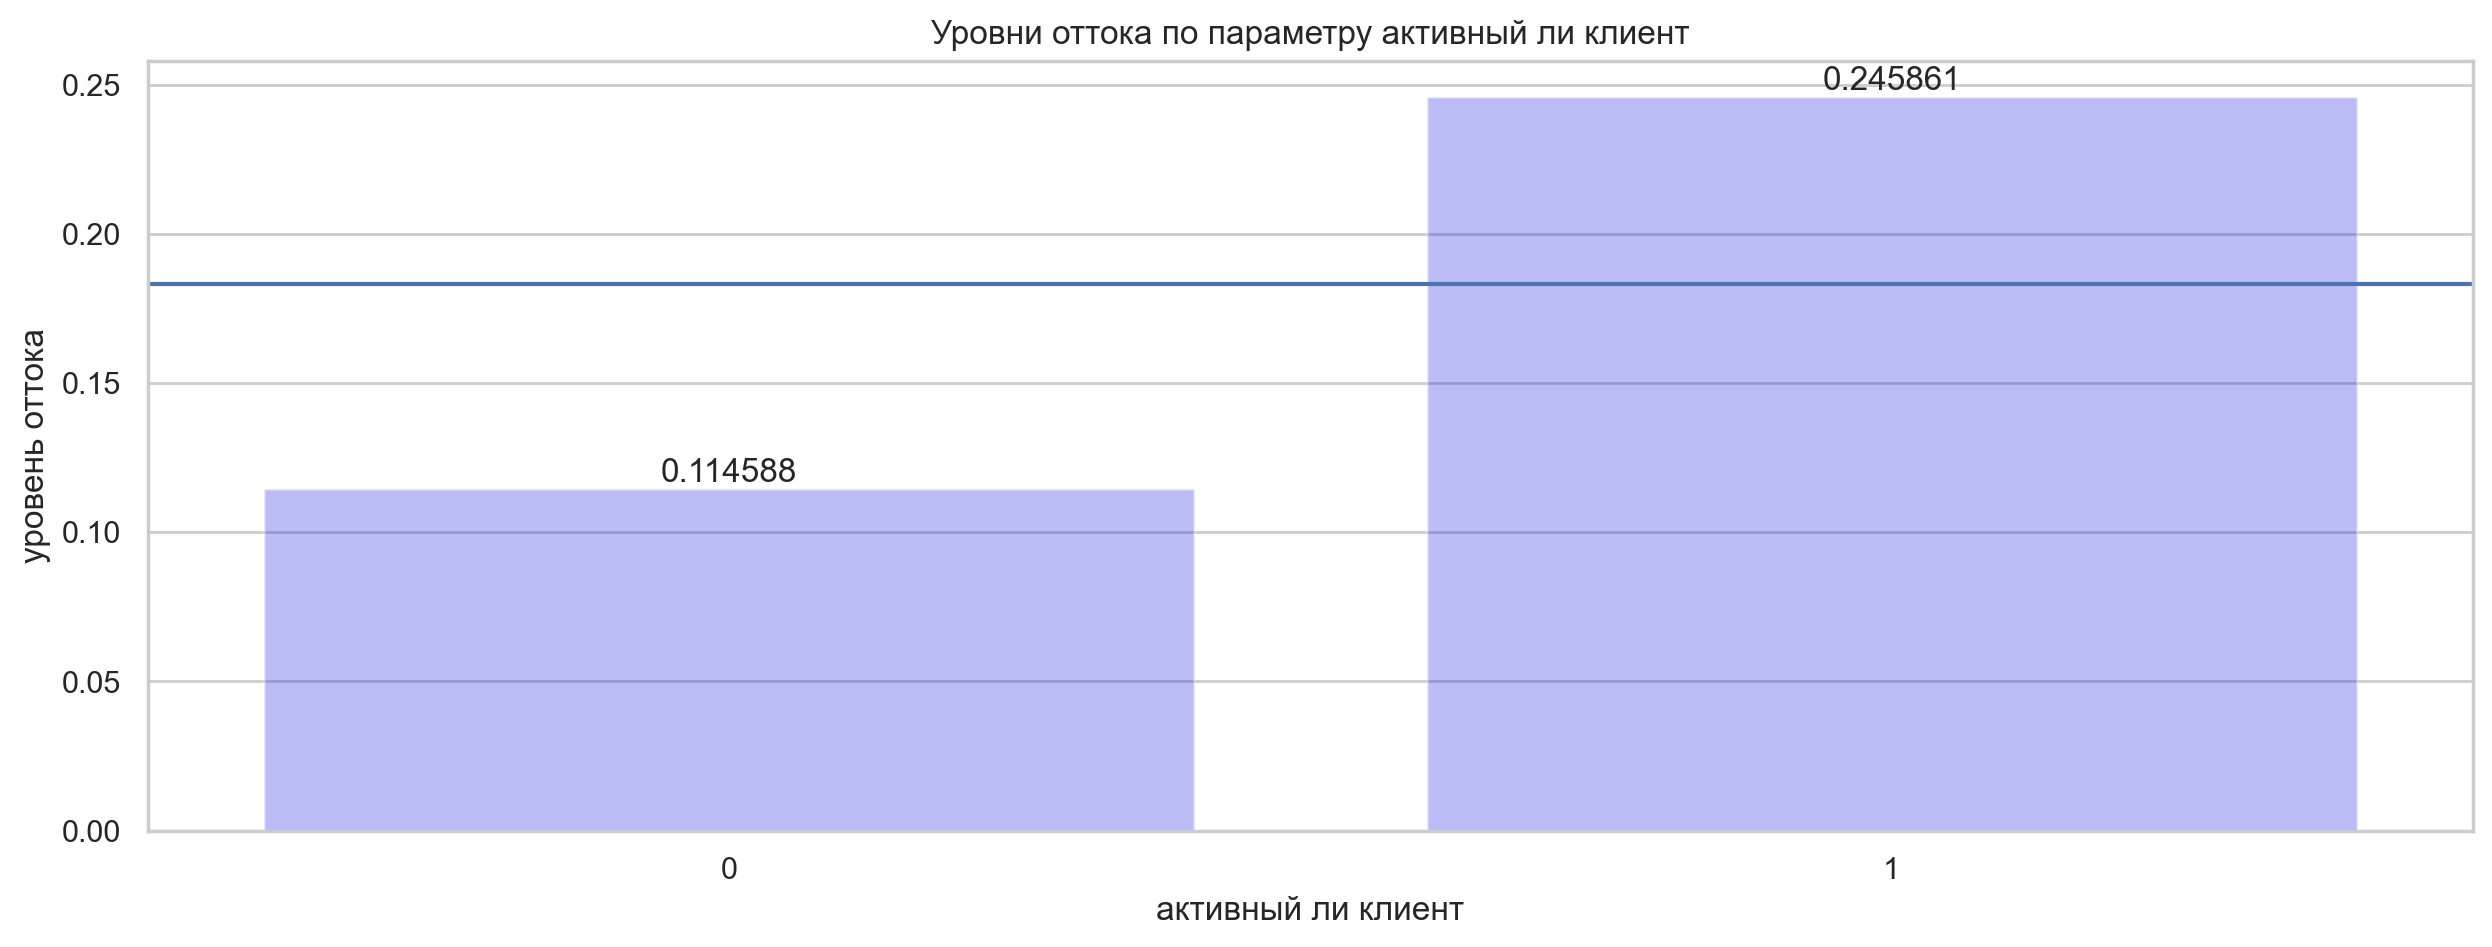

In [70]:
levels_plot('last_activity')

Количество активных и неактивных клиентов практически одинаково.

Уходят чаще активные клиенты в 24.5% случаев.

#### Оценочный доход клиента

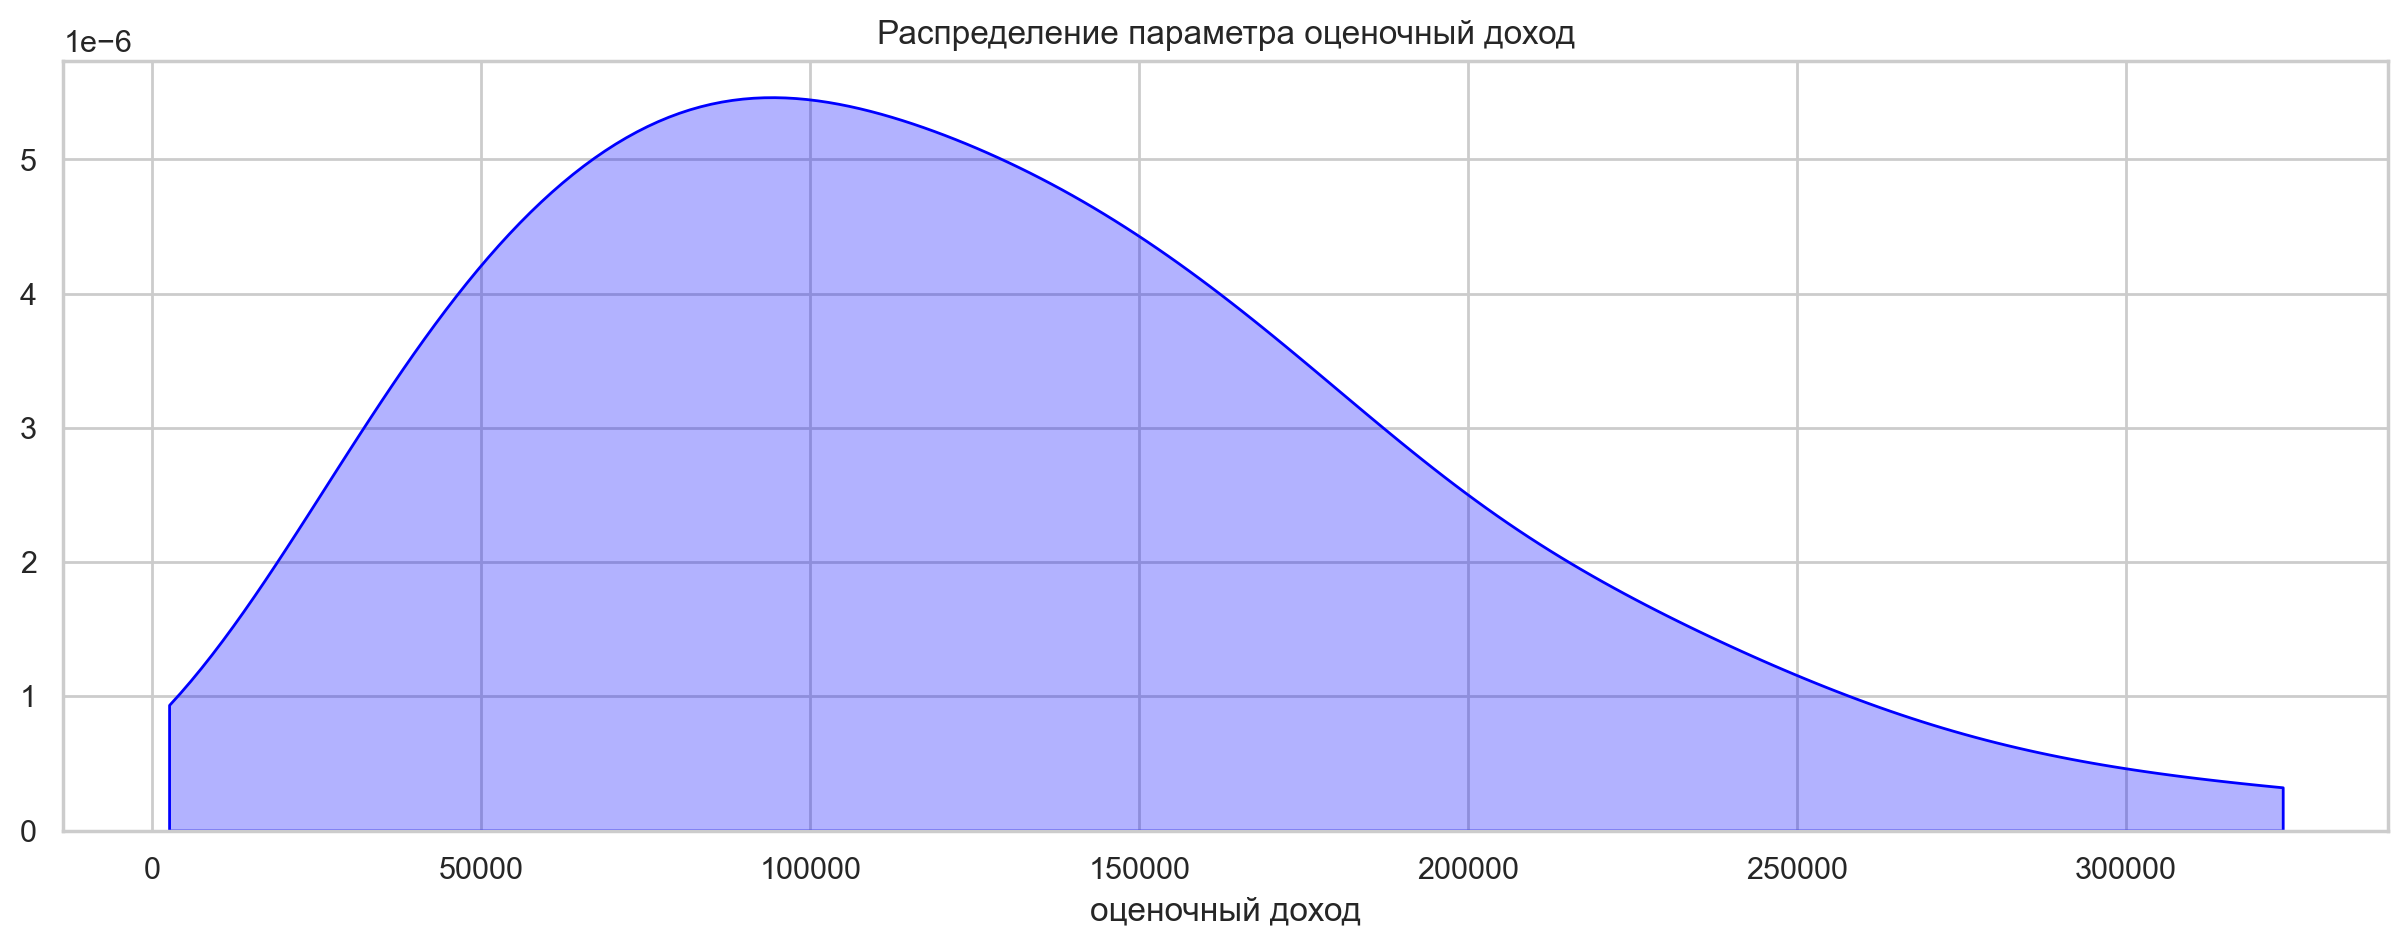

In [71]:
continuous_param_plot('est_salary')

In [72]:
df['est_salary'].describe()

count      9924.00
mean     147880.18
std      139358.30
min        2546.30
25%       75252.18
50%      119715.39
75%      174666.93
max     1395064.45
Name: est_salary, dtype: float64

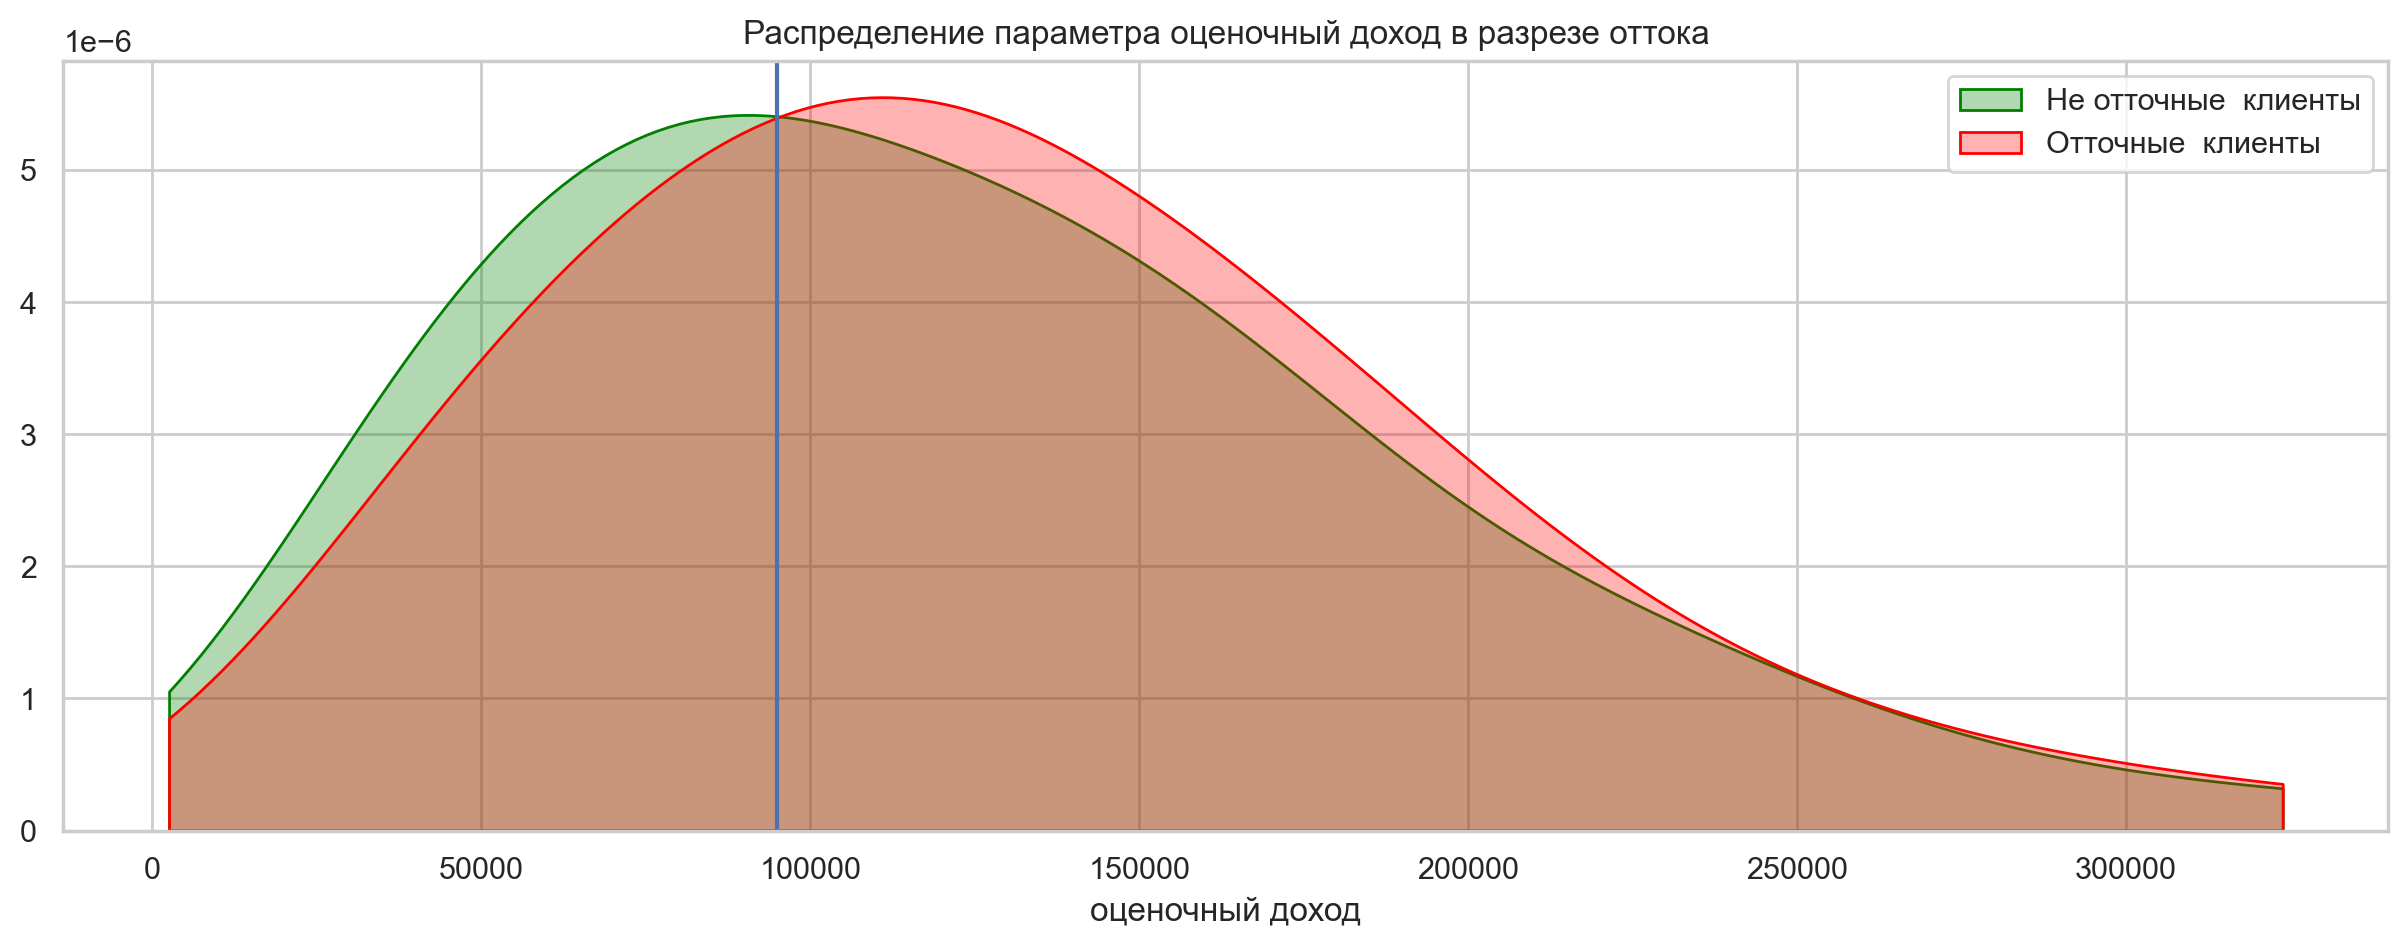

In [73]:
continuous_param_plot_churn('est_salary')
plt.axvline(95000);

Большая часть клиентов оценочно зарабатывает от 50 000 до 150 000. Распределение имеет длинный хвост в сторону больших значений. Среднее значение 150 000, а медианное 120 000.

Клиенты зарабатывающие от 95 000 до 250 000 чаще уходят.

### 3.2. Портреты клиентов
<a id="3_2"></a>

Составим портреты клиентов банка склонных уходить и склонных остаться.

**Клиент склонный уйти**<br>
Мужчина из Ярославля, возрастом 50-60 лет. Состоятельный, имеет оценочную зп более 95 000, на счету имеет не менее 950 000, баллы собственности оцениваются от 3 и более, пользуется несколькими продуктами банка (3 и более), имеет хороший кредитный скоринг от 820 до 940, не пользуется кредитной картой, является активным клиентом.

Параметры:
- `score` — баллы кредитного скоринга от 820 до 940,
- `city` — город Ярославль или Ростов Великий,
- `gender` — пол мужской,
- `age` — возраст 50-60 лет или 25-35 лет,
- `equity` — количество баллов собственности от 3 и более,
- `balance` — баланс на счёте не менее 950 000,
- `products` — количество продуктов, которыми пользуется клиент от 3 и более,
- `credit_card` — есть ли кредитная карта - нет,
- `last_activity` — активный клиент - да,
- `est_salary` — оценочный доход клиента более 95 000.

**Самый постоянный клиент**<br>
Женщина из Рыбинска, возрастом 60 лет и старше. Имеет оценочную зп менее 95 000, баллы собственности 0, пользуется 1 продуктом банка, неактивный клиент. Похоже на описание среднестатистического пенсионера.

**Вывод**

Напрашивается очевидный вывод по исследовательскому анализу: из банка идет отток в большей степени состоятельных клиентов, что очень плохо. Можно предположить, что клиентов переманивает конкурент, предлагая более выгодные условия. 

### 3.3. Корреляционный анализ
<a id="3_3"></a>

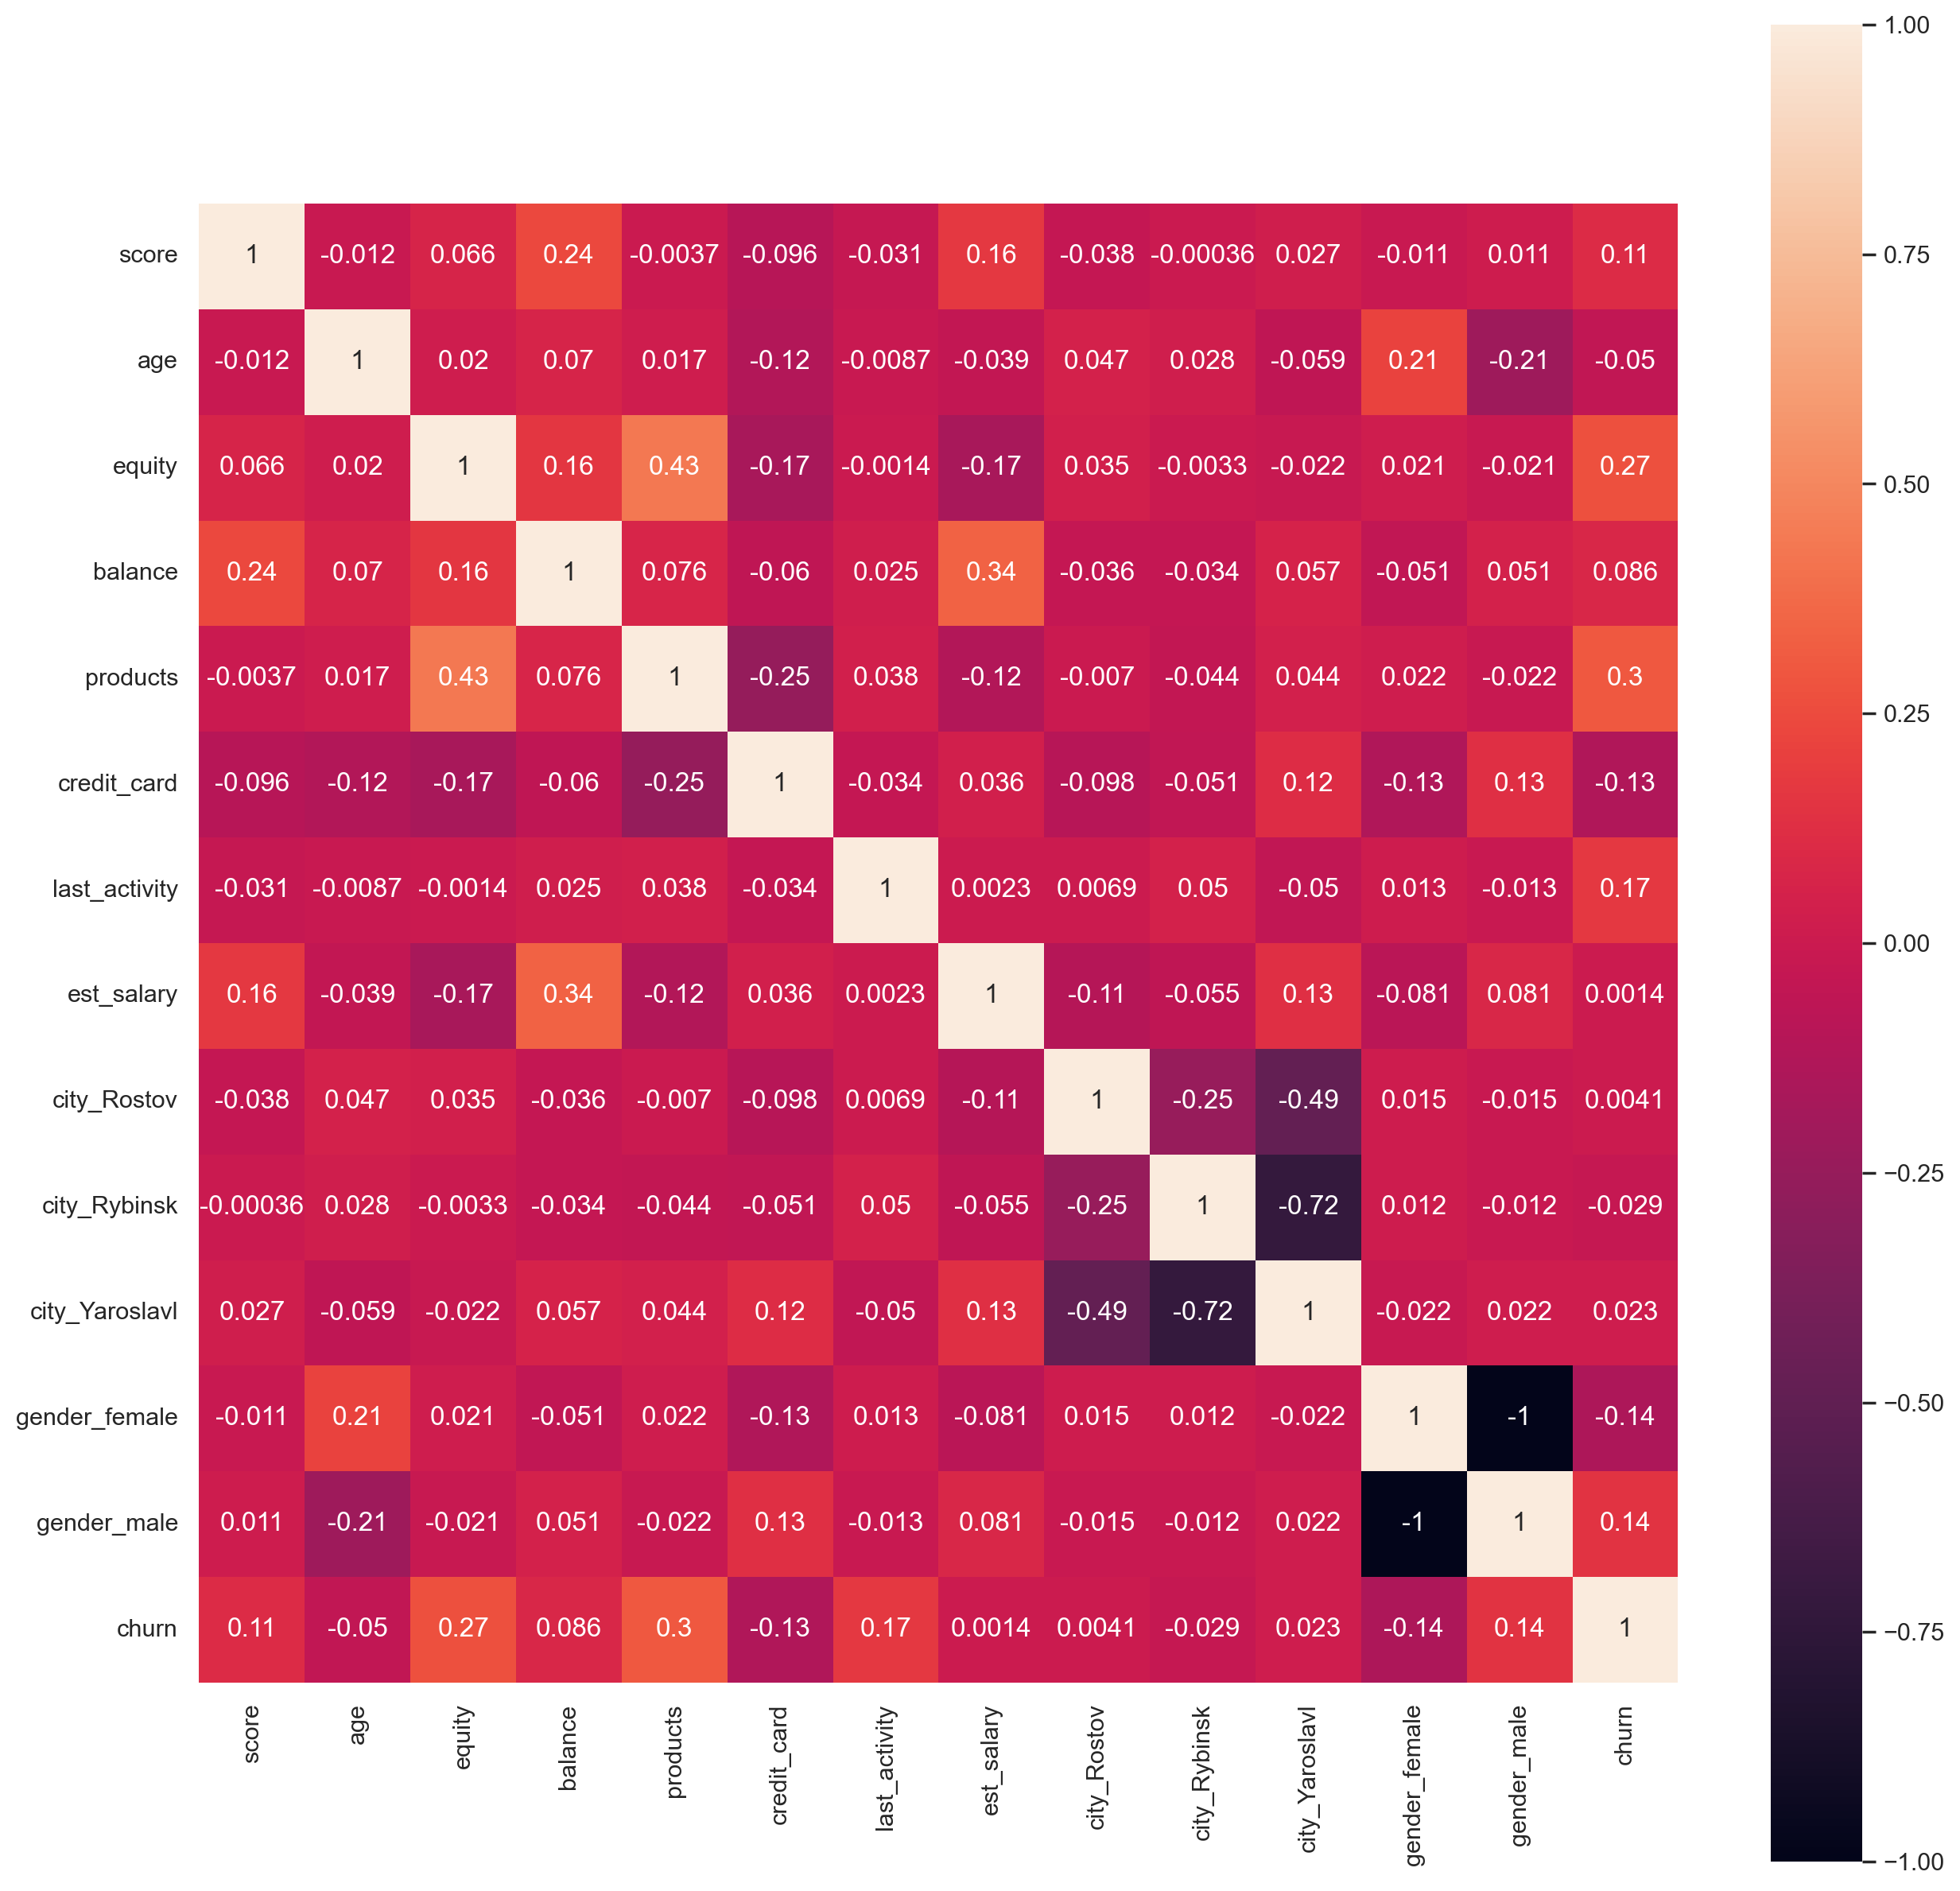

In [74]:
# Матрица корреляций
corr = df[['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 
           'est_salary', 'city_Rostov', 'city_Rybinsk', 'city_Yaroslavl', 'gender_female','gender_male', 'churn']
         ].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, square=True)
plt.show()

**Вывод:**

По матрице корреляций мы видим, что у признака оттока есть связь с количеством продуктов и количеством баллов собственности. Коэффициенты небольшие 0.3 и 0.27 и говорят об умеренной связи параметров с оттоком. Между самими параметрами количество продуктов и количество баллов собственности также есть связь, коэффициент корреляции равен 0.43.

Слабая связь оттока так же с параметрами кредитного скоринга, кредитной карты, последней активности и пола.

Связь есть между параметрами средтв на счете и оценочной заработной платы, коэффициент корреляции равен 0.34.

## 4. Статистический анализ данных
<a id="4"></a>

### 4.1. Гипотеза: различия дохода между теми клиентами, которые ушли и теми, которые остались
<a id="4_1"></a>

**Нулевая гипотеза**: значимых различий в уровне дохода клиентов между группами тех, кто ушел и кто остался, нет.<br>
**Альтернативная гитопеза:** в уровне дохода клиентов между группами есть статистически значимые различия.

уровень статистической значимости $\alpha =$ 0.05

Cначала подготовим данные:

In [75]:
# группа оставшихся клиентов
sampleA = df[df['churn'] == 0]['est_salary']
# группа отточных клиентов
sampleB = df[df['churn'] == 1]['est_salary'] 

Для проверки гипотезы проведем **t-test**. T-test имеет следующие **условия применимости**:
- Генеральные совокупности не зависят друг от друга.
- Выборочные средние нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей равны. 

Проверим выборки на нормальность распределения, будем использовать **тест Шапиро**.

**Нулевая гипотеза:** распределение нормально.<br>
**Альтернативная гитопеза:** распределение не нормально.

In [76]:
# критический уровень статистической значимости
alpha = 0.05 
# выборка
sample = [sampleA, sampleB]

for i in range(len(sample)):
    print(f'Выборка: {i+1}')
    # Тест Шапиро на нормальность распределения
    p_value = stats.shapiro(sample[i].values)[1]
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение НЕ является нормальным.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, распределение является нормальным.')

Выборка: 1
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение НЕ является нормальным.
Выборка: 2
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение НЕ является нормальным.


Так как распредление не нормально, статистическую значимость различий будем считать с помощью **теста Манна-Уитни**. 

In [77]:
# критический уровень статистической значимости
alpha = 0.05
# Тест Манна-Уитни
p_value = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]
print('p-value = {0:.5f}'.format(p_value))

if p_value < alpha:
    print("❌ Отвергаем нулевую гипотезу.")
else:
    print("⭕ Наблюдения не противоречат гипотезе.") 

print()
print('Уровень дохода в группе А (оставшие): {0:.5f}'.format(sampleA.mean()))
print('Уровень дохода в группе B (отток): {0:.5f}'.format(sampleB.mean()))
print('Отношение средних: {0:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.00023
❌ Отвергаем нулевую гипотезу.

Уровень дохода в группе А (оставшие): 147788.26835
Уровень дохода в группе B (отток): 148289.70222
Отношение средних: 0.34%


**Вывод:** В среднем уровне дохода групп оставшихся и отточных клиентов есть статистически значимые различия.

p-value = 0.00023 меньше выбранного уровня значимости $\alpha =$ 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем уровне дохода между группами нет, отвергаем. Относительный выигрыш группы отточных клиентов равен 0.34%.

### 4.2. Гипотеза: различия уровня оттока клиентов в разных городах
<a id="4_2"></a>

**Нулевая гипотеза**: уровень оттока клиентов в городе равен среднему уровню оттока по генеральной совокупности.<br>
**Альтернативная гитопеза:** между уровнем оттока в городе и общим уровнем оттока есть статистически значимые различия.

уровень статистической значимости $\alpha =$ 0.05

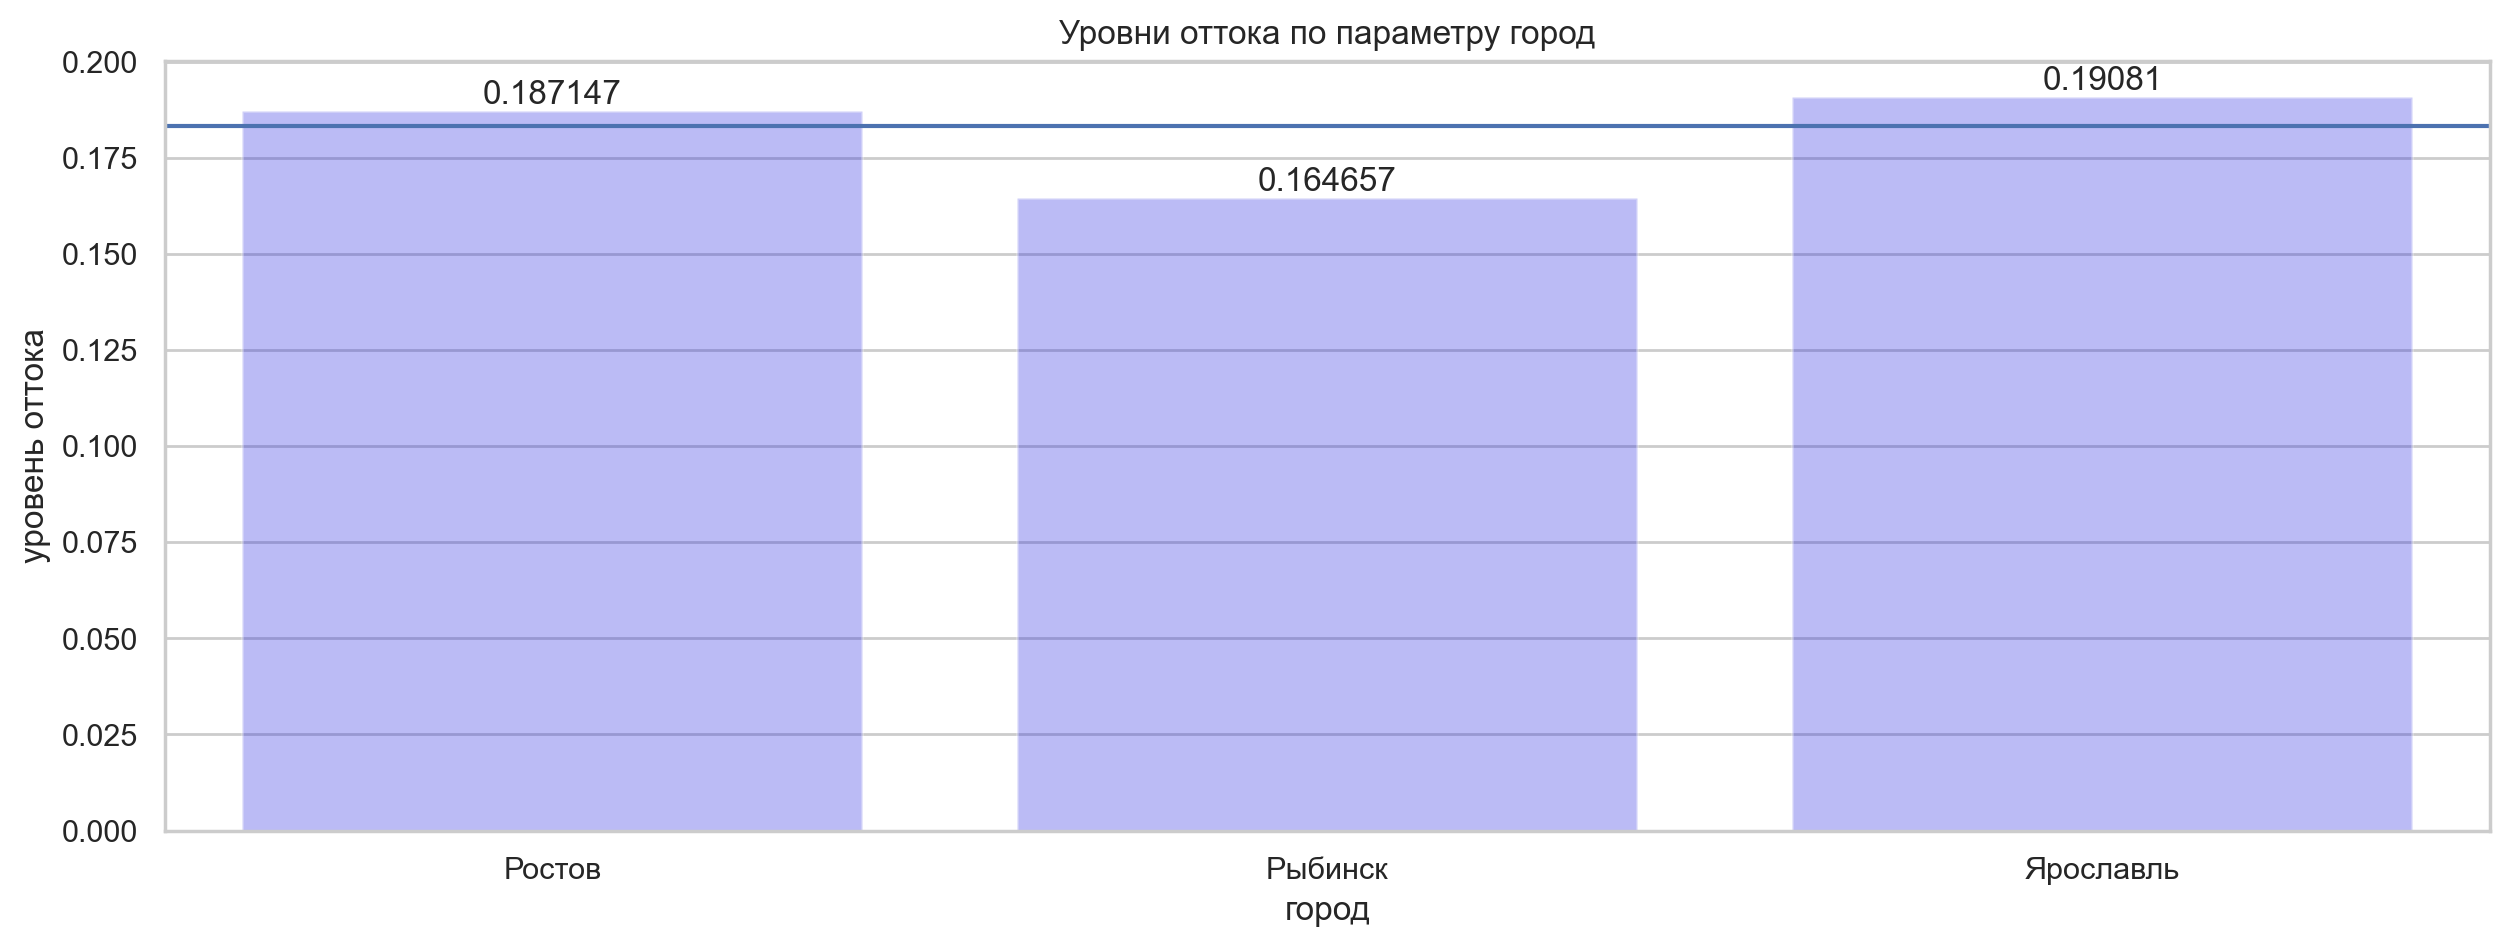

In [78]:
levels_plot('city')

Хотим выяснить значимы ли различия в уровне оттока по городам со средним оттоком по всей выборке.

Используем для проверки гипотезы **z-test**.

In [79]:
for city in df['city'].unique():
    # критический уровень статистической значимости
    alpha = 0.05

    # количество испытаний
    nobs = df[df['city']==city]['churn'].count()
    # количество успешных
    count = df[(df['city']==city) & (df['churn']==1)]['churn'].count()

    # z-test
    z_stat, p_value = proportions_ztest(count, nobs, churn_level)
    
    print()
    print('\033[1m' + city + '\033[0m')    
    print('p-значение: ', p_value)
    if p_value < alpha:
        print('❌ Отвергаем нулевую гипотезу, доли статистически значимо различны.')
    else:
        print('⭕ Наблюдения не противоречат гипотезе, доли равны.')   
    print('Уровень оттока в городе: {0:.5f}'.format(count/nobs))
    print('Общий уровень оттока: {0:.5f}'.format(churn_level))
    print('Отношение средних: {0:.2%}'.format((count/nobs) / churn_level - 1))


Рыбинск
p-значение:  0.009634466583319682
❌ Отвергаем нулевую гипотезу, доли статистически значимо различны.
Уровень оттока в городе: 0.16466
Общий уровень оттока: 0.18329
Отношение средних: -10.17%

Ярославль
p-значение:  0.14329938966528608
⭕ Наблюдения не противоречат гипотезе, доли равны.
Уровень оттока в городе: 0.19081
Общий уровень оттока: 0.18329
Отношение средних: 4.10%

Ростов
p-значение:  0.7100280795699757
⭕ Наблюдения не противоречат гипотезе, доли равны.
Уровень оттока в городе: 0.18715
Общий уровень оттока: 0.18329
Отношение средних: 2.10%


**Вывод:** 
- Уровень оттока в Ярославле и Ростове Великом не значимо отличается от среднего уровня оттока. 
- А вот в Рыбинске уровень оттока статистически значимо меньше среднего на 10.17%.

## 5. Сегментация
<a id="5"></a>

In [80]:
# общий уровень отточности банка
print('Средний уровень отточности банка: : {0:.3%}'.format(churn_level))

Средний уровень отточности банка: : 18.329%


In [81]:
# признаки отточности 
conditions = ['820 <= score <= 940', 
              'city == "Ярославль"',
              'gender_male == 1', 
              '50 <= age <= 60', 
              '25 <= age <= 35', 
              'equity >= 3', 
              'balance > 950000',
              'products >= 3', 
              'credit_card == 0',
              'last_activity == 1',
              '95000 <= est_salary <= 250000',
              '']

In [82]:
# функция собирает условия в запрос
def query_segment(conditions):
    query_ = ''
    for c in conditions:
        if c != '':
            if query_ == '':
                query_ += c
            else:
                query_ += ' and '
                query_ += c
    return query_

In [83]:
# Создадим список сегментов: условия сегмента, уровень оттока, размер
segments_result_list = []
# Перебираем все возможные комбинации условий
for segment in combinations(conditions, 3):
    query_ = query_segment(segment)
    segment = df.query(query_)
    segment_mean = segment['churn'].mean()
    segment_count = segment['churn'].count()
    # Если сегмент не слишком маленький и не слишком большой 
    # и если отточность сегмента больше средней по банку добавляем его в результирующий список 
    if 500 <= segment_count <= 2000 and segment_mean > churn_level:
        segments_result_list.append([query_, segment_mean, segment_count])

In [84]:
# Приотезируем сегменты: сортируем список сегментов по убыванию количества людей, которых может получиться вернуть
# сортируем по: отток * размер сегмента
segments_result_list.sort(reverse=True, key=lambda x: x[1] * x[2])

In [85]:
# Выведем наиболее приоритетные сегменты
for i, segment in enumerate(segments_result_list[:30], 1):
    print(f'\033[1mСегмент {i}:\033[0m', segment[0])
    print(f'Уровень оттока: {segment[1]:.2%}')
    print(f'Размер сегмента: {segment[2]}')
    print(f'(Приоритет. контроль: {segment[1] * segment[2]:.0f})')
    print()

Сегмент 1: 820 <= score <= 940 and equity >= 3 and last_activity == 1
Уровень оттока: 48.56%
Размер сегмента: 1872
(Приоритет. контроль: 909)

Сегмент 2: 820 <= score <= 940 and gender_male == 1 and equity >= 3
Уровень оттока: 43.74%
Размер сегмента: 1765
(Приоритет. контроль: 772)

Сегмент 3: equity >= 3 and balance > 950000
Уровень оттока: 38.59%
Размер сегмента: 1845
(Приоритет. контроль: 712)

Сегмент 4: city == "Ярославль" and equity >= 3 and last_activity == 1
Уровень оттока: 41.06%
Размер сегмента: 1617
(Приоритет. контроль: 664)

Сегмент 5: 820 <= score <= 940 and last_activity == 1 and 95000 <= est_salary <= 250000
Уровень оттока: 37.92%
Размер сегмента: 1743
(Приоритет. контроль: 661)

Сегмент 6: equity >= 3 and last_activity == 1 and 95000 <= est_salary <= 250000
Уровень оттока: 44.25%
Размер сегмента: 1487
(Приоритет. контроль: 658)

Сегмент 7: gender_male == 1 and equity >= 3 and last_activity == 1
Уровень оттока: 46.20%
Размер сегмента: 1407
(Приоритет. контроль: 650)

Се

In [86]:
# Выбираем сегменты так, чтобы они покрывали максимум проблемных зон банка
result = [2, 11, 23]

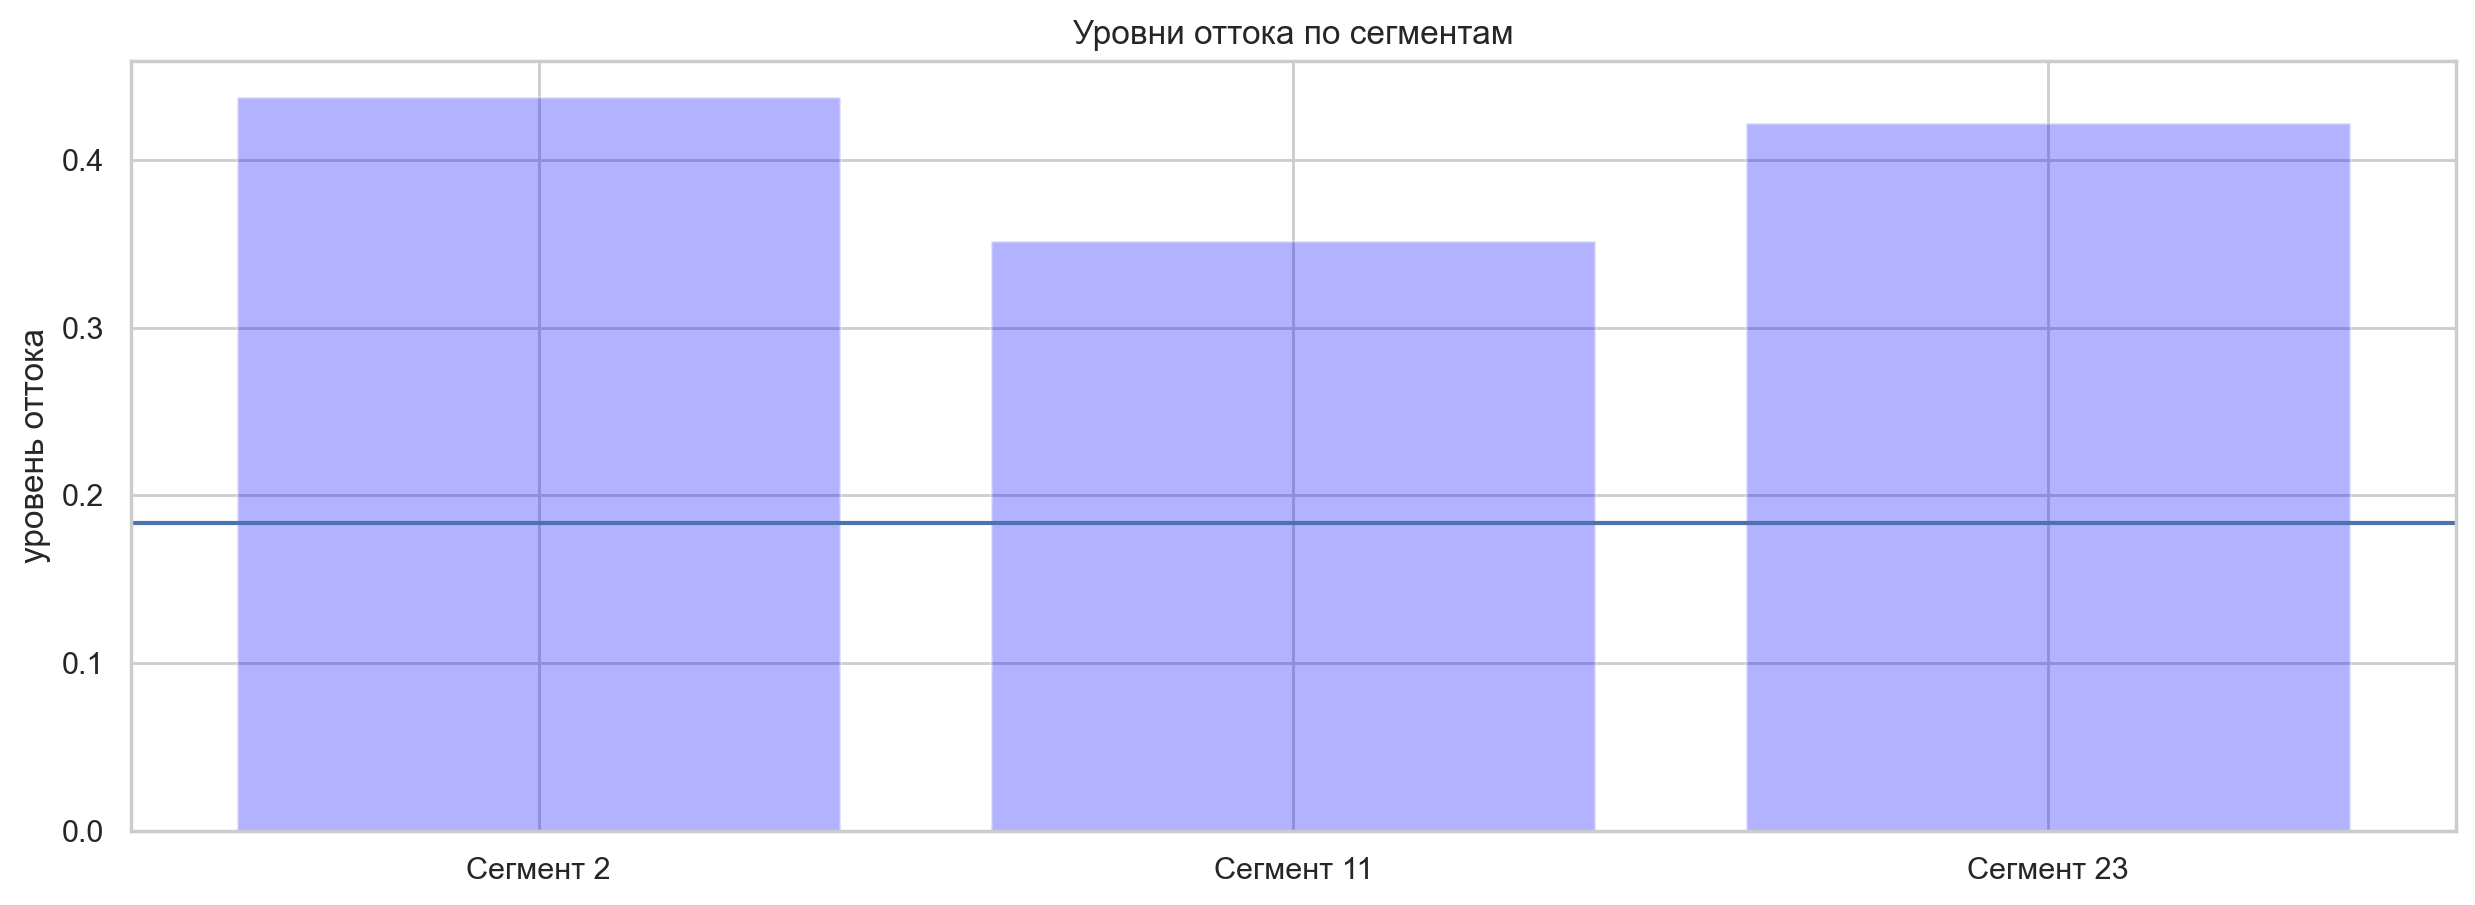

In [87]:
# Изобразим уровни оттока клиентов по этим сегментам в сравнении со средним
plt.figure(figsize=(15,5))
plt.title('Уровни оттока по сегментам')
means = [segments_result_list[i-1][1] for i in result]
segment_titles = ['Сегмент '+ str(i) for n, i in enumerate(result)]
ax = plt.bar(segment_titles, means, color='blue', alpha=.3)
plt.axhline(churn_level)
plt.ylabel('уровень оттока')
plt.show()

Каждый выбранных сегментов является высокооточным.

### Вывод
<a id="5_0"></a>

Таким образом, выделяем 3 наиболее высокоотточных сегмента, размером до 2 000 человек, покрывающих максимум проблемных зон банка. Маркетинговое действие на эти сегменты должно привести к уменьшению оттока.

**Сегмент 1:** баллы кредитного скоринга от 820 до 940, пол мужской, количество баллов собственности от 3 и более<br>
Уровень оттока: 43.74%<br>
Размер сегмента: 1765<br>
(Приоритет. контроль: 772)<br>

**Рекомендации сегмент 1:** предложить клиенту потребительский кредит, автокредит, ипотеку, страховые продукты собственности.

**Сегмент 2:** есть ли кредитная карта - нет, активный клиент - да<br>
Уровень оттока: 35.17%<br>
Размер сегмента: 1740<br>
(Приоритет. контроль: 612)<br>

**Рекомендации сегмент 2:** предложить клиенту кредитную карту и страхование кредитной карты.

**Сегмент 3:** баланс на счёте не менее 950 000, оценочный доход клиента от 95 000 до 250000.<br>
Уровень оттока: 42.18%<br>
Размер сегмента: 1259<br>
(Приоритет. контроль: 531)<br>

**Рекомендации сегмент 3:** предложить открыть депозит под более выгодные проценты, страхование средств, инвестиционные продукты банка, обезличенные металлически счета.

## 6. Заключение
<a id="6"></a>

### Цель исследования
Эффективно выделить сегменты отточных клиентов, чтобы они были однородными, высокооточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое действие на эти сегменты должно привести к уменьшению оттока.


### Результаты исследования

**Проведено исследование клиентов банка по признаку оттока, в ходе исследования выполнено:**

**1.** Была получена первичная информация по датасету. (см. [1. Подготовка данных -> Вывод](#1_0)).

**2.** Проведена предобработка данных. (см. [2. Предобработка данных -> Вывод](#2_0)).

**3.** Проведен исследовательский анализ данных. 

Выделены **признаки оттока**:<br>
- `score` — баллы кредитного скоринга от 820 до 940,
- `city` — город Ярославль или Ростов Великий,
- `gender` — пол мужской,
- `age` — возраст 50-60 лет или 25-35 лет,
- `equity` — количество баллов собственности от 3 и более,
- `balance` — баланс на счёте не менее 950 000,
- `products` — количество продуктов, которыми пользуется клиент от 3 и более,
- `credit_card` — есть ли кредитная карта - нет,
- `last_activity` — активный клиент - да,
- `est_salary` — оценочный доход клиента более 95 000.

Составлены портреты клиентов:

**Клиент склонный уйти**<br>
Мужчина из Ярославля, возрастом 50-60 лет. Состоятельный, имеет оценочную зп более 95 000, на счету имеет не менее 950 000, баллы собственности оцениваются от 3 и более, пользуется несколькими продуктами банка (3 и более), имеет хороший кредитный скоринг от 820 до 940, не пользуется кредитной картой, является активным клиентом.

**Самый постоянный клиент**<br>
Женщина из Рыбинска, возрастом 60 лет и старше. Имеет оценочную зп менее 95 000, баллы собственности 0, пользуется 1 продуктом банка, неактивный клиент. Похоже на описание среднестатистического пенсионера.

Напрашивается очевидный вывод: из банка идет отток в большей степени состоятельных клиентов, что очень плохо. Можно предположить, что клиентов переманивает конкурент, предлагая более выгодные условия.

Определили наличие **связи параметров с оттоком**:<br>
По матрице корреляций мы выяснили, что у признака оттока есть связь с количеством продуктов и количеством баллов собственности. Коэффициенты небольшие 0.3 и 0.27 и говорят об умеренной связи параметров с оттоком. Слабая связь оттока есть с параметрами кредитного скоринга, кредитной карты, последней активности и пола.

**4.** **Основываясь на предыдущих выводах определили сегменты отточных клиентов.** Все сегменты приоретизировали по признаку того, сколько людей из оттока будет задействовано. На основании этого выделили **3 наиболее высокоотточных сегмента**, размером до 2 000 человек, покрывающих максимум проблемных зон банка. Маркетинговое действие на эти сегменты должно привести к уменьшению оттока.

**Сегмент 1:** баллы кредитного скоринга от 820 до 940, пол мужской, количество баллов собственности от 3 и более<br>
Уровень оттока: 43.74%<br>
Размер сегмента: 1765<br>
(Приоритет. контроль: 772)<br>

**Рекомендации сегмент 1:** предложить клиенту потребительский кредит, автокредит, ипотеку, страховые продукты собственности.

**Сегмент 2:** есть ли кредитная карта - нет, активный клиент - да<br>
Уровень оттока: 35.17%<br>
Размер сегмента: 1740<br>
(Приоритет. контроль: 612)<br>

**Рекомендации сегмент 2:** предложить клиенту кредитную карту и страхование кредитной карты.

**Сегмент 3:** баланс на счёте не менее 950 000, оценочный доход клиента от 95 000 до 250000.<br>
Уровень оттока: 42.18%<br>
Размер сегмента: 1259<br>
(Приоритет. контроль: 531)<br>

**Рекомендации сегмент 3:** предложить открыть депозит под более выгодные проценты, страхование средств, инвестиционные продукты банка, обезличенные металлически счета.

### Презентация

Ссылка: https://disk.yandex.ru/i/l7-nPslSMvNLLQ